In [1]:
import csv

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
# Specify data paths
dataset = '/home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint.csv'
model_save_path = '/home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = '/home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
# Change training classes if necessary
NUM_CLASSES = 8

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([647, 724, 704, 527, 777, 614, 647, 767]))


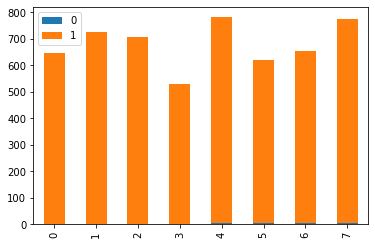

In [7]:
# Classes count
counts = np.unique(y_dataset, return_counts=True)
df = pd.DataFrame(counts)
df.T.plot(kind="bar", stacked=True)
print(counts)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 1

In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=10000,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/10000
 1/64 [..............................] - ETA: 0s - loss: 2.1650 - accuracy: 0.1250
Epoch 00001: val_loss improved from inf to 1.79825, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 2ms/step - loss: 1.9822 - accuracy: 0.3509 - val_loss: 1.7982 - val_accuracy: 0.5340
Epoch 2/10000
 1/64 [..............................] - ETA: 0s - loss: 1.7915 - accuracy: 0.4688
Epoch 00002: val_loss improved from 1.79825 to 1.07855, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.4748 - accuracy: 0.6219 - val_loss: 1.0786 - val_accuracy: 0.7064
Epoch 3/10000
 1/64 [..............................] - ETA: 0s - loss: 1.0021 - accuracy: 0.7812
Epoch 00003: val_loss improved from 1.07855 to 0.56623, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifi

 1/64 [..............................] - ETA: 0s - loss: 0.0114 - accuracy: 1.0000
Epoch 00022: val_loss improved from 0.01006 to 0.00964, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0106 - accuracy: 0.9993 - val_loss: 0.0096 - val_accuracy: 0.9993
Epoch 23/10000
 1/64 [..............................] - ETA: 0s - loss: 0.0100 - accuracy: 1.0000
Epoch 00023: val_loss improved from 0.00964 to 0.00756, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0114 - accuracy: 0.9990 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 24/10000
 1/64 [..............................] - ETA: 0s - loss: 0.0067 - accuracy: 1.0000
Epoch 00024: val_loss improved from 0.00756 to 0.00737, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypo

Epoch 45/10000
 1/64 [..............................] - ETA: 0s - loss: 8.4671e-04 - accuracy: 1.0000
Epoch 00045: val_loss improved from 0.00114 to 0.00099, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 986us/step - loss: 9.2501e-04 - accuracy: 1.0000 - val_loss: 9.8963e-04 - val_accuracy: 1.0000
Epoch 46/10000
 1/64 [..............................] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 00046: val_loss did not improve from 0.00099
64/64 [==============================] - 0s 844us/step - loss: 8.0522e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 47/10000
 1/64 [..............................] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 00047: val_loss improved from 0.00099 to 0.00092, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - 

 1/64 [..............................] - ETA: 0s - loss: 1.4906e-04 - accuracy: 1.0000
Epoch 00068: val_loss improved from 0.00040 to 0.00036, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 980us/step - loss: 2.3671e-04 - accuracy: 1.0000 - val_loss: 3.6388e-04 - val_accuracy: 1.0000
Epoch 69/10000
 1/64 [..............................] - ETA: 0s - loss: 2.7722e-04 - accuracy: 1.0000
Epoch 00069: val_loss did not improve from 0.00036
64/64 [==============================] - 0s 828us/step - loss: 2.2694e-04 - accuracy: 1.0000 - val_loss: 5.4305e-04 - val_accuracy: 1.0000
Epoch 70/10000
 1/64 [..............................] - ETA: 0s - loss: 1.8712e-04 - accuracy: 1.0000
Epoch 00070: val_loss did not improve from 0.00036
64/64 [==============================] - 0s 842us/step - loss: 2.1357e-04 - accuracy: 1.0000 - val_loss: 3.6438e-04 - val_accuracy: 1.0000
Epoch 71/10000
 1/64 [.......

Epoch 92/10000
 1/64 [..............................] - ETA: 0s - loss: 1.0183e-04 - accuracy: 1.0000
Epoch 00092: val_loss did not improve from 0.00019
64/64 [==============================] - 0s 868us/step - loss: 7.7840e-05 - accuracy: 1.0000 - val_loss: 2.5399e-04 - val_accuracy: 1.0000
Epoch 93/10000
 1/64 [..............................] - ETA: 0s - loss: 6.1460e-05 - accuracy: 1.0000
Epoch 00093: val_loss improved from 0.00019 to 0.00018, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 960us/step - loss: 7.4509e-05 - accuracy: 1.0000 - val_loss: 1.7610e-04 - val_accuracy: 1.0000
Epoch 94/10000
 1/64 [..............................] - ETA: 0s - loss: 3.5505e-05 - accuracy: 1.0000
Epoch 00094: val_loss did not improve from 0.00018
64/64 [==============================] - 0s 818us/step - loss: 7.2033e-05 - accuracy: 1.0000 - val_loss: 1.9684e-04 - val_accuracy: 1.0000
Epoch 95/10000

 1/64 [..............................] - ETA: 0s - loss: 2.0287e-05 - accuracy: 1.0000
Epoch 00116: val_loss improved from 0.00008 to 0.00008, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 973us/step - loss: 3.6970e-05 - accuracy: 1.0000 - val_loss: 7.5202e-05 - val_accuracy: 1.0000
Epoch 117/10000
 1/64 [..............................] - ETA: 0s - loss: 1.9277e-05 - accuracy: 1.0000
Epoch 00117: val_loss did not improve from 0.00008
64/64 [==============================] - 0s 816us/step - loss: 3.5171e-05 - accuracy: 1.0000 - val_loss: 7.7619e-05 - val_accuracy: 1.0000
Epoch 118/10000
 1/64 [..............................] - ETA: 0s - loss: 3.7870e-05 - accuracy: 1.0000
Epoch 00118: val_loss did not improve from 0.00008
64/64 [==============================] - 0s 825us/step - loss: 3.3751e-05 - accuracy: 1.0000 - val_loss: 7.5995e-05 - val_accuracy: 1.0000
Epoch 119/10000
 1/64 [....

Epoch 140/10000
 1/64 [..............................] - ETA: 0s - loss: 1.3730e-05 - accuracy: 1.0000
Epoch 00140: val_loss did not improve from 0.00006
64/64 [==============================] - 0s 826us/step - loss: 2.0216e-05 - accuracy: 1.0000 - val_loss: 6.4576e-05 - val_accuracy: 1.0000
Epoch 141/10000
 1/64 [..............................] - ETA: 0s - loss: 1.6620e-05 - accuracy: 1.0000
Epoch 00141: val_loss did not improve from 0.00006
64/64 [==============================] - 0s 843us/step - loss: 1.9777e-05 - accuracy: 1.0000 - val_loss: 6.6845e-05 - val_accuracy: 1.0000
Epoch 142/10000
 1/64 [..............................] - ETA: 0s - loss: 1.1112e-05 - accuracy: 1.0000
Epoch 00142: val_loss did not improve from 0.00006
64/64 [==============================] - 0s 820us/step - loss: 1.9530e-05 - accuracy: 1.0000 - val_loss: 6.5703e-05 - val_accuracy: 1.0000
Epoch 143/10000
 1/64 [..............................] - ETA: 0s - loss: 1.7405e-05 - accuracy: 1.0000
Epoch 00143: val_l

Epoch 166/10000
 1/64 [..............................] - ETA: 0s - loss: 6.8153e-06 - accuracy: 1.0000
Epoch 00166: val_loss did not improve from 0.00005
64/64 [==============================] - 0s 865us/step - loss: 1.2419e-05 - accuracy: 1.0000 - val_loss: 5.3778e-05 - val_accuracy: 1.0000
Epoch 167/10000
 1/64 [..............................] - ETA: 0s - loss: 2.4919e-05 - accuracy: 1.0000
Epoch 00167: val_loss did not improve from 0.00005
64/64 [==============================] - 0s 911us/step - loss: 1.2236e-05 - accuracy: 1.0000 - val_loss: 5.4581e-05 - val_accuracy: 1.0000
Epoch 168/10000
 1/64 [..............................] - ETA: 0s - loss: 6.0404e-06 - accuracy: 1.0000
Epoch 00168: val_loss did not improve from 0.00005
64/64 [==============================] - 0s 825us/step - loss: 1.2137e-05 - accuracy: 1.0000 - val_loss: 5.8543e-05 - val_accuracy: 1.0000
Epoch 169/10000
 1/64 [..............................] - ETA: 0s - loss: 6.6700e-06 - accuracy: 1.0000
Epoch 00169: val_l

 1/64 [..............................] - ETA: 0s - loss: 2.9038e-06 - accuracy: 1.0000
Epoch 00192: val_loss did not improve from 0.00004
64/64 [==============================] - 0s 859us/step - loss: 7.7849e-06 - accuracy: 1.0000 - val_loss: 4.2889e-05 - val_accuracy: 1.0000
Epoch 193/10000
 1/64 [..............................] - ETA: 0s - loss: 1.0568e-05 - accuracy: 1.0000
Epoch 00193: val_loss did not improve from 0.00004
64/64 [==============================] - 0s 878us/step - loss: 7.4231e-06 - accuracy: 1.0000 - val_loss: 4.2525e-05 - val_accuracy: 1.0000
Epoch 194/10000
 1/64 [..............................] - ETA: 0s - loss: 6.0292e-06 - accuracy: 1.0000
Epoch 00194: val_loss did not improve from 0.00004
64/64 [==============================] - 0s 846us/step - loss: 7.2797e-06 - accuracy: 1.0000 - val_loss: 3.8362e-05 - val_accuracy: 1.0000
Epoch 195/10000
 1/64 [..............................] - ETA: 0s - loss: 4.1704e-06 - accuracy: 1.0000
Epoch 00195: val_loss did not impr

Epoch 219/10000
 1/64 [..............................] - ETA: 0s - loss: 1.6037e-06 - accuracy: 1.0000
Epoch 00219: val_loss did not improve from 0.00003
64/64 [==============================] - 0s 840us/step - loss: 4.0341e-06 - accuracy: 1.0000 - val_loss: 3.6854e-05 - val_accuracy: 1.0000
Epoch 220/10000
 1/64 [..............................] - ETA: 0s - loss: 2.0284e-06 - accuracy: 1.0000
Epoch 00220: val_loss improved from 0.00003 to 0.00002, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 3.8766e-06 - accuracy: 1.0000 - val_loss: 2.1252e-05 - val_accuracy: 1.0000
Epoch 221/10000
 1/64 [..............................] - ETA: 0s - loss: 1.8552e-06 - accuracy: 1.0000
Epoch 00221: val_loss did not improve from 0.00002
64/64 [==============================] - 0s 866us/step - loss: 4.0667e-06 - accuracy: 1.0000 - val_loss: 6.3598e-05 - val_accuracy: 1.0000
Epoch 222/100

Epoch 246/10000
 1/64 [..............................] - ETA: 0s - loss: 1.2330e-06 - accuracy: 1.0000
Epoch 00246: val_loss did not improve from 0.00002
64/64 [==============================] - 0s 843us/step - loss: 1.8043e-06 - accuracy: 1.0000 - val_loss: 2.1811e-05 - val_accuracy: 1.0000
Epoch 247/10000
 1/64 [..............................] - ETA: 0s - loss: 8.1211e-07 - accuracy: 1.0000
Epoch 00247: val_loss did not improve from 0.00002
64/64 [==============================] - 0s 834us/step - loss: 1.7007e-06 - accuracy: 1.0000 - val_loss: 1.8502e-05 - val_accuracy: 1.0000
Epoch 248/10000
 1/64 [..............................] - ETA: 0s - loss: 7.1898e-07 - accuracy: 1.0000
Epoch 00248: val_loss did not improve from 0.00002
64/64 [==============================] - 0s 830us/step - loss: 1.9718e-06 - accuracy: 1.0000 - val_loss: 2.2599e-05 - val_accuracy: 1.0000
Epoch 249/10000
 1/64 [..............................] - ETA: 0s - loss: 4.2315e-06 - accuracy: 1.0000
Epoch 00249: val_l

Epoch 272/10000
 1/64 [..............................] - ETA: 0s - loss: 5.5507e-07 - accuracy: 1.0000
Epoch 00272: val_loss did not improve from 0.00001
64/64 [==============================] - 0s 2ms/step - loss: 1.0616e-06 - accuracy: 1.0000 - val_loss: 1.7373e-05 - val_accuracy: 1.0000
Epoch 273/10000
 1/64 [..............................] - ETA: 0s - loss: 6.7055e-07 - accuracy: 1.0000
Epoch 00273: val_loss did not improve from 0.00001
64/64 [==============================] - 0s 914us/step - loss: 0.0238 - accuracy: 0.9951 - val_loss: 0.0544 - val_accuracy: 0.9822
Epoch 274/10000
 1/64 [..............................] - ETA: 0s - loss: 0.0199 - accuracy: 0.9844
Epoch 00274: val_loss did not improve from 0.00001
64/64 [==============================] - 0s 846us/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 7.5002e-04 - val_accuracy: 1.0000
Epoch 275/10000
 1/64 [..............................] - ETA: 0s - loss: 2.2527e-05 - accuracy: 1.0000
Epoch 00275: val_loss did not improv

 1/64 [..............................] - ETA: 0s - loss: 5.2340e-07 - accuracy: 1.0000
Epoch 00300: val_loss did not improve from 0.00001
64/64 [==============================] - 0s 871us/step - loss: 1.6797e-06 - accuracy: 1.0000 - val_loss: 1.3187e-04 - val_accuracy: 1.0000
Epoch 301/10000
 1/64 [..............................] - ETA: 0s - loss: 8.1211e-07 - accuracy: 1.0000
Epoch 00301: val_loss did not improve from 0.00001
64/64 [==============================] - 0s 855us/step - loss: 1.6443e-06 - accuracy: 1.0000 - val_loss: 1.2848e-04 - val_accuracy: 1.0000
Epoch 302/10000
 1/64 [..............................] - ETA: 0s - loss: 5.6066e-07 - accuracy: 1.0000
Epoch 00302: val_loss did not improve from 0.00001
64/64 [==============================] - 0s 832us/step - loss: 1.6129e-06 - accuracy: 1.0000 - val_loss: 1.2556e-04 - val_accuracy: 1.0000
Epoch 303/10000
 1/64 [..............................] - ETA: 0s - loss: 5.6811e-07 - accuracy: 1.0000
Epoch 00303: val_loss did not impr

In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Model evaluation
# TODO Test on loaded model
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)

22/22 [==============================] - 0s 465us/step - loss: 1.1467e-05 - accuracy: 1.0000


In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[3.17316278e-07 3.32801093e-08 1.27841870e-08 0.00000000e+00
 6.14417717e-09 4.92512444e-13 9.99999642e-01 1.37773655e-11]
6


# Confusion matrix

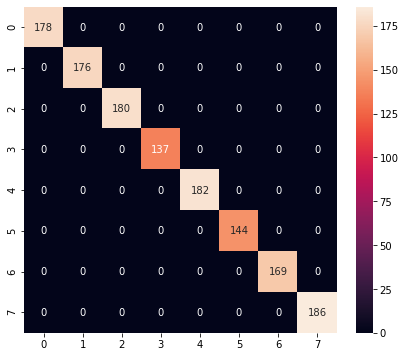

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       176
           2       1.00      1.00      1.00       180
           3       1.00      1.00      1.00       137
           4       1.00      1.00      1.00       182
           5       1.00      1.00      1.00       144
           6       1.00      1.00      1.00       169
           7       1.00      1.00      1.00       186

    accuracy                           1.00      1352
   macro avg       1.00      1.00      1.00      1352
weighted avg       1.00      1.00      1.00      1352



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

14060

## Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 25 µs, sys: 6 µs, total: 31 µs
Wall time: 34.3 µs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.17318381e-07 3.32799210e-08 1.27841382e-08 0.00000000e+00
 6.14416562e-09 4.92514341e-13 9.99999642e-01 1.37774445e-11]
6


## Download model

In [24]:
!zip -r model.zip keypoint_classifier  

  adding: keypoint_classifier/ (stored 0%)
  adding: keypoint_classifier/keypoint_classifier.hdf5 (deflated 60%)
  adding: keypoint_classifier/keypoint_classifier_label.csv (deflated 6%)
  adding: keypoint_classifier/keypoint.csv (deflated 81%)
  adding: keypoint_classifier/__pycache__/ (stored 0%)
  adding: keypoint_classifier/__pycache__/keypoint_classifier.cpython-37.pyc (deflated 44%)
  adding: keypoint_classifier/keypoint_classifier.tflite (deflated 12%)
  adding: keypoint_classifier/keypoint_classifier.py (deflated 62%)




---


# ❗️Hyperparameters Tuning

In [25]:
%load_ext tensorboard
from tensorboard.plugins.hparams import api as hp

In [26]:
# Init parameters to tune
HP_NUM_UNITS_1 = hp.HParam('num_units_1', hp.Discrete([16, 32, 64]))
HP_NUM_UNITS_2 = hp.HParam('num_units_2', hp.Discrete([8, 16, 32]))
HP_NUM_UNITS_3 = hp.HParam('num_units_3', hp.Discrete([8, 16, 32]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.0, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

In [27]:
with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS_1,HP_NUM_UNITS_2,HP_NUM_UNITS_3, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [28]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=15, verbose=1)

In [29]:
def train_test_model(hparams):

  model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS_1], activation='relu'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS_2], activation='relu'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS_3], activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
  
  model.compile(
    optimizer=hparams[HP_OPTIMIZER],
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
  
  cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)

  model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[
               cp_callback,
               es_callback,
               ]
  ) 

  # Load model with best accuracy
  model = tf.keras.models.load_model(model_save_path)

  _, accuracy = model.evaluate(X_test, y_test)
  return accuracy

def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [30]:
session_num = 0

for num_units_1 in HP_NUM_UNITS_1.domain.values:
  for num_units_2 in HP_NUM_UNITS_2.domain.values:
    for num_units_3 in HP_NUM_UNITS_3.domain.values:
      for dropout_rate in np.arange(HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value, 0.1):
        for optimizer in HP_OPTIMIZER.domain.values:
          hparams = {
              HP_NUM_UNITS_1: num_units_1,
              HP_NUM_UNITS_2: num_units_2,
              HP_NUM_UNITS_3: num_units_3,
              HP_DROPOUT: dropout_rate,
              HP_OPTIMIZER: optimizer,
          }
          run_name = "run-%d" % session_num
          print('--- Starting trial: %s' % run_name)
          print({h.name: hparams[h] for h in hparams})
          run('logs/hparam_tuning/' + run_name, hparams)
          session_num += 1

--- Starting trial: run-0
{'num_units_1': 16, 'num_units_2': 8, 'num_units_3': 8, 'dropout': 0.0, 'optimizer': 'adam'}
Epoch 1/50
 1/64 [..............................] - ETA: 0s - loss: 2.1084 - accuracy: 0.0469
Epoch 00001: val_loss improved from inf to 2.01834, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 2ms/step - loss: 2.0587 - accuracy: 0.1265 - val_loss: 2.0183 - val_accuracy: 0.1731
Epoch 2/50
 1/64 [..............................] - ETA: 0s - loss: 2.0407 - accuracy: 0.1562
Epoch 00002: val_loss improved from 2.01834 to 1.90109, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 977us/step - loss: 1.9753 - accuracy: 0.2261 - val_loss: 1.9011 - val_accuracy: 0.3151
Epoch 3/50
 1/64 [..............................] - ETA: 0s - loss: 1.9365 - accuracy: 0.2500
Epoch 00003: val_loss

Epoch 22/50
 1/64 [..............................] - ETA: 0s - loss: 0.0593 - accuracy: 0.9844
Epoch 00022: val_loss improved from 0.08727 to 0.07935, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 993us/step - loss: 0.0841 - accuracy: 0.9859 - val_loss: 0.0794 - val_accuracy: 0.9852
Epoch 23/50
 1/64 [..............................] - ETA: 0s - loss: 0.1002 - accuracy: 0.9844
Epoch 00023: val_loss improved from 0.07935 to 0.07367, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9864 - val_loss: 0.0737 - val_accuracy: 0.9852
Epoch 24/50
 1/64 [..............................] - ETA: 0s - loss: 0.0544 - accuracy: 1.0000
Epoch 00024: val_loss improved from 0.07367 to 0.06678, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifi

Epoch 44/50
 1/64 [..............................] - ETA: 0s - loss: 0.0200 - accuracy: 1.0000
Epoch 00044: val_loss improved from 0.01874 to 0.01623, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 964us/step - loss: 0.0202 - accuracy: 0.9965 - val_loss: 0.0162 - val_accuracy: 0.9978
Epoch 45/50
 1/64 [..............................] - ETA: 0s - loss: 0.0054 - accuracy: 1.0000
Epoch 00045: val_loss improved from 0.01623 to 0.01612, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 952us/step - loss: 0.0158 - accuracy: 0.9978 - val_loss: 0.0161 - val_accuracy: 0.9978
Epoch 46/50
 1/64 [..............................] - ETA: 0s - loss: 0.0094 - accuracy: 1.0000
Epoch 00046: val_loss improved from 0.01612 to 0.01443, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

Epoch 16/50
 1/64 [..............................] - ETA: 0s - loss: 1.6179 - accuracy: 0.2656
Epoch 00016: val_loss improved from 1.56067 to 1.51797, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 868us/step - loss: 1.5399 - accuracy: 0.3946 - val_loss: 1.5180 - val_accuracy: 0.4172
Epoch 17/50
 1/64 [..............................] - ETA: 0s - loss: 1.4756 - accuracy: 0.4531
Epoch 00017: val_loss improved from 1.51797 to 1.47616, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 919us/step - loss: 1.4978 - accuracy: 0.4358 - val_loss: 1.4762 - val_accuracy: 0.4371
Epoch 18/50
 1/64 [..............................] - ETA: 0s - loss: 1.5162 - accuracy: 0.4531
Epoch 00018: val_loss improved from 1.47616 to 1.43865, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 0.6774 - accuracy: 0.7500
Epoch 00037: val_loss improved from 0.61944 to 0.57827, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 914us/step - loss: 0.5935 - accuracy: 0.8683 - val_loss: 0.5783 - val_accuracy: 0.8432
Epoch 38/50
 1/64 [..............................] - ETA: 0s - loss: 0.6130 - accuracy: 0.7969
Epoch 00038: val_loss improved from 0.57827 to 0.52794, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 879us/step - loss: 0.5491 - accuracy: 0.8737 - val_loss: 0.5279 - val_accuracy: 0.8957
Epoch 39/50
 1/64 [..............................] - ETA: 0s - loss: 0.5175 - accuracy: 0.8906
Epoch 00039: val_loss improved from 0.52794 to 0.49788, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 8/50
 1/64 [..............................] - ETA: 0s - loss: 1.2915 - accuracy: 0.5938
Epoch 00008: val_loss improved from 0.82900 to 0.71717, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.1849 - accuracy: 0.5549 - val_loss: 0.7172 - val_accuracy: 0.8107
Epoch 9/50
 1/64 [..............................] - ETA: 0s - loss: 1.2261 - accuracy: 0.6250
Epoch 00009: val_loss improved from 0.71717 to 0.64598, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 929us/step - loss: 1.1121 - accuracy: 0.5768 - val_loss: 0.6460 - val_accuracy: 0.8358
Epoch 10/50
 1/64 [..............................] - ETA: 0s - loss: 1.1958 - accuracy: 0.5625
Epoch 00010: val_loss did not improve from 0.64598
64/64 [==============================] - 0s 828us/step - loss: 1.1142 - accuracy: 0.

 1/64 [..............................] - ETA: 0s - loss: 0.7431 - accuracy: 0.6719
Epoch 00030: val_loss improved from 0.31303 to 0.31267, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 953us/step - loss: 0.7173 - accuracy: 0.7236 - val_loss: 0.3127 - val_accuracy: 0.8935
Epoch 31/50
 1/64 [..............................] - ETA: 0s - loss: 0.5358 - accuracy: 0.8281
Epoch 00031: val_loss did not improve from 0.31267
64/64 [==============================] - 0s 810us/step - loss: 0.7045 - accuracy: 0.7189 - val_loss: 0.3139 - val_accuracy: 0.8942
Epoch 32/50
 1/64 [..............................] - ETA: 0s - loss: 0.7024 - accuracy: 0.7500
Epoch 00032: val_loss improved from 0.31267 to 0.29422, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.7300 - val

Epoch 4/50
 1/64 [..............................] - ETA: 0s - loss: 2.0571 - accuracy: 0.2656
Epoch 00004: val_loss improved from 2.06754 to 2.05859, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 892us/step - loss: 2.0648 - accuracy: 0.1850 - val_loss: 2.0586 - val_accuracy: 0.2419
Epoch 5/50
 1/64 [..............................] - ETA: 0s - loss: 2.0453 - accuracy: 0.2656
Epoch 00005: val_loss improved from 2.05859 to 2.05095, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 870us/step - loss: 2.0574 - accuracy: 0.1998 - val_loss: 2.0510 - val_accuracy: 0.2552
Epoch 6/50
 1/64 [..............................] - ETA: 0s - loss: 2.0464 - accuracy: 0.2188
Epoch 00006: val_loss improved from 2.05095 to 2.04316, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifie

 1/64 [..............................] - ETA: 0s - loss: 1.8847 - accuracy: 0.3125
Epoch 00025: val_loss improved from 1.82265 to 1.80929, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 868us/step - loss: 1.8852 - accuracy: 0.3263 - val_loss: 1.8093 - val_accuracy: 0.4667
Epoch 26/50
 1/64 [..............................] - ETA: 0s - loss: 1.8735 - accuracy: 0.3438
Epoch 00026: val_loss improved from 1.80929 to 1.78017, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 860us/step - loss: 1.8642 - accuracy: 0.3364 - val_loss: 1.7802 - val_accuracy: 0.4578
Epoch 27/50
 1/64 [..............................] - ETA: 0s - loss: 1.7809 - accuracy: 0.4375
Epoch 00027: val_loss improved from 1.78017 to 1.76538, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 1.5113 - accuracy: 0.3438
Epoch 00046: val_loss improved from 1.39321 to 1.36332, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 887us/step - loss: 1.5483 - accuracy: 0.4116 - val_loss: 1.3633 - val_accuracy: 0.5510
Epoch 47/50
 1/64 [..............................] - ETA: 0s - loss: 1.4545 - accuracy: 0.3438
Epoch 00047: val_loss improved from 1.36332 to 1.35358, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 878us/step - loss: 1.5428 - accuracy: 0.4099 - val_loss: 1.3536 - val_accuracy: 0.5740
Epoch 48/50
 1/64 [..............................] - ETA: 0s - loss: 1.5091 - accuracy: 0.4844
Epoch 00048: val_loss improved from 1.35358 to 1.33079, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 17/50
 1/64 [..............................] - ETA: 0s - loss: 0.0916 - accuracy: 1.0000
Epoch 00017: val_loss improved from 0.07751 to 0.06548, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 936us/step - loss: 0.0675 - accuracy: 0.9926 - val_loss: 0.0655 - val_accuracy: 0.9904
Epoch 18/50
 1/64 [..............................] - ETA: 0s - loss: 0.0497 - accuracy: 0.9844
Epoch 00018: val_loss improved from 0.06548 to 0.05621, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 951us/step - loss: 0.0585 - accuracy: 0.9921 - val_loss: 0.0562 - val_accuracy: 0.9948
Epoch 19/50
 1/64 [..............................] - ETA: 0s - loss: 0.0734 - accuracy: 0.9688
Epoch 00019: val_loss improved from 0.05621 to 0.05115, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

Epoch 40/50
 1/64 [..............................] - ETA: 0s - loss: 0.0046 - accuracy: 1.0000
Epoch 00040: val_loss improved from 0.00910 to 0.00892, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 984us/step - loss: 0.0066 - accuracy: 0.9995 - val_loss: 0.0089 - val_accuracy: 0.9993
Epoch 41/50
 1/64 [..............................] - ETA: 0s - loss: 0.0175 - accuracy: 0.9844
Epoch 00041: val_loss improved from 0.00892 to 0.00880, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 960us/step - loss: 0.0055 - accuracy: 0.9993 - val_loss: 0.0088 - val_accuracy: 0.9993
Epoch 42/50
 1/64 [..............................] - ETA: 0s - loss: 0.0218 - accuracy: 1.0000
Epoch 00042: val_loss improved from 0.00880 to 0.00789, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 1.9008 - accuracy: 0.4375
Epoch 00012: val_loss improved from 1.88854 to 1.83449, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 916us/step - loss: 1.8627 - accuracy: 0.4614 - val_loss: 1.8345 - val_accuracy: 0.4504
Epoch 13/50
 1/64 [..............................] - ETA: 0s - loss: 1.8376 - accuracy: 0.5000
Epoch 00013: val_loss improved from 1.83449 to 1.76660, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 885us/step - loss: 1.8034 - accuracy: 0.4715 - val_loss: 1.7666 - val_accuracy: 0.4734
Epoch 14/50
 1/64 [..............................] - ETA: 0s - loss: 1.7771 - accuracy: 0.5625
Epoch 00014: val_loss improved from 1.76660 to 1.68582, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 0.4477 - accuracy: 0.7656
Epoch 00033: val_loss improved from 0.39017 to 0.37779, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 840us/step - loss: 0.3781 - accuracy: 0.8370 - val_loss: 0.3778 - val_accuracy: 0.8306
Epoch 34/50
 1/64 [..............................] - ETA: 0s - loss: 0.3991 - accuracy: 0.8281
Epoch 00034: val_loss improved from 0.37779 to 0.35687, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 858us/step - loss: 0.3655 - accuracy: 0.8454 - val_loss: 0.3569 - val_accuracy: 0.8321
Epoch 35/50
 1/64 [..............................] - ETA: 0s - loss: 0.2870 - accuracy: 0.8750
Epoch 00035: val_loss improved from 0.35687 to 0.34389, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 4/50
 1/64 [..............................] - ETA: 0s - loss: 1.8205 - accuracy: 0.2500
Epoch 00004: val_loss improved from 1.69331 to 1.46211, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.7074 - accuracy: 0.3226 - val_loss: 1.4621 - val_accuracy: 0.4933
Epoch 5/50
 1/64 [..............................] - ETA: 0s - loss: 1.6070 - accuracy: 0.3125
Epoch 00005: val_loss improved from 1.46211 to 1.29554, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.5614 - accuracy: 0.4062 - val_loss: 1.2955 - val_accuracy: 0.6102
Epoch 6/50
 1/64 [..............................] - ETA: 0s - loss: 1.4819 - accuracy: 0.5000
Epoch 00006: val_loss improved from 1.29554 to 1.10135, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/ke

Epoch 27/50
 1/64 [..............................] - ETA: 0s - loss: 0.8497 - accuracy: 0.7031
Epoch 00027: val_loss improved from 0.28703 to 0.28034, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 994us/step - loss: 0.6581 - accuracy: 0.7435 - val_loss: 0.2803 - val_accuracy: 0.9512
Epoch 28/50
 1/64 [..............................] - ETA: 0s - loss: 0.7355 - accuracy: 0.6562
Epoch 00028: val_loss did not improve from 0.28034
64/64 [==============================] - 0s 847us/step - loss: 0.6657 - accuracy: 0.7337 - val_loss: 0.2988 - val_accuracy: 0.9268
Epoch 29/50
 1/64 [..............................] - ETA: 0s - loss: 0.6053 - accuracy: 0.7969
Epoch 00029: val_loss improved from 0.28034 to 0.26760, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.6675 - accuracy: 

 1/64 [..............................] - ETA: 0s - loss: 2.1142 - accuracy: 0.0625
Epoch 00001: val_loss improved from inf to 2.07074, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 2ms/step - loss: 2.0808 - accuracy: 0.1418 - val_loss: 2.0707 - val_accuracy: 0.1760
Epoch 2/50
 1/64 [..............................] - ETA: 0s - loss: 2.1277 - accuracy: 0.0938
Epoch 00002: val_loss improved from 2.07074 to 2.06326, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 885us/step - loss: 2.0727 - accuracy: 0.1571 - val_loss: 2.0633 - val_accuracy: 0.2138
Epoch 3/50
 1/64 [..............................] - ETA: 0s - loss: 2.0733 - accuracy: 0.1250
Epoch 00003: val_loss improved from 2.06326 to 2.05585, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 1.8264 - accuracy: 0.3281
Epoch 00022: val_loss improved from 1.68704 to 1.64396, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 874us/step - loss: 1.7713 - accuracy: 0.3672 - val_loss: 1.6440 - val_accuracy: 0.6746
Epoch 23/50
 1/64 [..............................] - ETA: 0s - loss: 1.7172 - accuracy: 0.4062
Epoch 00023: val_loss improved from 1.64396 to 1.60342, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 873us/step - loss: 1.7428 - accuracy: 0.3763 - val_loss: 1.6034 - val_accuracy: 0.6664
Epoch 24/50
 1/64 [..............................] - ETA: 0s - loss: 1.6569 - accuracy: 0.4531
Epoch 00024: val_loss improved from 1.60342 to 1.55406, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 1.2513 - accuracy: 0.5156
Epoch 00043: val_loss improved from 0.93985 to 0.91998, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 869us/step - loss: 1.2665 - accuracy: 0.5248 - val_loss: 0.9200 - val_accuracy: 0.7559
Epoch 44/50
 1/64 [..............................] - ETA: 0s - loss: 1.1862 - accuracy: 0.5625
Epoch 00044: val_loss improved from 0.91998 to 0.90091, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 865us/step - loss: 1.2509 - accuracy: 0.5356 - val_loss: 0.9009 - val_accuracy: 0.7678
Epoch 45/50
 1/64 [..............................] - ETA: 0s - loss: 1.2723 - accuracy: 0.5156
Epoch 00045: val_loss improved from 0.90091 to 0.87970, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 14/50
 1/64 [..............................] - ETA: 0s - loss: 0.1614 - accuracy: 0.9219
Epoch 00014: val_loss improved from 0.12575 to 0.11044, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 964us/step - loss: 0.1149 - accuracy: 0.9674 - val_loss: 0.1104 - val_accuracy: 0.9667
Epoch 15/50
 1/64 [..............................] - ETA: 0s - loss: 0.0660 - accuracy: 0.9844
Epoch 00015: val_loss improved from 0.11044 to 0.10118, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 949us/step - loss: 0.1034 - accuracy: 0.9719 - val_loss: 0.1012 - val_accuracy: 0.9726
Epoch 16/50
 1/64 [..............................] - ETA: 0s - loss: 0.0760 - accuracy: 0.9844
Epoch 00016: val_loss improved from 0.10118 to 0.09090, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

64/64 [==============================] - 0s 989us/step - loss: 0.0223 - accuracy: 0.9958 - val_loss: 0.0204 - val_accuracy: 0.9963
Epoch 36/50
 1/64 [..............................] - ETA: 0s - loss: 0.0045 - accuracy: 1.0000
Epoch 00036: val_loss improved from 0.02036 to 0.02021, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 989us/step - loss: 0.0206 - accuracy: 0.9965 - val_loss: 0.0202 - val_accuracy: 0.9963
Epoch 37/50
 1/64 [..............................] - ETA: 0s - loss: 0.0094 - accuracy: 1.0000
Epoch 00037: val_loss improved from 0.02021 to 0.01762, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9965 - val_loss: 0.0176 - val_accuracy: 0.9963
Epoch 38/50
 1/64 [..............................] - ETA: 0s - loss: 0.0483 - accuracy: 0.9844
Ep

Epoch 9/50
 1/64 [..............................] - ETA: 0s - loss: 1.9927 - accuracy: 0.2969
Epoch 00009: val_loss improved from 2.02325 to 2.01392, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 879us/step - loss: 2.0166 - accuracy: 0.2249 - val_loss: 2.0139 - val_accuracy: 0.2374
Epoch 10/50
 1/64 [..............................] - ETA: 0s - loss: 1.9905 - accuracy: 0.3125
Epoch 00010: val_loss improved from 2.01392 to 2.00338, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 875us/step - loss: 2.0069 - accuracy: 0.2454 - val_loss: 2.0034 - val_accuracy: 0.2729
Epoch 11/50
 1/64 [..............................] - ETA: 0s - loss: 2.0301 - accuracy: 0.1875
Epoch 00011: val_loss improved from 2.00338 to 1.99017, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classif

 1/64 [..............................] - ETA: 0s - loss: 1.3302 - accuracy: 0.4688
Epoch 00030: val_loss improved from 1.31059 to 1.24887, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 868us/step - loss: 1.2905 - accuracy: 0.5729 - val_loss: 1.2489 - val_accuracy: 0.6228
Epoch 31/50
 1/64 [..............................] - ETA: 0s - loss: 1.1768 - accuracy: 0.6562
Epoch 00031: val_loss improved from 1.24887 to 1.19426, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 865us/step - loss: 1.2307 - accuracy: 0.5993 - val_loss: 1.1943 - val_accuracy: 0.6428
Epoch 32/50
 1/64 [..............................] - ETA: 0s - loss: 1.1445 - accuracy: 0.7031
Epoch 00032: val_loss improved from 1.19426 to 1.14402, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

43/43 [==============================] - 0s 413us/step - loss: 0.3841 - accuracy: 0.8735
--- Starting trial: run-10
{'num_units_1': 16, 'num_units_2': 8, 'num_units_3': 32, 'dropout': 0.1, 'optimizer': 'adam'}
Epoch 1/50
 1/64 [..............................] - ETA: 0s - loss: 2.1243 - accuracy: 0.1250
Epoch 00001: val_loss improved from inf to 2.00861, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 2ms/step - loss: 2.0629 - accuracy: 0.1593 - val_loss: 2.0086 - val_accuracy: 0.1346
Epoch 2/50
 1/64 [..............................] - ETA: 0s - loss: 2.0376 - accuracy: 0.1719
Epoch 00002: val_loss improved from 2.00861 to 1.80070, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 978us/step - loss: 1.9654 - accuracy: 0.2192 - val_loss: 1.8007 - val_accuracy: 0.3506
Epoch 3/50
 1/64 [......

Epoch 23/50
 1/64 [..............................] - ETA: 0s - loss: 1.0284 - accuracy: 0.5625
Epoch 00023: val_loss improved from 0.44294 to 0.43266, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.8402 - accuracy: 0.6538 - val_loss: 0.4327 - val_accuracy: 0.8439
Epoch 24/50
 1/64 [..............................] - ETA: 0s - loss: 0.7556 - accuracy: 0.6875
Epoch 00024: val_loss improved from 0.43266 to 0.41990, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.8489 - accuracy: 0.6587 - val_loss: 0.4199 - val_accuracy: 0.8439
Epoch 25/50
 1/64 [..............................] - ETA: 0s - loss: 0.7255 - accuracy: 0.7031
Epoch 00025: val_loss improved from 0.41990 to 0.41507, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier

 1/64 [..............................] - ETA: 0s - loss: 0.6163 - accuracy: 0.8125
Epoch 00047: val_loss improved from 0.26388 to 0.26313, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1000us/step - loss: 0.6041 - accuracy: 0.7615 - val_loss: 0.2631 - val_accuracy: 0.9445
Epoch 48/50
 1/64 [..............................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7969
Epoch 00048: val_loss improved from 0.26313 to 0.24945, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 971us/step - loss: 0.6081 - accuracy: 0.7662 - val_loss: 0.2495 - val_accuracy: 0.9482
Epoch 49/50
 1/64 [..............................] - ETA: 0s - loss: 0.6318 - accuracy: 0.7500
Epoch 00049: val_loss improved from 0.24945 to 0.24762, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoi

Epoch 18/50
 1/64 [..............................] - ETA: 0s - loss: 1.8664 - accuracy: 0.2500
Epoch 00018: val_loss improved from 1.78512 to 1.75197, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 875us/step - loss: 1.8540 - accuracy: 0.2727 - val_loss: 1.7520 - val_accuracy: 0.3646
Epoch 19/50
 1/64 [..............................] - ETA: 0s - loss: 1.8259 - accuracy: 0.2969
Epoch 00019: val_loss improved from 1.75197 to 1.71531, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 904us/step - loss: 1.8187 - accuracy: 0.2801 - val_loss: 1.7153 - val_accuracy: 0.3624
Epoch 20/50
 1/64 [..............................] - ETA: 0s - loss: 1.7478 - accuracy: 0.2656
Epoch 00020: val_loss improved from 1.71531 to 1.68841, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 1.5417 - accuracy: 0.3438
Epoch 00039: val_loss improved from 1.21420 to 1.19392, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 891us/step - loss: 1.4435 - accuracy: 0.4145 - val_loss: 1.1939 - val_accuracy: 0.5865
Epoch 40/50
 1/64 [..............................] - ETA: 0s - loss: 1.4499 - accuracy: 0.4219
Epoch 00040: val_loss improved from 1.19392 to 1.18979, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 921us/step - loss: 1.4170 - accuracy: 0.4185 - val_loss: 1.1898 - val_accuracy: 0.5429
Epoch 41/50
 1/64 [..............................] - ETA: 0s - loss: 1.5259 - accuracy: 0.3750
Epoch 00041: val_loss improved from 1.18979 to 1.15953, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 10/50
 1/64 [..............................] - ETA: 0s - loss: 0.5334 - accuracy: 0.7656
Epoch 00010: val_loss improved from 0.49989 to 0.42532, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 961us/step - loss: 0.4625 - accuracy: 0.8646 - val_loss: 0.4253 - val_accuracy: 0.8706
Epoch 11/50
 1/64 [..............................] - ETA: 0s - loss: 0.3834 - accuracy: 0.9062
Epoch 00011: val_loss improved from 0.42532 to 0.36327, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 945us/step - loss: 0.3946 - accuracy: 0.8962 - val_loss: 0.3633 - val_accuracy: 0.8987
Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 0.2818 - accuracy: 0.9375
Epoch 00012: val_loss improved from 0.36327 to 0.30268, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

Epoch 32/50
 1/64 [..............................] - ETA: 0s - loss: 0.0272 - accuracy: 1.0000
Epoch 00032: val_loss improved from 0.03578 to 0.03388, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 988us/step - loss: 0.0383 - accuracy: 0.9951 - val_loss: 0.0339 - val_accuracy: 0.9963
Epoch 33/50
 1/64 [..............................] - ETA: 0s - loss: 0.0323 - accuracy: 1.0000
Epoch 00033: val_loss improved from 0.03388 to 0.02841, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 953us/step - loss: 0.0349 - accuracy: 0.9956 - val_loss: 0.0284 - val_accuracy: 0.9985
Epoch 34/50
 1/64 [..............................] - ETA: 0s - loss: 0.0349 - accuracy: 1.0000
Epoch 00034: val_loss improved from 0.02841 to 0.02655, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

Epoch 5/50
 1/64 [..............................] - ETA: 0s - loss: 2.0152 - accuracy: 0.1406
Epoch 00005: val_loss improved from 2.01777 to 2.00385, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 851us/step - loss: 2.0095 - accuracy: 0.1825 - val_loss: 2.0038 - val_accuracy: 0.1997
Epoch 6/50
 1/64 [..............................] - ETA: 0s - loss: 2.0079 - accuracy: 0.2812
Epoch 00006: val_loss improved from 2.00385 to 1.99004, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 866us/step - loss: 1.9955 - accuracy: 0.2168 - val_loss: 1.9900 - val_accuracy: 0.2404
Epoch 7/50
 1/64 [..............................] - ETA: 0s - loss: 2.0011 - accuracy: 0.2344
Epoch 00007: val_loss improved from 1.99004 to 1.97702, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifie

 1/64 [..............................] - ETA: 0s - loss: 1.5389 - accuracy: 0.3438
Epoch 00026: val_loss improved from 1.55527 to 1.51458, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 920us/step - loss: 1.5299 - accuracy: 0.4096 - val_loss: 1.5146 - val_accuracy: 0.4379
Epoch 27/50
 1/64 [..............................] - ETA: 0s - loss: 1.4119 - accuracy: 0.4531
Epoch 00027: val_loss improved from 1.51458 to 1.47128, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 910us/step - loss: 1.4870 - accuracy: 0.4880 - val_loss: 1.4713 - val_accuracy: 0.4867
Epoch 28/50
 1/64 [..............................] - ETA: 0s - loss: 1.4801 - accuracy: 0.5312
Epoch 00028: val_loss improved from 1.47128 to 1.41960, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 0.7236 - accuracy: 0.7500
Epoch 00047: val_loss improved from 0.67947 to 0.65752, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 887us/step - loss: 0.6675 - accuracy: 0.8084 - val_loss: 0.6575 - val_accuracy: 0.8107
Epoch 48/50
 1/64 [..............................] - ETA: 0s - loss: 0.6033 - accuracy: 0.8125
Epoch 00048: val_loss improved from 0.65752 to 0.63527, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 852us/step - loss: 0.6463 - accuracy: 0.8200 - val_loss: 0.6353 - val_accuracy: 0.8232
Epoch 49/50
 1/64 [..............................] - ETA: 0s - loss: 0.5853 - accuracy: 0.8750
Epoch 00049: val_loss improved from 0.63527 to 0.61469, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 18/50
 1/64 [..............................] - ETA: 0s - loss: 0.7544 - accuracy: 0.7500
Epoch 00018: val_loss improved from 0.30949 to 0.29058, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 971us/step - loss: 0.7001 - accuracy: 0.7391 - val_loss: 0.2906 - val_accuracy: 0.9519
Epoch 19/50
 1/64 [..............................] - ETA: 0s - loss: 0.9559 - accuracy: 0.6719
Epoch 00019: val_loss improved from 0.29058 to 0.28792, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.7480 - val_loss: 0.2879 - val_accuracy: 0.9593
Epoch 20/50
 1/64 [..............................] - ETA: 0s - loss: 0.6105 - accuracy: 0.7969
Epoch 00020: val_loss improved from 0.28792 to 0.26605, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifi

Epoch 42/50
 1/64 [..............................] - ETA: 0s - loss: 0.4729 - accuracy: 0.8281
Epoch 00042: val_loss improved from 0.13793 to 0.12880, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 967us/step - loss: 0.4205 - accuracy: 0.8377 - val_loss: 0.1288 - val_accuracy: 0.9771
Epoch 43/50
 1/64 [..............................] - ETA: 0s - loss: 0.5697 - accuracy: 0.7812
Epoch 00043: val_loss did not improve from 0.12880
64/64 [==============================] - 0s 884us/step - loss: 0.4435 - accuracy: 0.8303 - val_loss: 0.1316 - val_accuracy: 0.9837
Epoch 44/50
 1/64 [..............................] - ETA: 0s - loss: 0.4200 - accuracy: 0.8438
Epoch 00044: val_loss improved from 0.12880 to 0.12374, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.4195 - accuracy: 

Epoch 14/50
 1/64 [..............................] - ETA: 0s - loss: 1.9891 - accuracy: 0.2031
Epoch 00014: val_loss improved from 1.95086 to 1.93363, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 890us/step - loss: 1.9738 - accuracy: 0.2249 - val_loss: 1.9336 - val_accuracy: 0.2448
Epoch 15/50
 1/64 [..............................] - ETA: 0s - loss: 1.9987 - accuracy: 0.1562
Epoch 00015: val_loss improved from 1.93363 to 1.91438, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 910us/step - loss: 1.9543 - accuracy: 0.2402 - val_loss: 1.9144 - val_accuracy: 0.2596
Epoch 16/50
 1/64 [..............................] - ETA: 0s - loss: 1.9537 - accuracy: 0.2656
Epoch 00016: val_loss improved from 1.91438 to 1.89429, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 1.2758 - accuracy: 0.5938
Epoch 00035: val_loss improved from 1.14359 to 1.10967, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 898us/step - loss: 1.4190 - accuracy: 0.4774 - val_loss: 1.1097 - val_accuracy: 0.7448
Epoch 36/50
 1/64 [..............................] - ETA: 0s - loss: 1.3072 - accuracy: 0.5625
Epoch 00036: val_loss improved from 1.10967 to 1.08188, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 896us/step - loss: 1.3976 - accuracy: 0.4804 - val_loss: 1.0819 - val_accuracy: 0.7515
Epoch 37/50
 1/64 [..............................] - ETA: 0s - loss: 1.3187 - accuracy: 0.5781
Epoch 00037: val_loss improved from 1.08188 to 1.05011, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 6/50
 1/64 [..............................] - ETA: 0s - loss: 0.5149 - accuracy: 0.8906
Epoch 00006: val_loss improved from 0.50192 to 0.33551, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 986us/step - loss: 0.4112 - accuracy: 0.8937 - val_loss: 0.3355 - val_accuracy: 0.8913
Epoch 7/50
 1/64 [..............................] - ETA: 0s - loss: 0.4016 - accuracy: 0.8438
Epoch 00007: val_loss improved from 0.33551 to 0.23827, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 977us/step - loss: 0.2798 - accuracy: 0.9211 - val_loss: 0.2383 - val_accuracy: 0.9453
Epoch 8/50
 1/64 [..............................] - ETA: 0s - loss: 0.2216 - accuracy: 0.9531
Epoch 00008: val_loss improved from 0.23827 to 0.18947, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifie

 1/64 [..............................] - ETA: 0s - loss: 0.0249 - accuracy: 0.9844
Epoch 00027: val_loss improved from 0.02512 to 0.02267, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 0.9938 - val_loss: 0.0227 - val_accuracy: 0.9963
Epoch 28/50
 1/64 [..............................] - ETA: 0s - loss: 0.0111 - accuracy: 1.0000
Epoch 00028: val_loss did not improve from 0.02267
64/64 [==============================] - 0s 843us/step - loss: 0.0231 - accuracy: 0.9946 - val_loss: 0.0319 - val_accuracy: 0.9882
Epoch 29/50
 1/64 [..............................] - ETA: 0s - loss: 0.0436 - accuracy: 0.9844
Epoch 00029: val_loss improved from 0.02267 to 0.01813, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 969us/step - loss: 0.0200 - accuracy: 0.9961 - val

Epoch 50/50
 1/64 [..............................] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 00050: val_loss improved from 0.00379 to 0.00345, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 410us/step - loss: 0.0034 - accuracy: 0.9993
--- Starting trial: run-17
{'num_units_1': 16, 'num_units_2': 16, 'num_units_3': 16, 'dropout': 0.0, 'optimizer': 'sgd'}
Epoch 1/50
 1/64 [..............................] - ETA: 0s - loss: 2.1788 - accuracy: 0.0938
Epoch 00001: val_loss improved from inf to 2.07467, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 2ms/step - loss: 2.1017 - accuracy: 0.1157 - val_loss: 2.0747 - val_accuracy: 0.1309
Epoch 2/50
 1/64 [..............................] - ETA: 0s - loss: 2.0756 - accuracy: 0.1875
Epoch 00002: val_loss improved from 2.07467 to 2.04776, savi

Epoch 21/50
 1/64 [..............................] - ETA: 0s - loss: 0.7619 - accuracy: 0.8438
Epoch 00021: val_loss improved from 0.71498 to 0.65245, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 881us/step - loss: 0.6875 - accuracy: 0.8113 - val_loss: 0.6525 - val_accuracy: 0.8070
Epoch 22/50
 1/64 [..............................] - ETA: 0s - loss: 0.7457 - accuracy: 0.7344
Epoch 00022: val_loss improved from 0.65245 to 0.60192, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 866us/step - loss: 0.6281 - accuracy: 0.8165 - val_loss: 0.6019 - val_accuracy: 0.8188
Epoch 23/50
 1/64 [..............................] - ETA: 0s - loss: 0.6438 - accuracy: 0.7812
Epoch 00023: val_loss improved from 0.60192 to 0.56747, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

Epoch 43/50
 1/64 [..............................] - ETA: 0s - loss: 0.2234 - accuracy: 0.9219
Epoch 00043: val_loss improved from 0.25207 to 0.24304, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 842us/step - loss: 0.2437 - accuracy: 0.9349 - val_loss: 0.2430 - val_accuracy: 0.9490
Epoch 44/50
 1/64 [..............................] - ETA: 0s - loss: 0.2396 - accuracy: 0.9688
Epoch 00044: val_loss did not improve from 0.24304
64/64 [==============================] - 0s 772us/step - loss: 0.2355 - accuracy: 0.9361 - val_loss: 0.2501 - val_accuracy: 0.8698
Epoch 45/50
 1/64 [..............................] - ETA: 0s - loss: 0.1898 - accuracy: 0.9219
Epoch 00045: val_loss improved from 0.24304 to 0.23482, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 903us/step - loss: 0.2275 - accuracy

Epoch 14/50
 1/64 [..............................] - ETA: 0s - loss: 0.7109 - accuracy: 0.7812
Epoch 00014: val_loss improved from 0.32569 to 0.32282, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.7438 - accuracy: 0.7186 - val_loss: 0.3228 - val_accuracy: 0.9349
Epoch 15/50
 1/64 [..............................] - ETA: 0s - loss: 0.7805 - accuracy: 0.6875
Epoch 00015: val_loss improved from 0.32282 to 0.29246, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 3ms/step - loss: 0.7249 - accuracy: 0.7285 - val_loss: 0.2925 - val_accuracy: 0.9327
Epoch 16/50
 1/64 [..............................] - ETA: 0s - loss: 0.7915 - accuracy: 0.7656
Epoch 00016: val_loss improved from 0.29246 to 0.28603, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier

Epoch 37/50
 1/64 [..............................] - ETA: 0s - loss: 0.3456 - accuracy: 0.8906
Epoch 00037: val_loss improved from 0.15918 to 0.15795, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 960us/step - loss: 0.4677 - accuracy: 0.8279 - val_loss: 0.1579 - val_accuracy: 0.9800
Epoch 38/50
 1/64 [..............................] - ETA: 0s - loss: 0.4350 - accuracy: 0.8438
Epoch 00038: val_loss improved from 0.15795 to 0.14236, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 975us/step - loss: 0.4701 - accuracy: 0.8311 - val_loss: 0.1424 - val_accuracy: 0.9837
Epoch 39/50
 1/64 [..............................] - ETA: 0s - loss: 0.3979 - accuracy: 0.8594
Epoch 00039: val_loss improved from 0.14236 to 0.13989, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

Epoch 10/50
 1/64 [..............................] - ETA: 0s - loss: 2.0334 - accuracy: 0.2500
Epoch 00010: val_loss improved from 2.01511 to 2.00405, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 875us/step - loss: 2.0172 - accuracy: 0.2560 - val_loss: 2.0040 - val_accuracy: 0.2493
Epoch 11/50
 1/64 [..............................] - ETA: 0s - loss: 1.9747 - accuracy: 0.2656
Epoch 00011: val_loss improved from 2.00405 to 1.99234, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 902us/step - loss: 2.0097 - accuracy: 0.2570 - val_loss: 1.9923 - val_accuracy: 0.3158
Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 1.9784 - accuracy: 0.3594
Epoch 00012: val_loss improved from 1.99234 to 1.97784, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 1.6011 - accuracy: 0.2969
Epoch 00031: val_loss improved from 1.26018 to 1.21482, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 909us/step - loss: 1.4830 - accuracy: 0.4533 - val_loss: 1.2148 - val_accuracy: 0.7448
Epoch 32/50
 1/64 [..............................] - ETA: 0s - loss: 1.5297 - accuracy: 0.4062
Epoch 00032: val_loss improved from 1.21482 to 1.17926, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 885us/step - loss: 1.4569 - accuracy: 0.4594 - val_loss: 1.1793 - val_accuracy: 0.7411
Epoch 33/50
 1/64 [..............................] - ETA: 0s - loss: 1.4673 - accuracy: 0.4531
Epoch 00033: val_loss improved from 1.17926 to 1.14034, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 2/50
 1/64 [..............................] - ETA: 0s - loss: 1.9373 - accuracy: 0.1875
Epoch 00002: val_loss improved from 1.92644 to 1.50449, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.7608 - accuracy: 0.3477 - val_loss: 1.5045 - val_accuracy: 0.4948
Epoch 3/50
 1/64 [..............................] - ETA: 0s - loss: 1.4872 - accuracy: 0.4375
Epoch 00003: val_loss improved from 1.50449 to 0.95014, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 964us/step - loss: 1.2473 - accuracy: 0.5726 - val_loss: 0.9501 - val_accuracy: 0.7774
Epoch 4/50
 1/64 [..............................] - ETA: 0s - loss: 1.0586 - accuracy: 0.6719
Epoch 00004: val_loss improved from 0.95014 to 0.52221, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/

 1/64 [..............................] - ETA: 0s - loss: 0.0145 - accuracy: 1.0000
Epoch 00024: val_loss improved from 0.01167 to 0.00947, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 973us/step - loss: 0.0112 - accuracy: 0.9990 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 25/50
 1/64 [..............................] - ETA: 0s - loss: 0.0078 - accuracy: 1.0000
Epoch 00025: val_loss improved from 0.00947 to 0.00887, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 953us/step - loss: 0.0101 - accuracy: 0.9988 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 26/50
 1/64 [..............................] - ETA: 0s - loss: 0.0143 - accuracy: 1.0000
Epoch 00026: val_loss improved from 0.00887 to 0.00762, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 47/50
 1/64 [..............................] - ETA: 0s - loss: 8.6234e-04 - accuracy: 1.0000
Epoch 00047: val_loss improved from 0.00131 to 0.00120, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 966us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 48/50
 1/64 [..............................] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 00048: val_loss improved from 0.00120 to 0.00111, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 969us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 49/50
 1/64 [..............................] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000
Epoch 00049: val_loss improved from 0.00111 to 0.00110, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_cl

Epoch 18/50
 1/64 [..............................] - ETA: 0s - loss: 1.5258 - accuracy: 0.6250
Epoch 00018: val_loss improved from 1.48069 to 1.40421, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 862us/step - loss: 1.4474 - accuracy: 0.5970 - val_loss: 1.4042 - val_accuracy: 0.5991
Epoch 19/50
 1/64 [..............................] - ETA: 0s - loss: 1.4493 - accuracy: 0.7188
Epoch 00019: val_loss improved from 1.40421 to 1.32817, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 929us/step - loss: 1.3709 - accuracy: 0.6407 - val_loss: 1.3282 - val_accuracy: 0.6346
Epoch 20/50
 1/64 [..............................] - ETA: 0s - loss: 1.3910 - accuracy: 0.5938
Epoch 00020: val_loss improved from 1.32817 to 1.24709, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 0.3798 - accuracy: 0.8750
Epoch 00039: val_loss improved from 0.35582 to 0.33951, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 857us/step - loss: 0.3444 - accuracy: 0.9063 - val_loss: 0.3395 - val_accuracy: 0.8950
Epoch 40/50
 1/64 [..............................] - ETA: 0s - loss: 0.3458 - accuracy: 0.8594
Epoch 00040: val_loss improved from 0.33951 to 0.32427, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 892us/step - loss: 0.3275 - accuracy: 0.9117 - val_loss: 0.3243 - val_accuracy: 0.9149
Epoch 41/50
 1/64 [..............................] - ETA: 0s - loss: 0.4028 - accuracy: 0.8750
Epoch 00041: val_loss improved from 0.32427 to 0.31298, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 11/50
 1/64 [..............................] - ETA: 0s - loss: 0.9460 - accuracy: 0.6875
Epoch 00011: val_loss improved from 0.38137 to 0.36780, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 974us/step - loss: 0.8301 - accuracy: 0.6863 - val_loss: 0.3678 - val_accuracy: 0.8794
Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 0.8102 - accuracy: 0.6406
Epoch 00012: val_loss improved from 0.36780 to 0.32883, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 966us/step - loss: 0.7963 - accuracy: 0.7018 - val_loss: 0.3288 - val_accuracy: 0.9512
Epoch 13/50
 1/64 [..............................] - ETA: 0s - loss: 0.5276 - accuracy: 0.7812
Epoch 00013: val_loss improved from 0.32883 to 0.32456, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 0.3858 - accuracy: 0.8594
Epoch 00034: val_loss improved from 0.15850 to 0.15493, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.4573 - accuracy: 0.8321 - val_loss: 0.1549 - val_accuracy: 0.9786
Epoch 35/50
 1/64 [..............................] - ETA: 0s - loss: 0.4654 - accuracy: 0.8438
Epoch 00035: val_loss did not improve from 0.15493
64/64 [==============================] - 0s 827us/step - loss: 0.4269 - accuracy: 0.8392 - val_loss: 0.1553 - val_accuracy: 0.9608
Epoch 36/50
 1/64 [..............................] - ETA: 0s - loss: 0.5180 - accuracy: 0.7969
Epoch 00036: val_loss improved from 0.15493 to 0.14402, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.8353 - val_l

Epoch 8/50
 1/64 [..............................] - ETA: 0s - loss: 2.0194 - accuracy: 0.1719
Epoch 00008: val_loss improved from 1.95727 to 1.92792, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 852us/step - loss: 1.9729 - accuracy: 0.2286 - val_loss: 1.9279 - val_accuracy: 0.2426
Epoch 9/50
 1/64 [..............................] - ETA: 0s - loss: 1.9626 - accuracy: 0.3281
Epoch 00009: val_loss improved from 1.92792 to 1.89630, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 851us/step - loss: 1.9499 - accuracy: 0.2303 - val_loss: 1.8963 - val_accuracy: 0.2500
Epoch 10/50
 1/64 [..............................] - ETA: 0s - loss: 1.9397 - accuracy: 0.1406
Epoch 00010: val_loss improved from 1.89630 to 1.85855, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifi

 1/64 [..............................] - ETA: 0s - loss: 1.4769 - accuracy: 0.3906
Epoch 00029: val_loss improved from 1.14863 to 1.11855, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 894us/step - loss: 1.4275 - accuracy: 0.4572 - val_loss: 1.1185 - val_accuracy: 0.7707
Epoch 30/50
 1/64 [..............................] - ETA: 0s - loss: 1.2050 - accuracy: 0.5469
Epoch 00030: val_loss improved from 1.11855 to 1.08590, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 894us/step - loss: 1.4061 - accuracy: 0.4639 - val_loss: 1.0859 - val_accuracy: 0.7751
Epoch 31/50
 1/64 [..............................] - ETA: 0s - loss: 1.5744 - accuracy: 0.4375
Epoch 00031: val_loss improved from 1.08590 to 1.05369, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 1.1657 - accuracy: 0.5156
Epoch 00050: val_loss improved from 0.71201 to 0.70249, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 404us/step - loss: 0.7025 - accuracy: 0.8395
--- Starting trial: run-24
{'num_units_1': 16, 'num_units_2': 32, 'num_units_3': 8, 'dropout': 0.0, 'optimizer': 'adam'}
Epoch 1/50
 1/64 [..............................] - ETA: 0s - loss: 2.0774 - accuracy: 0.1406
Epoch 00001: val_loss improved from inf to 1.98503, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 2ms/step - loss: 2.0357 - accuracy: 0.2446 - val_loss: 1.9850 - val_accuracy: 0.2678
Epoch 2/50
 1/64 [..............................] - ETA: 0s - loss: 1.9505 - accuracy: 0.3438
Epoch 00002: val_loss improved from 1.98503 to 1.81803, saving model to 

Epoch 21/50
 1/64 [..............................] - ETA: 0s - loss: 0.0967 - accuracy: 0.9688
Epoch 00021: val_loss improved from 0.08418 to 0.07592, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 965us/step - loss: 0.0799 - accuracy: 0.9906 - val_loss: 0.0759 - val_accuracy: 0.9919
Epoch 22/50
 1/64 [..............................] - ETA: 0s - loss: 0.0624 - accuracy: 0.9844
Epoch 00022: val_loss improved from 0.07592 to 0.06946, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 988us/step - loss: 0.0727 - accuracy: 0.9919 - val_loss: 0.0695 - val_accuracy: 0.9874
Epoch 23/50
 1/64 [..............................] - ETA: 0s - loss: 0.0493 - accuracy: 0.9844
Epoch 00023: val_loss improved from 0.06946 to 0.06053, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

Epoch 43/50
 1/64 [..............................] - ETA: 0s - loss: 0.0399 - accuracy: 0.9844
Epoch 00043: val_loss improved from 0.01198 to 0.01086, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 988us/step - loss: 0.0120 - accuracy: 0.9985 - val_loss: 0.0109 - val_accuracy: 0.9985
Epoch 44/50
 1/64 [..............................] - ETA: 0s - loss: 0.0072 - accuracy: 1.0000
Epoch 00044: val_loss improved from 0.01086 to 0.00929, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 960us/step - loss: 0.0108 - accuracy: 0.9983 - val_loss: 0.0093 - val_accuracy: 0.9985
Epoch 45/50
 1/64 [..............................] - ETA: 0s - loss: 0.0320 - accuracy: 0.9844
Epoch 00045: val_loss improved from 0.00929 to 0.00899, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

Epoch 14/50
 1/64 [..............................] - ETA: 0s - loss: 1.7805 - accuracy: 0.4062
Epoch 00014: val_loss improved from 1.79513 to 1.73098, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 880us/step - loss: 1.7635 - accuracy: 0.3961 - val_loss: 1.7310 - val_accuracy: 0.4246
Epoch 15/50
 1/64 [..............................] - ETA: 0s - loss: 1.6600 - accuracy: 0.5781
Epoch 00015: val_loss improved from 1.73098 to 1.65972, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 927us/step - loss: 1.6971 - accuracy: 0.4380 - val_loss: 1.6597 - val_accuracy: 0.4216
Epoch 16/50
 1/64 [..............................] - ETA: 0s - loss: 1.6775 - accuracy: 0.3750
Epoch 00016: val_loss improved from 1.65972 to 1.59302, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 0.9810 - accuracy: 0.5938
Epoch 00035: val_loss improved from 0.89265 to 0.87700, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 874us/step - loss: 0.8962 - accuracy: 0.6698 - val_loss: 0.8770 - val_accuracy: 0.6701
Epoch 36/50
 1/64 [..............................] - ETA: 0s - loss: 0.8108 - accuracy: 0.7656
Epoch 00036: val_loss improved from 0.87700 to 0.86240, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 847us/step - loss: 0.8794 - accuracy: 0.6727 - val_loss: 0.8624 - val_accuracy: 0.6686
Epoch 37/50
 1/64 [..............................] - ETA: 0s - loss: 0.8362 - accuracy: 0.6562
Epoch 00037: val_loss improved from 0.86240 to 0.84507, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 6/50
 1/64 [..............................] - ETA: 0s - loss: 1.2177 - accuracy: 0.5312
Epoch 00006: val_loss improved from 1.01738 to 0.83235, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 985us/step - loss: 1.2334 - accuracy: 0.5490 - val_loss: 0.8323 - val_accuracy: 0.8203
Epoch 7/50
 1/64 [..............................] - ETA: 0s - loss: 1.0817 - accuracy: 0.5938
Epoch 00007: val_loss improved from 0.83235 to 0.72331, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 948us/step - loss: 1.1284 - accuracy: 0.6057 - val_loss: 0.7233 - val_accuracy: 0.8217
Epoch 8/50
 1/64 [..............................] - ETA: 0s - loss: 1.1420 - accuracy: 0.6250
Epoch 00008: val_loss improved from 0.72331 to 0.60670, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifie

Epoch 28/50
 1/64 [..............................] - ETA: 0s - loss: 0.5560 - accuracy: 0.7969
Epoch 00028: val_loss improved from 0.19910 to 0.19501, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 991us/step - loss: 0.4681 - accuracy: 0.8197 - val_loss: 0.1950 - val_accuracy: 0.9771
Epoch 29/50
 1/64 [..............................] - ETA: 0s - loss: 0.4699 - accuracy: 0.8281
Epoch 00029: val_loss did not improve from 0.19501
64/64 [==============================] - 0s 802us/step - loss: 0.5037 - accuracy: 0.8015 - val_loss: 0.2093 - val_accuracy: 0.9638
Epoch 30/50
 1/64 [..............................] - ETA: 0s - loss: 0.3742 - accuracy: 0.8281
Epoch 00030: val_loss improved from 0.19501 to 0.19140, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 963us/step - loss: 0.4697 - accuracy

Epoch 1/50
 1/64 [..............................] - ETA: 0s - loss: 2.1707 - accuracy: 0.0781
Epoch 00001: val_loss improved from inf to 2.09155, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 2ms/step - loss: 2.1251 - accuracy: 0.1115 - val_loss: 2.0915 - val_accuracy: 0.1302
Epoch 2/50
 1/64 [..............................] - ETA: 0s - loss: 2.1108 - accuracy: 0.0781
Epoch 00002: val_loss improved from 2.09155 to 2.07270, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 865us/step - loss: 2.0904 - accuracy: 0.1110 - val_loss: 2.0727 - val_accuracy: 0.1893
Epoch 3/50
 1/64 [..............................] - ETA: 0s - loss: 2.0914 - accuracy: 0.0938
Epoch 00003: val_loss improved from 2.07270 to 2.06701, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keyp

 1/64 [..............................] - ETA: 0s - loss: 1.8627 - accuracy: 0.4062
Epoch 00022: val_loss improved from 1.80297 to 1.77578, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 922us/step - loss: 1.8736 - accuracy: 0.3359 - val_loss: 1.7758 - val_accuracy: 0.4645
Epoch 23/50
 1/64 [..............................] - ETA: 0s - loss: 1.8467 - accuracy: 0.2969
Epoch 00023: val_loss improved from 1.77578 to 1.74617, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 926us/step - loss: 1.8463 - accuracy: 0.3319 - val_loss: 1.7462 - val_accuracy: 0.4704
Epoch 24/50
 1/64 [..............................] - ETA: 0s - loss: 1.8892 - accuracy: 0.2656
Epoch 00024: val_loss improved from 1.74617 to 1.71629, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 1.3852 - accuracy: 0.3750
Epoch 00043: val_loss improved from 1.13100 to 1.11551, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 860us/step - loss: 1.3688 - accuracy: 0.5001 - val_loss: 1.1155 - val_accuracy: 0.6487
Epoch 44/50
 1/64 [..............................] - ETA: 0s - loss: 1.3664 - accuracy: 0.4688
Epoch 00044: val_loss improved from 1.11551 to 1.08410, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 892us/step - loss: 1.3557 - accuracy: 0.4979 - val_loss: 1.0841 - val_accuracy: 0.6583
Epoch 45/50
 1/64 [..............................] - ETA: 0s - loss: 1.3668 - accuracy: 0.4531
Epoch 00045: val_loss improved from 1.08410 to 1.06627, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 0.0695 - accuracy: 0.9844
Epoch 00014: val_loss improved from 0.06952 to 0.05713, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 976us/step - loss: 0.0591 - accuracy: 0.9859 - val_loss: 0.0571 - val_accuracy: 0.9815
Epoch 15/50
 1/64 [..............................] - ETA: 0s - loss: 0.0446 - accuracy: 1.0000
Epoch 00015: val_loss improved from 0.05713 to 0.04425, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 966us/step - loss: 0.0515 - accuracy: 0.9864 - val_loss: 0.0442 - val_accuracy: 0.9911
Epoch 16/50
 1/64 [..............................] - ETA: 0s - loss: 0.0490 - accuracy: 0.9844
Epoch 00016: val_loss improved from 0.04425 to 0.03809, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 36/50
 1/64 [..............................] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 00036: val_loss did not improve from 0.00351
64/64 [==============================] - 0s 820us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 37/50
 1/64 [..............................] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 00037: val_loss improved from 0.00351 to 0.00342, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 966us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 38/50
 1/64 [..............................] - ETA: 0s - loss: 9.0115e-04 - accuracy: 1.0000
Epoch 00038: val_loss improved from 0.00342 to 0.00329, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 973us/step - loss: 0.0043 - accu

Epoch 9/50
 1/64 [..............................] - ETA: 0s - loss: 1.6383 - accuracy: 0.4062
Epoch 00009: val_loss improved from 1.65351 to 1.56485, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 902us/step - loss: 1.6146 - accuracy: 0.4782 - val_loss: 1.5648 - val_accuracy: 0.4675
Epoch 10/50
 1/64 [..............................] - ETA: 0s - loss: 1.5966 - accuracy: 0.5000
Epoch 00010: val_loss improved from 1.56485 to 1.46792, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 874us/step - loss: 1.5222 - accuracy: 0.5554 - val_loss: 1.4679 - val_accuracy: 0.6272
Epoch 11/50
 1/64 [..............................] - ETA: 0s - loss: 1.3686 - accuracy: 0.7500
Epoch 00011: val_loss improved from 1.46792 to 1.36563, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classif

 1/64 [..............................] - ETA: 0s - loss: 0.3338 - accuracy: 0.9219
Epoch 00030: val_loss improved from 0.32072 to 0.30793, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 893us/step - loss: 0.3207 - accuracy: 0.8930 - val_loss: 0.3079 - val_accuracy: 0.8913
Epoch 31/50
 1/64 [..............................] - ETA: 0s - loss: 0.2846 - accuracy: 0.9219
Epoch 00031: val_loss improved from 0.30793 to 0.29801, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 918us/step - loss: 0.3090 - accuracy: 0.8957 - val_loss: 0.2980 - val_accuracy: 0.8913
Epoch 32/50
 1/64 [..............................] - ETA: 0s - loss: 0.2818 - accuracy: 0.8750
Epoch 00032: val_loss improved from 0.29801 to 0.28581, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

43/43 [==============================] - 0s 360us/step - loss: 0.1672 - accuracy: 0.9268
--- Starting trial: run-30
{'num_units_1': 16, 'num_units_2': 32, 'num_units_3': 16, 'dropout': 0.1, 'optimizer': 'adam'}
Epoch 1/50
 1/64 [..............................] - ETA: 0s - loss: 2.1983 - accuracy: 0.1250
Epoch 00001: val_loss improved from inf to 2.00079, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 2ms/step - loss: 2.0722 - accuracy: 0.1633 - val_loss: 2.0008 - val_accuracy: 0.2744
Epoch 2/50
 1/64 [..............................] - ETA: 0s - loss: 2.0485 - accuracy: 0.1094
Epoch 00002: val_loss improved from 2.00079 to 1.74878, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 983us/step - loss: 1.9461 - accuracy: 0.2853 - val_loss: 1.7488 - val_accuracy: 0.5873
Epoch 3/50
 1/64 [.....

Epoch 22/50
 1/64 [..............................] - ETA: 0s - loss: 0.4672 - accuracy: 0.8594
Epoch 00022: val_loss improved from 0.22486 to 0.21258, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 962us/step - loss: 0.5189 - accuracy: 0.7993 - val_loss: 0.2126 - val_accuracy: 0.9386
Epoch 23/50
 1/64 [..............................] - ETA: 0s - loss: 0.6498 - accuracy: 0.7188
Epoch 00023: val_loss improved from 0.21258 to 0.20720, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.5084 - accuracy: 0.8044 - val_loss: 0.2072 - val_accuracy: 0.9808
Epoch 24/50
 1/64 [..............................] - ETA: 0s - loss: 0.4587 - accuracy: 0.8125
Epoch 00024: val_loss improved from 0.20720 to 0.19360, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifi

Epoch 46/50
 1/64 [..............................] - ETA: 0s - loss: 0.3280 - accuracy: 0.8594
Epoch 00046: val_loss improved from 0.10473 to 0.09867, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 973us/step - loss: 0.3278 - accuracy: 0.8826 - val_loss: 0.0987 - val_accuracy: 0.9837
Epoch 47/50
 1/64 [..............................] - ETA: 0s - loss: 0.3672 - accuracy: 0.8594
Epoch 00047: val_loss improved from 0.09867 to 0.09355, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 940us/step - loss: 0.3603 - accuracy: 0.8700 - val_loss: 0.0935 - val_accuracy: 0.9874
Epoch 48/50
 1/64 [..............................] - ETA: 0s - loss: 0.2722 - accuracy: 0.9219
Epoch 00048: val_loss improved from 0.09355 to 0.09123, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

Epoch 17/50
 1/64 [..............................] - ETA: 0s - loss: 1.8501 - accuracy: 0.3438
Epoch 00017: val_loss improved from 1.84912 to 1.80896, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 892us/step - loss: 1.8862 - accuracy: 0.3258 - val_loss: 1.8090 - val_accuracy: 0.4926
Epoch 18/50
 1/64 [..............................] - ETA: 0s - loss: 1.8633 - accuracy: 0.3125
Epoch 00018: val_loss improved from 1.80896 to 1.76390, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 903us/step - loss: 1.8534 - accuracy: 0.3342 - val_loss: 1.7639 - val_accuracy: 0.5015
Epoch 19/50
 1/64 [..............................] - ETA: 0s - loss: 1.7946 - accuracy: 0.3281
Epoch 00019: val_loss improved from 1.76390 to 1.71642, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 1.4977 - accuracy: 0.4219
Epoch 00038: val_loss improved from 0.89854 to 0.86739, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 886us/step - loss: 1.2064 - accuracy: 0.5285 - val_loss: 0.8674 - val_accuracy: 0.7596
Epoch 39/50
 1/64 [..............................] - ETA: 0s - loss: 1.2879 - accuracy: 0.4844
Epoch 00039: val_loss improved from 0.86739 to 0.85040, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 882us/step - loss: 1.2263 - accuracy: 0.5107 - val_loss: 0.8504 - val_accuracy: 0.7596
Epoch 40/50
 1/64 [..............................] - ETA: 0s - loss: 1.2621 - accuracy: 0.5469
Epoch 00040: val_loss improved from 0.85040 to 0.83487, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 9/50
 1/64 [..............................] - ETA: 0s - loss: 0.1210 - accuracy: 0.9531
Epoch 00009: val_loss improved from 0.14910 to 0.12595, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.1406 - accuracy: 0.9608 - val_loss: 0.1260 - val_accuracy: 0.9778
Epoch 10/50
 1/64 [..............................] - ETA: 0s - loss: 0.1429 - accuracy: 1.0000
Epoch 00010: val_loss improved from 0.12595 to 0.10917, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.1218 - accuracy: 0.9635 - val_loss: 0.1092 - val_accuracy: 0.9778
Epoch 11/50
 1/64 [..............................] - ETA: 0s - loss: 0.1283 - accuracy: 0.9844
Epoch 00011: val_loss improved from 0.10917 to 0.09130, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/

Epoch 31/50
 1/64 [..............................] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 00031: val_loss improved from 0.00580 to 0.00526, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 985us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 32/50
 1/64 [..............................] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 00032: val_loss improved from 0.00526 to 0.00473, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 33/50
 1/64 [..............................] - ETA: 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 00033: val_loss improved from 0.00473 to 0.00419, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifi

Epoch 4/50
 1/64 [..............................] - ETA: 0s - loss: 2.0390 - accuracy: 0.2812
Epoch 00004: val_loss improved from 2.04211 to 2.03264, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 871us/step - loss: 2.0384 - accuracy: 0.2372 - val_loss: 2.0326 - val_accuracy: 0.2515
Epoch 5/50
 1/64 [..............................] - ETA: 0s - loss: 2.0519 - accuracy: 0.1719
Epoch 00005: val_loss improved from 2.03264 to 2.02367, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 890us/step - loss: 2.0296 - accuracy: 0.2478 - val_loss: 2.0237 - val_accuracy: 0.2507
Epoch 6/50
 1/64 [..............................] - ETA: 0s - loss: 2.0143 - accuracy: 0.2500
Epoch 00006: val_loss improved from 2.02367 to 2.01412, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifie

 1/64 [..............................] - ETA: 0s - loss: 1.2299 - accuracy: 0.7188
Epoch 00025: val_loss improved from 1.19813 to 1.10935, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 859us/step - loss: 1.1660 - accuracy: 0.6634 - val_loss: 1.1094 - val_accuracy: 0.6672
Epoch 26/50
 1/64 [..............................] - ETA: 0s - loss: 1.1277 - accuracy: 0.6562
Epoch 00026: val_loss improved from 1.10935 to 1.02469, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 867us/step - loss: 1.0780 - accuracy: 0.6693 - val_loss: 1.0247 - val_accuracy: 0.6827
Epoch 27/50
 1/64 [..............................] - ETA: 0s - loss: 0.9749 - accuracy: 0.6875
Epoch 00027: val_loss improved from 1.02469 to 0.94136, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 0.2666 - accuracy: 0.9062
Epoch 00046: val_loss improved from 0.25693 to 0.24802, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 872us/step - loss: 0.2492 - accuracy: 0.9346 - val_loss: 0.2480 - val_accuracy: 0.9430
Epoch 47/50
 1/64 [..............................] - ETA: 0s - loss: 0.2646 - accuracy: 0.9531
Epoch 00047: val_loss improved from 0.24802 to 0.23390, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 879us/step - loss: 0.2382 - accuracy: 0.9369 - val_loss: 0.2339 - val_accuracy: 0.9253
Epoch 48/50
 1/64 [..............................] - ETA: 0s - loss: 0.2493 - accuracy: 0.9531
Epoch 00048: val_loss improved from 0.23390 to 0.22623, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 17/50
 1/64 [..............................] - ETA: 0s - loss: 0.7231 - accuracy: 0.6719
Epoch 00017: val_loss improved from 0.22280 to 0.21755, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 975us/step - loss: 0.5766 - accuracy: 0.7845 - val_loss: 0.2175 - val_accuracy: 0.9497
Epoch 18/50
 1/64 [..............................] - ETA: 0s - loss: 0.4482 - accuracy: 0.8438
Epoch 00018: val_loss improved from 0.21755 to 0.20383, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 979us/step - loss: 0.5646 - accuracy: 0.7879 - val_loss: 0.2038 - val_accuracy: 0.9675
Epoch 19/50
 1/64 [..............................] - ETA: 0s - loss: 0.6559 - accuracy: 0.7500
Epoch 00019: val_loss improved from 0.20383 to 0.19983, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 0.2736 - accuracy: 0.9219
Epoch 00040: val_loss improved from 0.11154 to 0.10581, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 986us/step - loss: 0.3845 - accuracy: 0.8639 - val_loss: 0.1058 - val_accuracy: 0.9919
Epoch 41/50
 1/64 [..............................] - ETA: 0s - loss: 0.3835 - accuracy: 0.9219
Epoch 00041: val_loss did not improve from 0.10581
64/64 [==============================] - 0s 889us/step - loss: 0.4128 - accuracy: 0.8528 - val_loss: 0.1184 - val_accuracy: 0.9697
Epoch 42/50
 1/64 [..............................] - ETA: 0s - loss: 0.4905 - accuracy: 0.7969
Epoch 00042: val_loss did not improve from 0.10581
64/64 [==============================] - 0s 834us/step - loss: 0.3790 - accuracy: 0.8651 - val_loss: 0.1098 - val_accuracy: 0.9734
Epoch 43/50
 1/64 [..............................] - ETA: 0s - loss: 0.

Epoch 13/50
 1/64 [..............................] - ETA: 0s - loss: 1.8407 - accuracy: 0.3438
Epoch 00013: val_loss improved from 1.83473 to 1.79512, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 892us/step - loss: 1.8715 - accuracy: 0.2816 - val_loss: 1.7951 - val_accuracy: 0.3025
Epoch 14/50
 1/64 [..............................] - ETA: 0s - loss: 1.7671 - accuracy: 0.3438
Epoch 00014: val_loss improved from 1.79512 to 1.75253, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 898us/step - loss: 1.8378 - accuracy: 0.2962 - val_loss: 1.7525 - val_accuracy: 0.3107
Epoch 15/50
 1/64 [..............................] - ETA: 0s - loss: 1.7279 - accuracy: 0.3594
Epoch 00015: val_loss improved from 1.75253 to 1.70632, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 0.9611 - accuracy: 0.7031
Epoch 00034: val_loss improved from 0.84436 to 0.81864, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 899us/step - loss: 1.1543 - accuracy: 0.5753 - val_loss: 0.8186 - val_accuracy: 0.8410
Epoch 35/50
 1/64 [..............................] - ETA: 0s - loss: 1.1295 - accuracy: 0.6094
Epoch 00035: val_loss improved from 0.81864 to 0.78773, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 906us/step - loss: 1.1380 - accuracy: 0.6022 - val_loss: 0.7877 - val_accuracy: 0.8624
Epoch 36/50
 1/64 [..............................] - ETA: 0s - loss: 1.1750 - accuracy: 0.5938
Epoch 00036: val_loss improved from 0.78773 to 0.76585, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 5/50
 1/64 [..............................] - ETA: 0s - loss: 1.2740 - accuracy: 0.3750
Epoch 00005: val_loss improved from 1.30389 to 1.14623, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.2457 - accuracy: 0.5070 - val_loss: 1.1462 - val_accuracy: 0.5555
Epoch 6/50
 1/64 [..............................] - ETA: 0s - loss: 1.2676 - accuracy: 0.4375
Epoch 00006: val_loss improved from 1.14623 to 0.97750, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 983us/step - loss: 1.0812 - accuracy: 0.6350 - val_loss: 0.9775 - val_accuracy: 0.7212
Epoch 7/50
 1/64 [..............................] - ETA: 0s - loss: 0.9975 - accuracy: 0.6875
Epoch 00007: val_loss improved from 0.97750 to 0.81872, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/

 1/64 [..............................] - ETA: 0s - loss: 0.0713 - accuracy: 0.9844
Epoch 00026: val_loss improved from 0.08248 to 0.07224, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9899 - val_loss: 0.0722 - val_accuracy: 0.9889
Epoch 27/50
 1/64 [..............................] - ETA: 0s - loss: 0.0799 - accuracy: 0.9844
Epoch 00027: val_loss improved from 0.07224 to 0.06935, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0687 - accuracy: 0.9919 - val_loss: 0.0694 - val_accuracy: 0.9904
Epoch 28/50
 1/64 [..............................] - ETA: 0s - loss: 0.0481 - accuracy: 1.0000
Epoch 00028: val_loss improved from 0.06935 to 0.06348, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_cl

Epoch 48/50
 1/64 [..............................] - ETA: 0s - loss: 0.0252 - accuracy: 0.9844
Epoch 00048: val_loss improved from 0.01668 to 0.01548, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9980 - val_loss: 0.0155 - val_accuracy: 0.9993
Epoch 49/50
 1/64 [..............................] - ETA: 0s - loss: 0.0161 - accuracy: 1.0000
Epoch 00049: val_loss improved from 0.01548 to 0.01504, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 988us/step - loss: 0.0165 - accuracy: 0.9978 - val_loss: 0.0150 - val_accuracy: 0.9985
Epoch 50/50
 1/64 [..............................] - ETA: 0s - loss: 0.0096 - accuracy: 1.0000
Epoch 00050: val_loss improved from 0.01504 to 0.01362, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifi

Epoch 19/50
 1/64 [..............................] - ETA: 0s - loss: 1.7343 - accuracy: 0.4688
Epoch 00019: val_loss improved from 1.79427 to 1.74562, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 890us/step - loss: 1.7785 - accuracy: 0.4242 - val_loss: 1.7456 - val_accuracy: 0.4645
Epoch 20/50
 1/64 [..............................] - ETA: 0s - loss: 1.7160 - accuracy: 0.5625
Epoch 00020: val_loss improved from 1.74562 to 1.69007, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 879us/step - loss: 1.7285 - accuracy: 0.4750 - val_loss: 1.6901 - val_accuracy: 0.5118
Epoch 21/50
 1/64 [..............................] - ETA: 0s - loss: 1.7368 - accuracy: 0.4844
Epoch 00021: val_loss improved from 1.69007 to 1.62706, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 0.3885 - accuracy: 0.8438
Epoch 00040: val_loss improved from 0.35997 to 0.33193, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 931us/step - loss: 0.3494 - accuracy: 0.9004 - val_loss: 0.3319 - val_accuracy: 0.8957
Epoch 41/50
 1/64 [..............................] - ETA: 0s - loss: 0.3078 - accuracy: 0.9531
Epoch 00041: val_loss improved from 0.33193 to 0.31431, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 899us/step - loss: 0.3221 - accuracy: 0.9117 - val_loss: 0.3143 - val_accuracy: 0.8905
Epoch 42/50
 1/64 [..............................] - ETA: 0s - loss: 0.2983 - accuracy: 0.9062
Epoch 00042: val_loss improved from 0.31431 to 0.29305, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 1.1461 - accuracy: 0.5312
Epoch 00011: val_loss improved from 0.73762 to 0.64027, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.0441 - accuracy: 0.5837 - val_loss: 0.6403 - val_accuracy: 0.8417
Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 1.0717 - accuracy: 0.5938
Epoch 00012: val_loss improved from 0.64027 to 0.56939, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.9933 - accuracy: 0.6131 - val_loss: 0.5694 - val_accuracy: 0.8447
Epoch 13/50
 1/64 [..............................] - ETA: 0s - loss: 1.0769 - accuracy: 0.5625
Epoch 00013: val_loss improved from 0.56939 to 0.52091, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_cl

64/64 [==============================] - 0s 1ms/step - loss: 0.5841 - accuracy: 0.7771 - val_loss: 0.2145 - val_accuracy: 0.9430
Epoch 33/50
 1/64 [..............................] - ETA: 0s - loss: 0.5213 - accuracy: 0.7656
Epoch 00033: val_loss improved from 0.21448 to 0.20822, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 992us/step - loss: 0.5535 - accuracy: 0.7798 - val_loss: 0.2082 - val_accuracy: 0.9401
Epoch 34/50
 1/64 [..............................] - ETA: 0s - loss: 0.5749 - accuracy: 0.7656
Epoch 00034: val_loss improved from 0.20822 to 0.19881, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 988us/step - loss: 0.5513 - accuracy: 0.7894 - val_loss: 0.1988 - val_accuracy: 0.9364
Epoch 35/50
 1/64 [..............................] - ETA: 0s - loss: 0.5396 - accuracy: 0.8281
Ep

 1/64 [..............................] - ETA: 0s - loss: 2.0140 - accuracy: 0.3125
Epoch 00006: val_loss improved from 1.96891 to 1.94467, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 911us/step - loss: 2.0075 - accuracy: 0.2271 - val_loss: 1.9447 - val_accuracy: 0.4075
Epoch 7/50
 1/64 [..............................] - ETA: 0s - loss: 1.9516 - accuracy: 0.2656
Epoch 00007: val_loss improved from 1.94467 to 1.91989, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 916us/step - loss: 1.9874 - accuracy: 0.2333 - val_loss: 1.9199 - val_accuracy: 0.4157
Epoch 8/50
 1/64 [..............................] - ETA: 0s - loss: 2.0038 - accuracy: 0.2031
Epoch 00008: val_loss improved from 1.91989 to 1.89301, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_

 1/64 [..............................] - ETA: 0s - loss: 1.5251 - accuracy: 0.4062
Epoch 00027: val_loss improved from 1.15832 to 1.12097, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 872us/step - loss: 1.4356 - accuracy: 0.4422 - val_loss: 1.1210 - val_accuracy: 0.7012
Epoch 28/50
 1/64 [..............................] - ETA: 0s - loss: 1.3870 - accuracy: 0.4219
Epoch 00028: val_loss improved from 1.12097 to 1.09004, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 839us/step - loss: 1.4010 - accuracy: 0.4545 - val_loss: 1.0900 - val_accuracy: 0.6886
Epoch 29/50
 1/64 [..............................] - ETA: 0s - loss: 1.4298 - accuracy: 0.5156
Epoch 00029: val_loss improved from 1.09004 to 1.06495, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 1.2892 - accuracy: 0.4688
Epoch 00048: val_loss improved from 0.78668 to 0.76555, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 878us/step - loss: 1.1288 - accuracy: 0.5613 - val_loss: 0.7656 - val_accuracy: 0.8439
Epoch 49/50
 1/64 [..............................] - ETA: 0s - loss: 1.0808 - accuracy: 0.6406
Epoch 00049: val_loss improved from 0.76555 to 0.75777, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 956us/step - loss: 1.1314 - accuracy: 0.5544 - val_loss: 0.7578 - val_accuracy: 0.8336
Epoch 50/50
 1/64 [..............................] - ETA: 0s - loss: 1.2083 - accuracy: 0.5000
Epoch 00050: val_loss improved from 0.75777 to 0.74706, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 19/50
 1/64 [..............................] - ETA: 0s - loss: 0.0512 - accuracy: 1.0000
Epoch 00019: val_loss improved from 0.04907 to 0.04085, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0462 - accuracy: 0.9931 - val_loss: 0.0409 - val_accuracy: 0.9941
Epoch 20/50
 1/64 [..............................] - ETA: 0s - loss: 0.0317 - accuracy: 1.0000
Epoch 00020: val_loss improved from 0.04085 to 0.03829, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 983us/step - loss: 0.0392 - accuracy: 0.9943 - val_loss: 0.0383 - val_accuracy: 0.9948
Epoch 21/50
 1/64 [..............................] - ETA: 0s - loss: 0.0397 - accuracy: 1.0000
Epoch 00021: val_loss improved from 0.03829 to 0.03249, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifi

Epoch 42/50
 1/64 [..............................] - ETA: 0s - loss: 0.0056 - accuracy: 1.0000
Epoch 00042: val_loss improved from 0.00531 to 0.00486, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 953us/step - loss: 0.0049 - accuracy: 0.9998 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 43/50
 1/64 [..............................] - ETA: 0s - loss: 0.0036 - accuracy: 1.0000
Epoch 00043: val_loss did not improve from 0.00486
64/64 [==============================] - 0s 840us/step - loss: 0.0043 - accuracy: 0.9998 - val_loss: 0.0062 - val_accuracy: 0.9985
Epoch 44/50
 1/64 [..............................] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 00044: val_loss improved from 0.00486 to 0.00417, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 978us/step - loss: 0.0045 - accuracy

Epoch 14/50
 1/64 [..............................] - ETA: 0s - loss: 1.5212 - accuracy: 0.6250
Epoch 00014: val_loss improved from 1.49645 to 1.37872, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 900us/step - loss: 1.4411 - accuracy: 0.6515 - val_loss: 1.3787 - val_accuracy: 0.6642
Epoch 15/50
 1/64 [..............................] - ETA: 0s - loss: 1.3895 - accuracy: 0.7344
Epoch 00015: val_loss improved from 1.37872 to 1.24598, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 915us/step - loss: 1.3160 - accuracy: 0.7051 - val_loss: 1.2460 - val_accuracy: 0.7012
Epoch 16/50
 1/64 [..............................] - ETA: 0s - loss: 1.1782 - accuracy: 0.7812
Epoch 00016: val_loss improved from 1.24598 to 1.10896, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 0.2640 - accuracy: 0.9531
Epoch 00035: val_loss improved from 0.29037 to 0.27602, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 873us/step - loss: 0.2802 - accuracy: 0.9253 - val_loss: 0.2760 - val_accuracy: 0.9349
Epoch 36/50
 1/64 [..............................] - ETA: 0s - loss: 0.3385 - accuracy: 0.9531
Epoch 00036: val_loss improved from 0.27602 to 0.26436, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 929us/step - loss: 0.2686 - accuracy: 0.9346 - val_loss: 0.2644 - val_accuracy: 0.8972
Epoch 37/50
 1/64 [..............................] - ETA: 0s - loss: 0.3121 - accuracy: 0.8906
Epoch 00037: val_loss improved from 0.26436 to 0.25663, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

64/64 [==============================] - 0s 1ms/step - loss: 1.3278 - accuracy: 0.4686 - val_loss: 0.9407 - val_accuracy: 0.7581
Epoch 7/50
 1/64 [..............................] - ETA: 0s - loss: 1.3180 - accuracy: 0.5312
Epoch 00007: val_loss improved from 0.94067 to 0.84048, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.2556 - accuracy: 0.4967 - val_loss: 0.8405 - val_accuracy: 0.7611
Epoch 8/50
 1/64 [..............................] - ETA: 0s - loss: 1.4586 - accuracy: 0.3906
Epoch 00008: val_loss improved from 0.84048 to 0.77281, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 999us/step - loss: 1.1943 - accuracy: 0.5134 - val_loss: 0.7728 - val_accuracy: 0.8077
Epoch 9/50
 1/64 [..............................] - ETA: 0s - loss: 1.1573 - accuracy: 0.5469
Epoch 0

64/64 [==============================] - 0s 997us/step - loss: 0.5997 - accuracy: 0.7620 - val_loss: 0.2535 - val_accuracy: 0.9075
Epoch 29/50
 1/64 [..............................] - ETA: 0s - loss: 0.4489 - accuracy: 0.7969
Epoch 00029: val_loss improved from 0.25355 to 0.24514, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.5942 - accuracy: 0.7694 - val_loss: 0.2451 - val_accuracy: 0.9231
Epoch 30/50
 1/64 [..............................] - ETA: 0s - loss: 0.4649 - accuracy: 0.8281
Epoch 00030: val_loss improved from 0.24514 to 0.23792, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 975us/step - loss: 0.5548 - accuracy: 0.7795 - val_loss: 0.2379 - val_accuracy: 0.9512
Epoch 31/50
 1/64 [..............................] - ETA: 0s - loss: 0.4474 - accuracy: 0.8281
Ep

Epoch 2/50
 1/64 [..............................] - ETA: 0s - loss: 2.0640 - accuracy: 0.1875
Epoch 00002: val_loss improved from 2.08203 to 2.07404, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 882us/step - loss: 2.0761 - accuracy: 0.1346 - val_loss: 2.0740 - val_accuracy: 0.0747
Epoch 3/50
 1/64 [..............................] - ETA: 0s - loss: 2.0764 - accuracy: 0.1094
Epoch 00003: val_loss improved from 2.07404 to 2.06898, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 838us/step - loss: 2.0706 - accuracy: 0.1381 - val_loss: 2.0690 - val_accuracy: 0.1065
Epoch 4/50
 1/64 [..............................] - ETA: 0s - loss: 2.0991 - accuracy: 0.1250
Epoch 00004: val_loss improved from 2.06898 to 2.06265, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifie

 1/64 [..............................] - ETA: 0s - loss: 1.7832 - accuracy: 0.2500
Epoch 00023: val_loss improved from 1.67450 to 1.65237, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 921us/step - loss: 1.7844 - accuracy: 0.2745 - val_loss: 1.6524 - val_accuracy: 0.3425
Epoch 24/50
 1/64 [..............................] - ETA: 0s - loss: 1.7705 - accuracy: 0.2500
Epoch 00024: val_loss improved from 1.65237 to 1.62878, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 929us/step - loss: 1.7668 - accuracy: 0.2940 - val_loss: 1.6288 - val_accuracy: 0.3905
Epoch 25/50
 1/64 [..............................] - ETA: 0s - loss: 1.8106 - accuracy: 0.3125
Epoch 00025: val_loss improved from 1.62878 to 1.60281, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 1.4984 - accuracy: 0.4688
Epoch 00044: val_loss improved from 1.13722 to 1.09786, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 898us/step - loss: 1.4023 - accuracy: 0.4994 - val_loss: 1.0979 - val_accuracy: 0.7308
Epoch 45/50
 1/64 [..............................] - ETA: 0s - loss: 1.3993 - accuracy: 0.4688
Epoch 00045: val_loss improved from 1.09786 to 1.07425, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 914us/step - loss: 1.3945 - accuracy: 0.5097 - val_loss: 1.0742 - val_accuracy: 0.7374
Epoch 46/50
 1/64 [..............................] - ETA: 0s - loss: 1.3027 - accuracy: 0.6094
Epoch 00046: val_loss improved from 1.07425 to 1.04161, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 0.0526 - accuracy: 1.0000
Epoch 00015: val_loss improved from 0.06937 to 0.05145, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 989us/step - loss: 0.0577 - accuracy: 0.9887 - val_loss: 0.0515 - val_accuracy: 0.9926
Epoch 16/50
 1/64 [..............................] - ETA: 0s - loss: 0.0463 - accuracy: 1.0000
Epoch 00016: val_loss improved from 0.05145 to 0.04491, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0488 - accuracy: 0.9938 - val_loss: 0.0449 - val_accuracy: 0.9941
Epoch 17/50
 1/64 [..............................] - ETA: 0s - loss: 0.0381 - accuracy: 1.0000
Epoch 00017: val_loss improved from 0.04491 to 0.04127, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_

Epoch 37/50
 1/64 [..............................] - ETA: 0s - loss: 0.0047 - accuracy: 1.0000
Epoch 00037: val_loss improved from 0.00649 to 0.00612, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9998 - val_loss: 0.0061 - val_accuracy: 0.9985
Epoch 38/50
 1/64 [..............................] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000
Epoch 00038: val_loss did not improve from 0.00612
64/64 [==============================] - 0s 846us/step - loss: 0.0044 - accuracy: 0.9995 - val_loss: 0.0071 - val_accuracy: 0.9993
Epoch 39/50
 1/64 [..............................] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 00039: val_loss improved from 0.00612 to 0.00485, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 0.

Epoch 10/50
 1/64 [..............................] - ETA: 0s - loss: 1.9407 - accuracy: 0.3438
Epoch 00010: val_loss improved from 1.94396 to 1.91576, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 900us/step - loss: 1.9373 - accuracy: 0.3845 - val_loss: 1.9158 - val_accuracy: 0.3809
Epoch 11/50
 1/64 [..............................] - ETA: 0s - loss: 1.9469 - accuracy: 0.3281
Epoch 00011: val_loss improved from 1.91576 to 1.88357, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 870us/step - loss: 1.9085 - accuracy: 0.3778 - val_loss: 1.8836 - val_accuracy: 0.3898
Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 1.8983 - accuracy: 0.3281
Epoch 00012: val_loss improved from 1.88357 to 1.84624, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 1.0921 - accuracy: 0.7656
Epoch 00031: val_loss improved from 1.06554 to 1.01855, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 915us/step - loss: 1.0564 - accuracy: 0.7403 - val_loss: 1.0186 - val_accuracy: 0.7522
Epoch 32/50
 1/64 [..............................] - ETA: 0s - loss: 1.1221 - accuracy: 0.7969
Epoch 00032: val_loss improved from 1.01855 to 0.97417, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 906us/step - loss: 1.0111 - accuracy: 0.7534 - val_loss: 0.9742 - val_accuracy: 0.7825
Epoch 33/50
 1/64 [..............................] - ETA: 0s - loss: 1.0960 - accuracy: 0.7500
Epoch 00033: val_loss improved from 0.97417 to 0.93559, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 2/50
 1/64 [..............................] - ETA: 0s - loss: 1.9604 - accuracy: 0.2656
Epoch 00002: val_loss improved from 1.95901 to 1.55671, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 973us/step - loss: 1.8543 - accuracy: 0.2824 - val_loss: 1.5567 - val_accuracy: 0.5052
Epoch 3/50
 1/64 [..............................] - ETA: 0s - loss: 1.6924 - accuracy: 0.3125
Epoch 00003: val_loss improved from 1.55671 to 1.12049, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.5335 - accuracy: 0.4219 - val_loss: 1.1205 - val_accuracy: 0.7263
Epoch 4/50
 1/64 [..............................] - ETA: 0s - loss: 1.4292 - accuracy: 0.4062
Epoch 00004: val_loss improved from 1.12049 to 0.88081, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/

Epoch 24/50
 1/64 [..............................] - ETA: 0s - loss: 0.5831 - accuracy: 0.7656
Epoch 00024: val_loss improved from 0.21587 to 0.20960, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.5267 - accuracy: 0.7904 - val_loss: 0.2096 - val_accuracy: 0.9786
Epoch 25/50
 1/64 [..............................] - ETA: 0s - loss: 0.6320 - accuracy: 0.6562
Epoch 00025: val_loss improved from 0.20960 to 0.19803, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 981us/step - loss: 0.5212 - accuracy: 0.7931 - val_loss: 0.1980 - val_accuracy: 0.9534
Epoch 26/50
 1/64 [..............................] - ETA: 0s - loss: 0.4429 - accuracy: 0.8281
Epoch 00026: val_loss did not improve from 0.19803
64/64 [==============================] - 0s 825us/step - loss: 0.5139 - accuracy: 

 1/64 [..............................] - ETA: 0s - loss: 0.3580 - accuracy: 0.8281
Epoch 00047: val_loss improved from 0.10896 to 0.09872, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 999us/step - loss: 0.3353 - accuracy: 0.8683 - val_loss: 0.0987 - val_accuracy: 0.9793
Epoch 48/50
 1/64 [..............................] - ETA: 0s - loss: 0.1967 - accuracy: 0.9219
Epoch 00048: val_loss did not improve from 0.09872
64/64 [==============================] - 0s 839us/step - loss: 0.3415 - accuracy: 0.8681 - val_loss: 0.1073 - val_accuracy: 0.9786
Epoch 49/50
 1/64 [..............................] - ETA: 0s - loss: 0.2876 - accuracy: 0.8906
Epoch 00049: val_loss did not improve from 0.09872
64/64 [==============================] - 0s 880us/step - loss: 0.3575 - accuracy: 0.8673 - val_loss: 0.1065 - val_accuracy: 0.9763
Epoch 50/50
 1/64 [..............................] - ETA: 0s - loss: 0.

Epoch 19/50
 1/64 [..............................] - ETA: 0s - loss: 1.6129 - accuracy: 0.3750
Epoch 00019: val_loss improved from 1.53784 to 1.49228, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 895us/step - loss: 1.6893 - accuracy: 0.3635 - val_loss: 1.4923 - val_accuracy: 0.5518
Epoch 20/50
 1/64 [..............................] - ETA: 0s - loss: 1.5916 - accuracy: 0.4688
Epoch 00020: val_loss improved from 1.49228 to 1.44877, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 882us/step - loss: 1.6557 - accuracy: 0.3674 - val_loss: 1.4488 - val_accuracy: 0.5422
Epoch 21/50
 1/64 [..............................] - ETA: 0s - loss: 1.7223 - accuracy: 0.2812
Epoch 00021: val_loss improved from 1.44877 to 1.40934, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 1.0814 - accuracy: 0.5938
Epoch 00040: val_loss improved from 0.76240 to 0.73888, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 900us/step - loss: 1.1621 - accuracy: 0.5697 - val_loss: 0.7389 - val_accuracy: 0.8395
Epoch 41/50
 1/64 [..............................] - ETA: 0s - loss: 1.0288 - accuracy: 0.6094
Epoch 00041: val_loss improved from 0.73888 to 0.72950, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 868us/step - loss: 1.1353 - accuracy: 0.5699 - val_loss: 0.7295 - val_accuracy: 0.8462
Epoch 42/50
 1/64 [..............................] - ETA: 0s - loss: 1.0650 - accuracy: 0.5625
Epoch 00042: val_loss improved from 0.72950 to 0.70283, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 11/50
 1/64 [..............................] - ETA: 0s - loss: 0.0782 - accuracy: 1.0000
Epoch 00011: val_loss improved from 0.10820 to 0.08345, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 0.9874 - val_loss: 0.0835 - val_accuracy: 0.9896
Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 0.0869 - accuracy: 1.0000
Epoch 00012: val_loss improved from 0.08345 to 0.07325, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 996us/step - loss: 0.0737 - accuracy: 0.9906 - val_loss: 0.0733 - val_accuracy: 0.9837
Epoch 13/50
 1/64 [..............................] - ETA: 0s - loss: 0.0557 - accuracy: 1.0000
Epoch 00013: val_loss improved from 0.07325 to 0.05337, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifi

64/64 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 33/50
 1/64 [..............................] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 00033: val_loss improved from 0.00352 to 0.00321, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 34/50
 1/64 [..............................] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 00034: val_loss improved from 0.00321 to 0.00316, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 35/50
 1/64 [..............................] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 

 1/64 [..............................] - ETA: 0s - loss: 1.9848 - accuracy: 0.3594
Epoch 00004: val_loss improved from 1.96953 to 1.93456, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 868us/step - loss: 1.9573 - accuracy: 0.3879 - val_loss: 1.9346 - val_accuracy: 0.4216
Epoch 5/50
 1/64 [..............................] - ETA: 0s - loss: 1.9610 - accuracy: 0.4531
Epoch 00005: val_loss improved from 1.93456 to 1.89397, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 881us/step - loss: 1.9201 - accuracy: 0.4187 - val_loss: 1.8940 - val_accuracy: 0.4379
Epoch 6/50
 1/64 [..............................] - ETA: 0s - loss: 1.9450 - accuracy: 0.3438
Epoch 00006: val_loss improved from 1.89397 to 1.84347, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_

 1/64 [..............................] - ETA: 0s - loss: 0.5096 - accuracy: 0.8125
Epoch 00025: val_loss improved from 0.52542 to 0.48489, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 896us/step - loss: 0.5089 - accuracy: 0.8525 - val_loss: 0.4849 - val_accuracy: 0.8565
Epoch 26/50
 1/64 [..............................] - ETA: 0s - loss: 0.5386 - accuracy: 0.8750
Epoch 00026: val_loss improved from 0.48489 to 0.45232, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 951us/step - loss: 0.4726 - accuracy: 0.8631 - val_loss: 0.4523 - val_accuracy: 0.8639
Epoch 27/50
 1/64 [..............................] - ETA: 0s - loss: 0.5519 - accuracy: 0.8281
Epoch 00027: val_loss improved from 0.45232 to 0.42414, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 0.2050 - accuracy: 0.9531
Epoch 00046: val_loss improved from 0.18992 to 0.18404, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 881us/step - loss: 0.1828 - accuracy: 0.9403 - val_loss: 0.1840 - val_accuracy: 0.9379
Epoch 47/50
 1/64 [..............................] - ETA: 0s - loss: 0.2375 - accuracy: 0.9375
Epoch 00047: val_loss improved from 0.18404 to 0.17801, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 886us/step - loss: 0.1769 - accuracy: 0.9455 - val_loss: 0.1780 - val_accuracy: 0.9586
Epoch 48/50
 1/64 [..............................] - ETA: 0s - loss: 0.1332 - accuracy: 1.0000
Epoch 00048: val_loss improved from 0.17801 to 0.17003, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 17/50
 1/64 [..............................] - ETA: 0s - loss: 0.7622 - accuracy: 0.7500
Epoch 00017: val_loss improved from 0.34074 to 0.32695, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.7192 - accuracy: 0.7268 - val_loss: 0.3270 - val_accuracy: 0.9549
Epoch 18/50
 1/64 [..............................] - ETA: 0s - loss: 0.6335 - accuracy: 0.7812
Epoch 00018: val_loss improved from 0.32695 to 0.31935, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.7128 - accuracy: 0.7361 - val_loss: 0.3193 - val_accuracy: 0.9268
Epoch 19/50
 1/64 [..............................] - ETA: 0s - loss: 0.6434 - accuracy: 0.7656
Epoch 00019: val_loss improved from 0.31935 to 0.30928, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier

Epoch 40/50
 1/64 [..............................] - ETA: 0s - loss: 0.3292 - accuracy: 0.8750
Epoch 00040: val_loss improved from 0.13887 to 0.12472, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 955us/step - loss: 0.4079 - accuracy: 0.8530 - val_loss: 0.1247 - val_accuracy: 0.9911
Epoch 41/50
 1/64 [..............................] - ETA: 0s - loss: 0.3914 - accuracy: 0.8594
Epoch 00041: val_loss did not improve from 0.12472
64/64 [==============================] - 0s 866us/step - loss: 0.4144 - accuracy: 0.8584 - val_loss: 0.1275 - val_accuracy: 0.9933
Epoch 42/50
 1/64 [..............................] - ETA: 0s - loss: 0.3886 - accuracy: 0.8594
Epoch 00042: val_loss improved from 0.12472 to 0.12444, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.3967 - accuracy: 

Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 1.8375 - accuracy: 0.2812
Epoch 00012: val_loss improved from 1.73926 to 1.68912, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 866us/step - loss: 1.8052 - accuracy: 0.3287 - val_loss: 1.6891 - val_accuracy: 0.4445
Epoch 13/50
 1/64 [..............................] - ETA: 0s - loss: 1.6915 - accuracy: 0.3906
Epoch 00013: val_loss improved from 1.68912 to 1.64244, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 921us/step - loss: 1.7662 - accuracy: 0.3416 - val_loss: 1.6424 - val_accuracy: 0.4815
Epoch 14/50
 1/64 [..............................] - ETA: 0s - loss: 1.7062 - accuracy: 0.2969
Epoch 00014: val_loss improved from 1.64244 to 1.59907, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 1.0100 - accuracy: 0.6562
Epoch 00033: val_loss improved from 0.76445 to 0.74807, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 890us/step - loss: 1.1365 - accuracy: 0.5891 - val_loss: 0.7481 - val_accuracy: 0.8336
Epoch 34/50
 1/64 [..............................] - ETA: 0s - loss: 1.2359 - accuracy: 0.4531
Epoch 00034: val_loss improved from 0.74807 to 0.71234, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 867us/step - loss: 1.1132 - accuracy: 0.5933 - val_loss: 0.7123 - val_accuracy: 0.8402
Epoch 35/50
 1/64 [..............................] - ETA: 0s - loss: 1.3224 - accuracy: 0.5156
Epoch 00035: val_loss improved from 0.71234 to 0.68841, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 4/50
 1/64 [..............................] - ETA: 0s - loss: 1.2583 - accuracy: 0.7500
Epoch 00004: val_loss improved from 1.17976 to 0.71108, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 994us/step - loss: 0.9512 - accuracy: 0.8219 - val_loss: 0.7111 - val_accuracy: 0.8632
Epoch 5/50
 1/64 [..............................] - ETA: 0s - loss: 0.5939 - accuracy: 0.9219
Epoch 00005: val_loss improved from 0.71108 to 0.39580, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 998us/step - loss: 0.5521 - accuracy: 0.9213 - val_loss: 0.3958 - val_accuracy: 0.9423
Epoch 6/50
 1/64 [..............................] - ETA: 0s - loss: 0.3576 - accuracy: 0.9688
Epoch 00006: val_loss improved from 0.39580 to 0.25918, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifie

 1/64 [..............................] - ETA: 0s - loss: 0.0163 - accuracy: 1.0000
Epoch 00025: val_loss improved from 0.01073 to 0.00895, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0106 - accuracy: 0.9995 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 26/50
 1/64 [..............................] - ETA: 0s - loss: 0.0088 - accuracy: 1.0000
Epoch 00026: val_loss improved from 0.00895 to 0.00812, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 0.9993 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 27/50
 1/64 [..............................] - ETA: 0s - loss: 0.0096 - accuracy: 1.0000
Epoch 00027: val_loss did not improve from 0.00812
64/64 [==============================] - 0s 866us/step - loss: 0.0083 - accuracy: 0.9995 - val_l

Epoch 48/50
 1/64 [..............................] - ETA: 0s - loss: 6.4849e-04 - accuracy: 1.0000
Epoch 00048: val_loss did not improve from 0.00172
64/64 [==============================] - 0s 840us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 49/50
 1/64 [..............................] - ETA: 0s - loss: 8.9962e-04 - accuracy: 1.0000
Epoch 00049: val_loss improved from 0.00172 to 0.00169, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 50/50
 1/64 [..............................] - ETA: 0s - loss: 9.6474e-04 - accuracy: 1.0000
Epoch 00050: val_loss did not improve from 0.00169
43/43 [==============================] - 0s 391us/step - loss: 0.0017 - accuracy: 1.0000
--- Starting trial: run-53
{'num_units_1': 32, 'num_units_2': 16, 'num_units_3': 16, 'dropo

 1/64 [..............................] - ETA: 0s - loss: 1.1499 - accuracy: 0.7500
Epoch 00019: val_loss improved from 1.12512 to 1.03498, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 980us/step - loss: 1.0942 - accuracy: 0.7398 - val_loss: 1.0350 - val_accuracy: 0.7678
Epoch 20/50
 1/64 [..............................] - ETA: 0s - loss: 1.0117 - accuracy: 0.7969
Epoch 00020: val_loss improved from 1.03498 to 0.95164, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 880us/step - loss: 1.0089 - accuracy: 0.7729 - val_loss: 0.9516 - val_accuracy: 0.7729
Epoch 21/50
 1/64 [..............................] - ETA: 0s - loss: 0.9543 - accuracy: 0.7812
Epoch 00021: val_loss improved from 0.95164 to 0.87332, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 41/50
 1/64 [..............................] - ETA: 0s - loss: 0.3417 - accuracy: 0.8438
Epoch 00041: val_loss improved from 0.28678 to 0.27761, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 927us/step - loss: 0.2799 - accuracy: 0.9046 - val_loss: 0.2776 - val_accuracy: 0.8942
Epoch 42/50
 1/64 [..............................] - ETA: 0s - loss: 0.2689 - accuracy: 0.8750
Epoch 00042: val_loss improved from 0.27761 to 0.26427, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 920us/step - loss: 0.2704 - accuracy: 0.9102 - val_loss: 0.2643 - val_accuracy: 0.8957
Epoch 43/50
 1/64 [..............................] - ETA: 0s - loss: 0.2461 - accuracy: 0.9375
Epoch 00043: val_loss improved from 0.26427 to 0.25850, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 0.6653 - accuracy: 0.6719
Epoch 00012: val_loss improved from 0.30603 to 0.29924, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.7374 - val_loss: 0.2992 - val_accuracy: 0.8854
Epoch 13/50
 1/64 [..............................] - ETA: 0s - loss: 0.6103 - accuracy: 0.7969
Epoch 00013: val_loss improved from 0.29924 to 0.27538, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.6542 - accuracy: 0.7418 - val_loss: 0.2754 - val_accuracy: 0.8861
Epoch 14/50
 1/64 [..............................] - ETA: 0s - loss: 0.5049 - accuracy: 0.8438
Epoch 00014: val_loss improved from 0.27538 to 0.26009, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier

 1/64 [..............................] - ETA: 0s - loss: 0.3651 - accuracy: 0.9062
Epoch 00034: val_loss improved from 0.15134 to 0.14114, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 978us/step - loss: 0.3815 - accuracy: 0.8486 - val_loss: 0.1411 - val_accuracy: 0.9734
Epoch 35/50
 1/64 [..............................] - ETA: 0s - loss: 0.2268 - accuracy: 0.9062
Epoch 00035: val_loss did not improve from 0.14114
64/64 [==============================] - 0s 860us/step - loss: 0.3558 - accuracy: 0.8634 - val_loss: 0.1455 - val_accuracy: 0.9756
Epoch 36/50
 1/64 [..............................] - ETA: 0s - loss: 0.3009 - accuracy: 0.9062
Epoch 00036: val_loss did not improve from 0.14114
64/64 [==============================] - 0s 852us/step - loss: 0.3654 - accuracy: 0.8523 - val_loss: 0.1509 - val_accuracy: 0.9615
Epoch 37/50
 1/64 [..............................] - ETA: 0s - loss: 0.

Epoch 7/50
 1/64 [..............................] - ETA: 0s - loss: 1.8987 - accuracy: 0.3125
Epoch 00007: val_loss improved from 1.83150 to 1.78010, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 898us/step - loss: 1.8849 - accuracy: 0.2952 - val_loss: 1.7801 - val_accuracy: 0.5348
Epoch 8/50
 1/64 [..............................] - ETA: 0s - loss: 1.8251 - accuracy: 0.3594
Epoch 00008: val_loss improved from 1.78010 to 1.72346, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 920us/step - loss: 1.8442 - accuracy: 0.3078 - val_loss: 1.7235 - val_accuracy: 0.5962
Epoch 9/50
 1/64 [..............................] - ETA: 0s - loss: 1.8064 - accuracy: 0.3125
Epoch 00009: val_loss improved from 1.72346 to 1.66450, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifie

 1/64 [..............................] - ETA: 0s - loss: 1.0890 - accuracy: 0.6562
Epoch 00028: val_loss improved from 0.74925 to 0.72445, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 908us/step - loss: 1.1161 - accuracy: 0.5726 - val_loss: 0.7244 - val_accuracy: 0.7892
Epoch 29/50
 1/64 [..............................] - ETA: 0s - loss: 1.1047 - accuracy: 0.6562
Epoch 00029: val_loss improved from 0.72445 to 0.69841, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 935us/step - loss: 1.0973 - accuracy: 0.5778 - val_loss: 0.6984 - val_accuracy: 0.7951
Epoch 30/50
 1/64 [..............................] - ETA: 0s - loss: 1.1588 - accuracy: 0.6094
Epoch 00030: val_loss improved from 0.69841 to 0.68247, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 0.8845 - accuracy: 0.5781
Epoch 00049: val_loss improved from 0.48692 to 0.47799, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 935us/step - loss: 0.8774 - accuracy: 0.6540 - val_loss: 0.4780 - val_accuracy: 0.8513
Epoch 50/50
 1/64 [..............................] - ETA: 0s - loss: 0.8030 - accuracy: 0.7344
Epoch 00050: val_loss improved from 0.47799 to 0.46390, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 426us/step - loss: 0.4639 - accuracy: 0.8602
--- Starting trial: run-56
{'num_units_1': 32, 'num_units_2': 16, 'num_units_3': 32, 'dropout': 0.0, 'optimizer': 'adam'}
Epoch 1/50
 1/64 [..............................] - ETA: 0s - loss: 2.0279 - accuracy: 0.1250
Epoch 00001: val_loss improved from inf to 1.82259, saving model

Epoch 20/50
 1/64 [..............................] - ETA: 0s - loss: 0.0140 - accuracy: 1.0000
Epoch 00020: val_loss improved from 0.02295 to 0.01901, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.9958 - val_loss: 0.0190 - val_accuracy: 0.9993
Epoch 21/50
 1/64 [..............................] - ETA: 0s - loss: 0.0107 - accuracy: 1.0000
Epoch 00021: val_loss improved from 0.01901 to 0.01772, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 0.9961 - val_loss: 0.0177 - val_accuracy: 0.9985
Epoch 22/50
 1/64 [..............................] - ETA: 0s - loss: 0.0103 - accuracy: 1.0000
Epoch 00022: val_loss improved from 0.01772 to 0.01394, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier

Epoch 42/50
 1/64 [..............................] - ETA: 0s - loss: 7.1406e-04 - accuracy: 1.0000
Epoch 00042: val_loss did not improve from 0.00191
64/64 [==============================] - 0s 846us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 43/50
 1/64 [..............................] - ETA: 0s - loss: 8.1820e-04 - accuracy: 1.0000
Epoch 00043: val_loss improved from 0.00191 to 0.00183, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 44/50
 1/64 [..............................] - ETA: 0s - loss: 6.6410e-04 - accuracy: 1.0000
Epoch 00044: val_loss improved from 0.00183 to 0.00159, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 971us/step - loss: 0.0015 

 1/64 [..............................] - ETA: 0s - loss: 1.8851 - accuracy: 0.5469
Epoch 00013: val_loss improved from 1.83092 to 1.78347, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 900us/step - loss: 1.8086 - accuracy: 0.6296 - val_loss: 1.7835 - val_accuracy: 0.6405
Epoch 14/50
 1/64 [..............................] - ETA: 0s - loss: 1.8305 - accuracy: 0.5625
Epoch 00014: val_loss improved from 1.78347 to 1.72745, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 922us/step - loss: 1.7578 - accuracy: 0.6491 - val_loss: 1.7274 - val_accuracy: 0.6598
Epoch 15/50
 1/64 [..............................] - ETA: 0s - loss: 1.6724 - accuracy: 0.6406
Epoch 00015: val_loss improved from 1.72745 to 1.66233, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 0.3272 - accuracy: 0.9219
Epoch 00034: val_loss improved from 0.34380 to 0.32302, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 893us/step - loss: 0.3347 - accuracy: 0.9169 - val_loss: 0.3230 - val_accuracy: 0.9046
Epoch 35/50
 1/64 [..............................] - ETA: 0s - loss: 0.2742 - accuracy: 0.9375
Epoch 00035: val_loss improved from 0.32302 to 0.31299, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 900us/step - loss: 0.3155 - accuracy: 0.9159 - val_loss: 0.3130 - val_accuracy: 0.9016
Epoch 36/50
 1/64 [..............................] - ETA: 0s - loss: 0.3701 - accuracy: 0.8750
Epoch 00036: val_loss improved from 0.31299 to 0.29208, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 5/50
 1/64 [..............................] - ETA: 0s - loss: 1.1966 - accuracy: 0.5000
Epoch 00005: val_loss improved from 0.74004 to 0.57927, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.0278 - accuracy: 0.6210 - val_loss: 0.5793 - val_accuracy: 0.8676
Epoch 6/50
 1/64 [..............................] - ETA: 0s - loss: 0.9585 - accuracy: 0.7031
Epoch 00006: val_loss improved from 0.57927 to 0.48014, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 986us/step - loss: 0.9205 - accuracy: 0.6530 - val_loss: 0.4801 - val_accuracy: 0.8824
Epoch 7/50
 1/64 [..............................] - ETA: 0s - loss: 0.9417 - accuracy: 0.6250
Epoch 00007: val_loss improved from 0.48014 to 0.40553, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/

 1/64 [..............................] - ETA: 0s - loss: 0.4101 - accuracy: 0.8281
Epoch 00026: val_loss did not improve from 0.13560
64/64 [==============================] - 0s 917us/step - loss: 0.3826 - accuracy: 0.8557 - val_loss: 0.1408 - val_accuracy: 0.9756
Epoch 27/50
 1/64 [..............................] - ETA: 0s - loss: 0.4056 - accuracy: 0.8125
Epoch 00027: val_loss improved from 0.13560 to 0.11955, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.3850 - accuracy: 0.8609 - val_loss: 0.1195 - val_accuracy: 0.9926
Epoch 28/50
 1/64 [..............................] - ETA: 0s - loss: 0.3901 - accuracy: 0.8281
Epoch 00028: val_loss improved from 0.11955 to 0.10673, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 978us/step - loss: 0.3691 - accuracy: 0.8646 - val

 1/64 [..............................] - ETA: 0s - loss: 0.1181 - accuracy: 0.9531
Epoch 00049: val_loss did not improve from 0.04458
64/64 [==============================] - 0s 863us/step - loss: 0.2321 - accuracy: 0.9211 - val_loss: 0.0505 - val_accuracy: 0.9970
Epoch 50/50
 1/64 [..............................] - ETA: 0s - loss: 0.3920 - accuracy: 0.8906
Epoch 00050: val_loss did not improve from 0.04458
43/43 [==============================] - 0s 408us/step - loss: 0.0446 - accuracy: 0.9970
--- Starting trial: run-59
{'num_units_1': 32, 'num_units_2': 16, 'num_units_3': 32, 'dropout': 0.1, 'optimizer': 'sgd'}
Epoch 1/50
 1/64 [..............................] - ETA: 0s - loss: 2.1184 - accuracy: 0.1094
Epoch 00001: val_loss improved from inf to 2.06286, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 2ms/step - loss: 2.0805 - accuracy: 0.1346 - val_loss: 2.0629 - val_accuracy: 0.1820

Epoch 21/50
 1/64 [..............................] - ETA: 0s - loss: 1.6549 - accuracy: 0.4844
Epoch 00021: val_loss improved from 1.41513 to 1.34965, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 868us/step - loss: 1.5790 - accuracy: 0.4471 - val_loss: 1.3496 - val_accuracy: 0.6139
Epoch 22/50
 1/64 [..............................] - ETA: 0s - loss: 1.4927 - accuracy: 0.5312
Epoch 00022: val_loss improved from 1.34965 to 1.28896, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 857us/step - loss: 1.5551 - accuracy: 0.4481 - val_loss: 1.2890 - val_accuracy: 0.6723
Epoch 23/50
 1/64 [..............................] - ETA: 0s - loss: 1.5467 - accuracy: 0.4531
Epoch 00023: val_loss improved from 1.28896 to 1.22949, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 1.0616 - accuracy: 0.5781
Epoch 00042: val_loss improved from 0.69527 to 0.67946, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 865us/step - loss: 1.0743 - accuracy: 0.6173 - val_loss: 0.6795 - val_accuracy: 0.8506
Epoch 43/50
 1/64 [..............................] - ETA: 0s - loss: 1.1443 - accuracy: 0.5469
Epoch 00043: val_loss improved from 0.67946 to 0.66625, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 983us/step - loss: 1.0570 - accuracy: 0.6229 - val_loss: 0.6662 - val_accuracy: 0.8447
Epoch 44/50
 1/64 [..............................] - ETA: 0s - loss: 1.0505 - accuracy: 0.5312
Epoch 00044: val_loss improved from 0.66625 to 0.65978, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 13/50
 1/64 [..............................] - ETA: 0s - loss: 0.0472 - accuracy: 1.0000
Epoch 00013: val_loss improved from 0.06826 to 0.05621, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0645 - accuracy: 0.9938 - val_loss: 0.0562 - val_accuracy: 0.9933
Epoch 14/50
 1/64 [..............................] - ETA: 0s - loss: 0.0575 - accuracy: 0.9844
Epoch 00014: val_loss improved from 0.05621 to 0.05032, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9936 - val_loss: 0.0503 - val_accuracy: 0.9926
Epoch 15/50
 1/64 [..............................] - ETA: 0s - loss: 0.0559 - accuracy: 1.0000
Epoch 00015: val_loss improved from 0.05032 to 0.04026, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier

64/64 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 36/50
 1/64 [..............................] - ETA: 0s - loss: 0.0053 - accuracy: 1.0000
Epoch 00036: val_loss improved from 0.00371 to 0.00330, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 37/50
 1/64 [..............................] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 00037: val_loss improved from 0.00330 to 0.00300, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 38/50
 1/64 [..............................] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 

Epoch 7/50
 1/64 [..............................] - ETA: 0s - loss: 1.9544 - accuracy: 0.3750
Epoch 00007: val_loss improved from 1.96601 to 1.94439, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 918us/step - loss: 1.9498 - accuracy: 0.3028 - val_loss: 1.9444 - val_accuracy: 0.2944
Epoch 8/50
 1/64 [..............................] - ETA: 0s - loss: 1.8999 - accuracy: 0.3594
Epoch 00008: val_loss improved from 1.94439 to 1.92067, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 946us/step - loss: 1.9268 - accuracy: 0.2979 - val_loss: 1.9207 - val_accuracy: 0.2951
Epoch 9/50
 1/64 [..............................] - ETA: 0s - loss: 1.8658 - accuracy: 0.3906
Epoch 00009: val_loss improved from 1.92067 to 1.89319, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifie

 1/64 [..............................] - ETA: 0s - loss: 0.6377 - accuracy: 0.8438
Epoch 00028: val_loss improved from 0.62547 to 0.56257, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 937us/step - loss: 0.5867 - accuracy: 0.8597 - val_loss: 0.5626 - val_accuracy: 0.8669
Epoch 29/50
 1/64 [..............................] - ETA: 0s - loss: 0.5750 - accuracy: 0.8594
Epoch 00029: val_loss improved from 0.56257 to 0.51988, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 892us/step - loss: 0.5431 - accuracy: 0.8695 - val_loss: 0.5199 - val_accuracy: 0.8698
Epoch 30/50
 1/64 [..............................] - ETA: 0s - loss: 0.5688 - accuracy: 0.8125
Epoch 00030: val_loss improved from 0.51988 to 0.48177, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 50/50
 1/64 [..............................] - ETA: 0s - loss: 0.1748 - accuracy: 0.9375
Epoch 00050: val_loss improved from 0.22303 to 0.21204, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 396us/step - loss: 0.2120 - accuracy: 0.8883
--- Starting trial: run-62
{'num_units_1': 32, 'num_units_2': 32, 'num_units_3': 8, 'dropout': 0.1, 'optimizer': 'adam'}
Epoch 1/50
 1/64 [..............................] - ETA: 0s - loss: 2.0657 - accuracy: 0.1250
Epoch 00001: val_loss improved from inf to 1.95802, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 2ms/step - loss: 2.0396 - accuracy: 0.1662 - val_loss: 1.9580 - val_accuracy: 0.2078
Epoch 2/50
 1/64 [..............................] - ETA: 0s - loss: 1.9717 - accuracy: 0.2031
Epoch 00002: val_loss improved from 1.95802 to 1.77493, savi

 1/64 [..............................] - ETA: 0s - loss: 0.3498 - accuracy: 0.8750
Epoch 00021: val_loss did not improve from 0.17341
64/64 [==============================] - 0s 867us/step - loss: 0.4618 - accuracy: 0.8303 - val_loss: 0.1767 - val_accuracy: 0.9771
Epoch 22/50
 1/64 [..............................] - ETA: 0s - loss: 0.4898 - accuracy: 0.9062
Epoch 00022: val_loss improved from 0.17341 to 0.16663, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 983us/step - loss: 0.4539 - accuracy: 0.8323 - val_loss: 0.1666 - val_accuracy: 0.9815
Epoch 23/50
 1/64 [..............................] - ETA: 0s - loss: 0.2871 - accuracy: 0.9062
Epoch 00023: val_loss improved from 0.16663 to 0.15592, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.4143 - accuracy: 0.8422 - val

Epoch 44/50
 1/64 [..............................] - ETA: 0s - loss: 0.3347 - accuracy: 0.8281
Epoch 00044: val_loss improved from 0.07687 to 0.07535, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.2774 - accuracy: 0.8994 - val_loss: 0.0754 - val_accuracy: 0.9933
Epoch 45/50
 1/64 [..............................] - ETA: 0s - loss: 0.2276 - accuracy: 0.9219
Epoch 00045: val_loss improved from 0.07535 to 0.06919, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1000us/step - loss: 0.2781 - accuracy: 0.8994 - val_loss: 0.0692 - val_accuracy: 0.9956
Epoch 46/50
 1/64 [..............................] - ETA: 0s - loss: 0.2319 - accuracy: 0.9688
Epoch 00046: val_loss improved from 0.06919 to 0.06805, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classif

Epoch 16/50
 1/64 [..............................] - ETA: 0s - loss: 1.9957 - accuracy: 0.2188
Epoch 00016: val_loss improved from 1.99864 to 1.99087, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 940us/step - loss: 2.0157 - accuracy: 0.1822 - val_loss: 1.9909 - val_accuracy: 0.1472
Epoch 17/50
 1/64 [..............................] - ETA: 0s - loss: 2.0072 - accuracy: 0.2031
Epoch 00017: val_loss improved from 1.99087 to 1.98049, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 920us/step - loss: 2.0085 - accuracy: 0.1800 - val_loss: 1.9805 - val_accuracy: 0.1472
Epoch 18/50
 1/64 [..............................] - ETA: 0s - loss: 2.0064 - accuracy: 0.1875
Epoch 00018: val_loss improved from 1.98049 to 1.97046, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 1.7664 - accuracy: 0.3906
Epoch 00037: val_loss improved from 1.50273 to 1.46267, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 909us/step - loss: 1.6623 - accuracy: 0.4002 - val_loss: 1.4627 - val_accuracy: 0.5873
Epoch 38/50
 1/64 [..............................] - ETA: 0s - loss: 1.6462 - accuracy: 0.4219
Epoch 00038: val_loss improved from 1.46267 to 1.42008, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 945us/step - loss: 1.6303 - accuracy: 0.4099 - val_loss: 1.4201 - val_accuracy: 0.5999
Epoch 39/50
 1/64 [..............................] - ETA: 0s - loss: 1.5611 - accuracy: 0.5156
Epoch 00039: val_loss improved from 1.42008 to 1.37032, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 8/50
 1/64 [..............................] - ETA: 0s - loss: 0.1444 - accuracy: 0.9531
Epoch 00008: val_loss improved from 0.17869 to 0.14080, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 975us/step - loss: 0.1553 - accuracy: 0.9741 - val_loss: 0.1408 - val_accuracy: 0.9808
Epoch 9/50
 1/64 [..............................] - ETA: 0s - loss: 0.1500 - accuracy: 0.9844
Epoch 00009: val_loss improved from 0.14080 to 0.11204, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 988us/step - loss: 0.1281 - accuracy: 0.9830 - val_loss: 0.1120 - val_accuracy: 0.9889
Epoch 10/50
 1/64 [..............................] - ETA: 0s - loss: 0.1777 - accuracy: 0.9844
Epoch 00010: val_loss improved from 0.11204 to 0.09207, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifi

 1/64 [..............................] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 00029: val_loss improved from 0.00313 to 0.00302, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 30/50
 1/64 [..............................] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 00030: val_loss improved from 0.00302 to 0.00260, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 31/50
 1/64 [..............................] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 00031: val_loss did not improve from 0.00260
64/64 [==============================] - 0s 827us/step - loss: 0.0028 - accuracy: 1.0000 - val_l

Epoch 2/50
 1/64 [..............................] - ETA: 0s - loss: 2.0612 - accuracy: 0.1250
Epoch 00002: val_loss improved from 2.05706 to 2.02679, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 901us/step - loss: 2.0431 - accuracy: 0.1351 - val_loss: 2.0268 - val_accuracy: 0.2160
Epoch 3/50
 1/64 [..............................] - ETA: 0s - loss: 2.0426 - accuracy: 0.1719
Epoch 00003: val_loss improved from 2.02679 to 1.99800, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 913us/step - loss: 2.0149 - accuracy: 0.2254 - val_loss: 1.9980 - val_accuracy: 0.2604
Epoch 4/50
 1/64 [..............................] - ETA: 0s - loss: 1.9746 - accuracy: 0.2969
Epoch 00004: val_loss improved from 1.99800 to 1.96533, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifie

 1/64 [..............................] - ETA: 0s - loss: 0.5375 - accuracy: 0.8906
Epoch 00023: val_loss improved from 0.55322 to 0.50646, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 923us/step - loss: 0.5321 - accuracy: 0.8498 - val_loss: 0.5065 - val_accuracy: 0.8499
Epoch 24/50
 1/64 [..............................] - ETA: 0s - loss: 0.5917 - accuracy: 0.8125
Epoch 00024: val_loss improved from 0.50646 to 0.47121, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 935us/step - loss: 0.4893 - accuracy: 0.8545 - val_loss: 0.4712 - val_accuracy: 0.9149
Epoch 25/50
 1/64 [..............................] - ETA: 0s - loss: 0.3950 - accuracy: 0.9375
Epoch 00025: val_loss improved from 0.47121 to 0.43350, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 45/50
 1/64 [..............................] - ETA: 0s - loss: 0.2158 - accuracy: 0.9062
Epoch 00045: val_loss improved from 0.19333 to 0.18143, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 912us/step - loss: 0.1821 - accuracy: 0.9544 - val_loss: 0.1814 - val_accuracy: 0.9527
Epoch 46/50
 1/64 [..............................] - ETA: 0s - loss: 0.1864 - accuracy: 0.9531
Epoch 00046: val_loss improved from 0.18143 to 0.17790, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 883us/step - loss: 0.1764 - accuracy: 0.9571 - val_loss: 0.1779 - val_accuracy: 0.9586
Epoch 47/50
 1/64 [..............................] - ETA: 0s - loss: 0.1466 - accuracy: 0.9844
Epoch 00047: val_loss improved from 0.17790 to 0.16971, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

Epoch 16/50
 1/64 [..............................] - ETA: 0s - loss: 0.5232 - accuracy: 0.7500
Epoch 00016: val_loss improved from 0.20162 to 0.20128, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.5110 - accuracy: 0.8049 - val_loss: 0.2013 - val_accuracy: 0.9238
Epoch 17/50
 1/64 [..............................] - ETA: 0s - loss: 0.6751 - accuracy: 0.7656
Epoch 00017: val_loss improved from 0.20128 to 0.18988, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.8141 - val_loss: 0.1899 - val_accuracy: 0.9408
Epoch 18/50
 1/64 [..............................] - ETA: 0s - loss: 0.6963 - accuracy: 0.7500
Epoch 00018: val_loss did not improve from 0.18988
64/64 [==============================] - 0s 867us/step - loss: 0.4801 - accuracy: 0.

 1/64 [..............................] - ETA: 0s - loss: 0.2837 - accuracy: 0.8750
Epoch 00039: val_loss improved from 0.07953 to 0.06815, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 994us/step - loss: 0.2580 - accuracy: 0.9095 - val_loss: 0.0681 - val_accuracy: 0.9941
Epoch 40/50
 1/64 [..............................] - ETA: 0s - loss: 0.2390 - accuracy: 0.9062
Epoch 00040: val_loss did not improve from 0.06815
64/64 [==============================] - 0s 860us/step - loss: 0.2797 - accuracy: 0.9009 - val_loss: 0.0818 - val_accuracy: 0.9933
Epoch 41/50
 1/64 [..............................] - ETA: 0s - loss: 0.3347 - accuracy: 0.8594
Epoch 00041: val_loss did not improve from 0.06815
64/64 [==============================] - 0s 867us/step - loss: 0.2670 - accuracy: 0.8999 - val_loss: 0.0716 - val_accuracy: 0.9978
Epoch 42/50
 1/64 [..............................] - ETA: 0s - loss: 0.

Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 1.8626 - accuracy: 0.2812
Epoch 00012: val_loss improved from 1.79538 to 1.75228, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 913us/step - loss: 1.8385 - accuracy: 0.3102 - val_loss: 1.7523 - val_accuracy: 0.3979
Epoch 13/50
 1/64 [..............................] - ETA: 0s - loss: 1.8348 - accuracy: 0.4219
Epoch 00013: val_loss improved from 1.75228 to 1.70716, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 979us/step - loss: 1.8036 - accuracy: 0.3245 - val_loss: 1.7072 - val_accuracy: 0.4741
Epoch 14/50
 1/64 [..............................] - ETA: 0s - loss: 1.7779 - accuracy: 0.3281
Epoch 00014: val_loss improved from 1.70716 to 1.65804, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 1.3194 - accuracy: 0.5312
Epoch 00033: val_loss improved from 0.84085 to 0.81575, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 921us/step - loss: 1.2040 - accuracy: 0.5465 - val_loss: 0.8158 - val_accuracy: 0.8425
Epoch 34/50
 1/64 [..............................] - ETA: 0s - loss: 1.2286 - accuracy: 0.5469
Epoch 00034: val_loss improved from 0.81575 to 0.79412, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 932us/step - loss: 1.1926 - accuracy: 0.5465 - val_loss: 0.7941 - val_accuracy: 0.8306
Epoch 35/50
 1/64 [..............................] - ETA: 0s - loss: 1.2765 - accuracy: 0.5156
Epoch 00035: val_loss improved from 0.79412 to 0.76682, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 4/50
 1/64 [..............................] - ETA: 0s - loss: 0.6058 - accuracy: 0.8438
Epoch 00004: val_loss improved from 0.57246 to 0.27453, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.4049 - accuracy: 0.9102 - val_loss: 0.2745 - val_accuracy: 0.9386
Epoch 5/50
 1/64 [..............................] - ETA: 0s - loss: 0.3125 - accuracy: 0.9375
Epoch 00005: val_loss improved from 0.27453 to 0.18265, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.2225 - accuracy: 0.9593 - val_loss: 0.1827 - val_accuracy: 0.9608
Epoch 6/50
 1/64 [..............................] - ETA: 0s - loss: 0.1791 - accuracy: 0.9688
Epoch 00006: val_loss improved from 0.18265 to 0.14147, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/ke

Epoch 26/50
 1/64 [..............................] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 00026: val_loss improved from 0.00504 to 0.00448, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 0.9995 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 27/50
 1/64 [..............................] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 00027: val_loss improved from 0.00448 to 0.00419, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 28/50
 1/64 [..............................] - ETA: 0s - loss: 0.0047 - accuracy: 1.0000
Epoch 00028: val_loss did not improve from 0.00419
64/64 [==============================] - 0s 884us/step - loss: 0.0029 - accuracy: 1.

43/43 [==============================] - 0s 422us/step - loss: 0.0020 - accuracy: 0.9993
--- Starting trial: run-69
{'num_units_1': 32, 'num_units_2': 32, 'num_units_3': 32, 'dropout': 0.0, 'optimizer': 'sgd'}
Epoch 1/50
 1/64 [..............................] - ETA: 0s - loss: 2.0817 - accuracy: 0.2188
Epoch 00001: val_loss improved from inf to 2.06204, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 2ms/step - loss: 2.0736 - accuracy: 0.1689 - val_loss: 2.0620 - val_accuracy: 0.2004
Epoch 2/50
 1/64 [..............................] - ETA: 0s - loss: 2.0518 - accuracy: 0.2188
Epoch 00002: val_loss improved from 2.06204 to 2.04425, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 957us/step - loss: 2.0502 - accuracy: 0.2059 - val_loss: 2.0442 - val_accuracy: 0.2019
Epoch 3/50
 1/64 [......

Epoch 22/50
 1/64 [..............................] - ETA: 0s - loss: 0.7060 - accuracy: 0.8438
Epoch 00022: val_loss improved from 0.67823 to 0.60346, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 943us/step - loss: 0.6460 - accuracy: 0.8787 - val_loss: 0.6035 - val_accuracy: 0.8735
Epoch 23/50
 1/64 [..............................] - ETA: 0s - loss: 0.5669 - accuracy: 0.9688
Epoch 00023: val_loss improved from 0.60346 to 0.53917, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 910us/step - loss: 0.5747 - accuracy: 0.8789 - val_loss: 0.5392 - val_accuracy: 0.8720
Epoch 24/50
 1/64 [..............................] - ETA: 0s - loss: 0.5757 - accuracy: 0.8594
Epoch 00024: val_loss improved from 0.53917 to 0.48624, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

Epoch 44/50
 1/64 [..............................] - ETA: 0s - loss: 0.2288 - accuracy: 0.9219
Epoch 00044: val_loss improved from 0.18483 to 0.18274, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 924us/step - loss: 0.1793 - accuracy: 0.9406 - val_loss: 0.1827 - val_accuracy: 0.9364
Epoch 45/50
 1/64 [..............................] - ETA: 0s - loss: 0.1975 - accuracy: 0.9375
Epoch 00045: val_loss improved from 0.18274 to 0.17773, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 924us/step - loss: 0.1754 - accuracy: 0.9401 - val_loss: 0.1777 - val_accuracy: 0.9393
Epoch 46/50
 1/64 [..............................] - ETA: 0s - loss: 0.1187 - accuracy: 0.9688
Epoch 00046: val_loss improved from 0.17773 to 0.17306, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 0.5120 - accuracy: 0.8125
Epoch 00015: val_loss improved from 0.17965 to 0.16569, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.8062 - val_loss: 0.1657 - val_accuracy: 0.9822
Epoch 16/50
 1/64 [..............................] - ETA: 0s - loss: 0.5383 - accuracy: 0.7812
Epoch 00016: val_loss improved from 0.16569 to 0.16066, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.8091 - val_loss: 0.1607 - val_accuracy: 0.9837
Epoch 17/50
 1/64 [..............................] - ETA: 0s - loss: 0.3803 - accuracy: 0.8438
Epoch 00017: val_loss improved from 0.16066 to 0.14831, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_cl

 1/64 [..............................] - ETA: 0s - loss: 0.2494 - accuracy: 0.8906
Epoch 00037: val_loss did not improve from 0.04577
64/64 [==============================] - 0s 846us/step - loss: 0.2599 - accuracy: 0.9107 - val_loss: 0.0533 - val_accuracy: 0.9911
Epoch 38/50
 1/64 [..............................] - ETA: 0s - loss: 0.2451 - accuracy: 0.8906
Epoch 00038: val_loss improved from 0.04577 to 0.04286, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.9090 - val_loss: 0.0429 - val_accuracy: 0.9970
Epoch 39/50
 1/64 [..............................] - ETA: 0s - loss: 0.1602 - accuracy: 0.9375
Epoch 00039: val_loss did not improve from 0.04286
64/64 [==============================] - 0s 930us/step - loss: 0.2538 - accuracy: 0.9070 - val_loss: 0.0463 - val_accuracy: 0.9956
Epoch 40/50
 1/64 [..............................] - ETA: 0s - loss: 0.40

Epoch 11/50
 1/64 [..............................] - ETA: 0s - loss: 1.7730 - accuracy: 0.3281
Epoch 00011: val_loss improved from 1.67354 to 1.58328, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 873us/step - loss: 1.7462 - accuracy: 0.3795 - val_loss: 1.5833 - val_accuracy: 0.5814
Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 1.6208 - accuracy: 0.5312
Epoch 00012: val_loss improved from 1.58328 to 1.49224, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 912us/step - loss: 1.6821 - accuracy: 0.4047 - val_loss: 1.4922 - val_accuracy: 0.6871
Epoch 13/50
 1/64 [..............................] - ETA: 0s - loss: 1.5869 - accuracy: 0.4531
Epoch 00013: val_loss improved from 1.49224 to 1.39479, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 1.0756 - accuracy: 0.5781
Epoch 00032: val_loss improved from 0.63097 to 0.61420, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 864us/step - loss: 1.0438 - accuracy: 0.6037 - val_loss: 0.6142 - val_accuracy: 0.8484
Epoch 33/50
 1/64 [..............................] - ETA: 0s - loss: 0.9354 - accuracy: 0.6250
Epoch 00033: val_loss improved from 0.61420 to 0.59341, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 923us/step - loss: 1.0170 - accuracy: 0.6133 - val_loss: 0.5934 - val_accuracy: 0.8528
Epoch 34/50
 1/64 [..............................] - ETA: 0s - loss: 0.9552 - accuracy: 0.6719
Epoch 00034: val_loss improved from 0.59341 to 0.58045, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 3/50
 1/64 [..............................] - ETA: 0s - loss: 1.5894 - accuracy: 0.4531
Epoch 00003: val_loss improved from 1.59915 to 1.24162, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.4129 - accuracy: 0.5112 - val_loss: 1.2416 - val_accuracy: 0.5836
Epoch 4/50
 1/64 [..............................] - ETA: 0s - loss: 1.1740 - accuracy: 0.6875
Epoch 00004: val_loss improved from 1.24162 to 0.88465, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.0591 - accuracy: 0.7586 - val_loss: 0.8847 - val_accuracy: 0.8099
Epoch 5/50
 1/64 [..............................] - ETA: 0s - loss: 0.8384 - accuracy: 0.8750
Epoch 00005: val_loss improved from 0.88465 to 0.57858, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/ke

64/64 [==============================] - 0s 997us/step - loss: 0.0614 - accuracy: 0.9884 - val_loss: 0.0563 - val_accuracy: 0.9926
Epoch 25/50
 1/64 [..............................] - ETA: 0s - loss: 0.1110 - accuracy: 0.9688
Epoch 00025: val_loss improved from 0.05634 to 0.04954, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9919 - val_loss: 0.0495 - val_accuracy: 0.9889
Epoch 26/50
 1/64 [..............................] - ETA: 0s - loss: 0.0182 - accuracy: 1.0000
Epoch 00026: val_loss improved from 0.04954 to 0.04135, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0450 - accuracy: 0.9924 - val_loss: 0.0413 - val_accuracy: 0.9970
Epoch 27/50
 1/64 [..............................] - ETA: 0s - loss: 0.0437 - accuracy: 1.0000
Epoc

 1/64 [..............................] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 00046: val_loss did not improve from 0.00468
64/64 [==============================] - 0s 894us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 0.9993
Epoch 47/50
 1/64 [..............................] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 00047: val_loss improved from 0.00468 to 0.00400, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 980us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 48/50
 1/64 [..............................] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 00048: val_loss improved from 0.00400 to 0.00387, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 997us/step - loss: 0.0037 - accuracy: 1.0000 - v

Epoch 18/50
 1/64 [..............................] - ETA: 0s - loss: 1.6831 - accuracy: 0.4844
Epoch 00018: val_loss improved from 1.70148 to 1.65376, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 969us/step - loss: 1.6803 - accuracy: 0.4464 - val_loss: 1.6538 - val_accuracy: 0.4593
Epoch 19/50
 1/64 [..............................] - ETA: 0s - loss: 1.6706 - accuracy: 0.5469
Epoch 00019: val_loss improved from 1.65376 to 1.60329, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 888us/step - loss: 1.6315 - accuracy: 0.4683 - val_loss: 1.6033 - val_accuracy: 0.4712
Epoch 20/50
 1/64 [..............................] - ETA: 0s - loss: 1.6848 - accuracy: 0.4062
Epoch 00020: val_loss improved from 1.60329 to 1.55123, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 0.4509 - accuracy: 0.8906
Epoch 00039: val_loss improved from 0.37531 to 0.34968, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 926us/step - loss: 0.3667 - accuracy: 0.9068 - val_loss: 0.3497 - val_accuracy: 0.9105
Epoch 40/50
 1/64 [..............................] - ETA: 0s - loss: 0.3128 - accuracy: 0.9688
Epoch 00040: val_loss improved from 0.34968 to 0.33311, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 892us/step - loss: 0.3395 - accuracy: 0.9095 - val_loss: 0.3331 - val_accuracy: 0.9216
Epoch 41/50
 1/64 [..............................] - ETA: 0s - loss: 0.3596 - accuracy: 0.8906
Epoch 00041: val_loss improved from 0.33311 to 0.30400, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 1.0039 - accuracy: 0.5625
Epoch 00010: val_loss improved from 0.71962 to 0.65509, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.0404 - accuracy: 0.5808 - val_loss: 0.6551 - val_accuracy: 0.7877
Epoch 11/50
 1/64 [..............................] - ETA: 0s - loss: 1.0808 - accuracy: 0.5625
Epoch 00011: val_loss improved from 0.65509 to 0.63038, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.9788 - accuracy: 0.6148 - val_loss: 0.6304 - val_accuracy: 0.7966
Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 0.9011 - accuracy: 0.6406
Epoch 00012: val_loss improved from 0.63038 to 0.56160, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_cl

64/64 [==============================] - 0s 1ms/step - loss: 0.5257 - accuracy: 0.7877 - val_loss: 0.2323 - val_accuracy: 0.9297
Epoch 32/50
 1/64 [..............................] - ETA: 0s - loss: 0.5488 - accuracy: 0.7969
Epoch 00032: val_loss improved from 0.23235 to 0.22717, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy: 0.8010 - val_loss: 0.2272 - val_accuracy: 0.9393
Epoch 33/50
 1/64 [..............................] - ETA: 0s - loss: 0.4000 - accuracy: 0.8281
Epoch 00033: val_loss improved from 0.22717 to 0.22689, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.8096 - val_loss: 0.2269 - val_accuracy: 0.8972
Epoch 34/50
 1/64 [..............................] - ETA: 0s - loss: 0.5036 - accuracy: 0.7656
Epoch 

Epoch 5/50
 1/64 [..............................] - ETA: 0s - loss: 1.9765 - accuracy: 0.2188
Epoch 00005: val_loss improved from 1.92032 to 1.88343, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 938us/step - loss: 1.9556 - accuracy: 0.2503 - val_loss: 1.8834 - val_accuracy: 0.3654
Epoch 6/50
 1/64 [..............................] - ETA: 0s - loss: 1.8796 - accuracy: 0.2656
Epoch 00006: val_loss improved from 1.88343 to 1.84504, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 948us/step - loss: 1.9182 - accuracy: 0.2631 - val_loss: 1.8450 - val_accuracy: 0.3883
Epoch 7/50
 1/64 [..............................] - ETA: 0s - loss: 1.8243 - accuracy: 0.3906
Epoch 00007: val_loss improved from 1.84504 to 1.80315, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifie

 1/64 [..............................] - ETA: 0s - loss: 1.4822 - accuracy: 0.3906
Epoch 00026: val_loss improved from 1.06082 to 1.04616, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 899us/step - loss: 1.3739 - accuracy: 0.4686 - val_loss: 1.0462 - val_accuracy: 0.7359
Epoch 27/50
 1/64 [..............................] - ETA: 0s - loss: 1.4579 - accuracy: 0.4219
Epoch 00027: val_loss improved from 1.04616 to 1.02906, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 880us/step - loss: 1.3598 - accuracy: 0.4794 - val_loss: 1.0291 - val_accuracy: 0.7367
Epoch 28/50
 1/64 [..............................] - ETA: 0s - loss: 1.4139 - accuracy: 0.4688
Epoch 00028: val_loss improved from 1.02906 to 1.00696, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 0.9689 - accuracy: 0.6406
Epoch 00047: val_loss improved from 0.70468 to 0.69024, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 927us/step - loss: 1.0571 - accuracy: 0.5985 - val_loss: 0.6902 - val_accuracy: 0.8432
Epoch 48/50
 1/64 [..............................] - ETA: 0s - loss: 0.9556 - accuracy: 0.6250
Epoch 00048: val_loss improved from 0.69024 to 0.66769, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 926us/step - loss: 1.0301 - accuracy: 0.6094 - val_loss: 0.6677 - val_accuracy: 0.8388
Epoch 49/50
 1/64 [..............................] - ETA: 0s - loss: 1.0118 - accuracy: 0.6406
Epoch 00049: val_loss improved from 0.66769 to 0.65520, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 18/50
 1/64 [..............................] - ETA: 0s - loss: 0.0457 - accuracy: 1.0000
Epoch 00018: val_loss improved from 0.04376 to 0.03976, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9958 - val_loss: 0.0398 - val_accuracy: 0.9948
Epoch 19/50
 1/64 [..............................] - ETA: 0s - loss: 0.0310 - accuracy: 1.0000
Epoch 00019: val_loss improved from 0.03976 to 0.03466, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 996us/step - loss: 0.0361 - accuracy: 0.9965 - val_loss: 0.0347 - val_accuracy: 0.9948
Epoch 20/50
 1/64 [..............................] - ETA: 0s - loss: 0.0361 - accuracy: 1.0000
Epoch 00020: val_loss improved from 0.03466 to 0.02950, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifi

Epoch 41/50
 1/64 [..............................] - ETA: 0s - loss: 0.0072 - accuracy: 1.0000
Epoch 00041: val_loss did not improve from 0.00399
64/64 [==============================] - 0s 860us/step - loss: 0.0034 - accuracy: 0.9998 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 42/50
 1/64 [..............................] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 00042: val_loss improved from 0.00399 to 0.00343, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 43/50
 1/64 [..............................] - ETA: 0s - loss: 0.0047 - accuracy: 1.0000
Epoch 00043: val_loss did not improve from 0.00343
64/64 [==============================] - 0s 869us/step - loss: 0.0026 - accuracy: 0.9998 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 44/50
 1/64 [..............................] - ETA: 0s 

Epoch 14/50
 1/64 [..............................] - ETA: 0s - loss: 1.8390 - accuracy: 0.4375
Epoch 00014: val_loss improved from 1.89491 to 1.86061, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 930us/step - loss: 1.8684 - accuracy: 0.4027 - val_loss: 1.8606 - val_accuracy: 0.3898
Epoch 15/50
 1/64 [..............................] - ETA: 0s - loss: 1.9020 - accuracy: 0.3438
Epoch 00015: val_loss improved from 1.86061 to 1.81919, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 963us/step - loss: 1.8311 - accuracy: 0.4079 - val_loss: 1.8192 - val_accuracy: 0.3935
Epoch 16/50
 1/64 [..............................] - ETA: 0s - loss: 1.7317 - accuracy: 0.4688
Epoch 00016: val_loss improved from 1.81919 to 1.77062, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 0.5583 - accuracy: 0.8125
Epoch 00035: val_loss improved from 0.45186 to 0.43190, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 934us/step - loss: 0.4460 - accuracy: 0.8565 - val_loss: 0.4319 - val_accuracy: 0.8410
Epoch 36/50
 1/64 [..............................] - ETA: 0s - loss: 0.4905 - accuracy: 0.8281
Epoch 00036: val_loss improved from 0.43190 to 0.41423, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 896us/step - loss: 0.4246 - accuracy: 0.8621 - val_loss: 0.4142 - val_accuracy: 0.8565
Epoch 37/50
 1/64 [..............................] - ETA: 0s - loss: 0.3873 - accuracy: 0.8750
Epoch 00037: val_loss improved from 0.41423 to 0.39197, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 6/50
 1/64 [..............................] - ETA: 0s - loss: 0.9228 - accuracy: 0.7031
Epoch 00006: val_loss improved from 0.70597 to 0.58557, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.0141 - accuracy: 0.6185 - val_loss: 0.5856 - val_accuracy: 0.8794
Epoch 7/50
 1/64 [..............................] - ETA: 0s - loss: 1.0118 - accuracy: 0.5469
Epoch 00007: val_loss improved from 0.58557 to 0.51465, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.9284 - accuracy: 0.6496 - val_loss: 0.5147 - val_accuracy: 0.9209
Epoch 8/50
 1/64 [..............................] - ETA: 0s - loss: 0.8694 - accuracy: 0.6562
Epoch 00008: val_loss improved from 0.51465 to 0.45563, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/ke

 1/64 [..............................] - ETA: 0s - loss: 0.4837 - accuracy: 0.8594
Epoch 00028: val_loss improved from 0.15276 to 0.14868, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8348 - val_loss: 0.1487 - val_accuracy: 0.9815
Epoch 29/50
 1/64 [..............................] - ETA: 0s - loss: 0.3821 - accuracy: 0.8438
Epoch 00029: val_loss improved from 0.14868 to 0.14332, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8355 - val_loss: 0.1433 - val_accuracy: 0.9808
Epoch 30/50
 1/64 [..............................] - ETA: 0s - loss: 0.4701 - accuracy: 0.7812
Epoch 00030: val_loss improved from 0.14332 to 0.13263, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_cl

Epoch 1/50
 1/64 [..............................] - ETA: 0s - loss: 2.0936 - accuracy: 0.1250
Epoch 00001: val_loss improved from inf to 2.08494, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 2ms/step - loss: 2.1066 - accuracy: 0.1233 - val_loss: 2.0849 - val_accuracy: 0.1413
Epoch 2/50
 1/64 [..............................] - ETA: 0s - loss: 2.1041 - accuracy: 0.1094
Epoch 00002: val_loss improved from 2.08494 to 2.07364, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 950us/step - loss: 2.0851 - accuracy: 0.1312 - val_loss: 2.0736 - val_accuracy: 0.1664
Epoch 3/50
 1/64 [..............................] - ETA: 0s - loss: 2.0767 - accuracy: 0.1562
Epoch 00003: val_loss improved from 2.07364 to 2.06727, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keyp

 1/64 [..............................] - ETA: 0s - loss: 1.6958 - accuracy: 0.3125
Epoch 00022: val_loss improved from 1.45030 to 1.38159, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 923us/step - loss: 1.6184 - accuracy: 0.4106 - val_loss: 1.3816 - val_accuracy: 0.6524
Epoch 23/50
 1/64 [..............................] - ETA: 0s - loss: 1.5172 - accuracy: 0.5000
Epoch 00023: val_loss improved from 1.38159 to 1.31621, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 911us/step - loss: 1.5763 - accuracy: 0.4133 - val_loss: 1.3162 - val_accuracy: 0.6524
Epoch 24/50
 1/64 [..............................] - ETA: 0s - loss: 1.6103 - accuracy: 0.3594
Epoch 00024: val_loss improved from 1.31621 to 1.24936, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 1.0989 - accuracy: 0.5469
Epoch 00043: val_loss improved from 0.67257 to 0.67252, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 920us/step - loss: 1.0968 - accuracy: 0.5734 - val_loss: 0.6725 - val_accuracy: 0.8432
Epoch 44/50
 1/64 [..............................] - ETA: 0s - loss: 1.0458 - accuracy: 0.5781
Epoch 00044: val_loss improved from 0.67252 to 0.66625, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.1168 - accuracy: 0.5665 - val_loss: 0.6662 - val_accuracy: 0.8410
Epoch 45/50
 1/64 [..............................] - ETA: 0s - loss: 1.0831 - accuracy: 0.5312
Epoch 00045: val_loss improved from 0.66625 to 0.64797, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_

 1/64 [..............................] - ETA: 0s - loss: 0.0620 - accuracy: 0.9844
Epoch 00014: val_loss improved from 0.04166 to 0.03877, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0346 - accuracy: 0.9983 - val_loss: 0.0388 - val_accuracy: 0.9941
Epoch 15/50
 1/64 [..............................] - ETA: 0s - loss: 0.0453 - accuracy: 0.9844
Epoch 00015: val_loss improved from 0.03877 to 0.03012, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.9980 - val_loss: 0.0301 - val_accuracy: 0.9948
Epoch 16/50
 1/64 [..............................] - ETA: 0s - loss: 0.0694 - accuracy: 0.9844
Epoch 00016: val_loss improved from 0.03012 to 0.02837, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_cl

Epoch 38/50
 1/64 [..............................] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 00038: val_loss did not improve from 0.00212
64/64 [==============================] - 0s 850us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 39/50
 1/64 [..............................] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 00039: val_loss improved from 0.00212 to 0.00166, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 40/50
 1/64 [..............................] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 00040: val_loss improved from 0.00166 to 0.00162, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.

Epoch 10/50
 1/64 [..............................] - ETA: 0s - loss: 1.5715 - accuracy: 0.5625
Epoch 00010: val_loss improved from 1.60570 to 1.49226, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 928us/step - loss: 1.5594 - accuracy: 0.4917 - val_loss: 1.4923 - val_accuracy: 0.5015
Epoch 11/50
 1/64 [..............................] - ETA: 0s - loss: 1.5300 - accuracy: 0.4219
Epoch 00011: val_loss improved from 1.49226 to 1.37491, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 888us/step - loss: 1.4452 - accuracy: 0.5164 - val_loss: 1.3749 - val_accuracy: 0.5473
Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 1.3977 - accuracy: 0.5781
Epoch 00012: val_loss improved from 1.37491 to 1.25884, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 0.3002 - accuracy: 0.9219
Epoch 00031: val_loss improved from 0.28243 to 0.27280, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 949us/step - loss: 0.2769 - accuracy: 0.9236 - val_loss: 0.2728 - val_accuracy: 0.9246
Epoch 32/50
 1/64 [..............................] - ETA: 0s - loss: 0.2898 - accuracy: 0.8906
Epoch 00032: val_loss improved from 0.27280 to 0.26412, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 901us/step - loss: 0.2653 - accuracy: 0.9282 - val_loss: 0.2641 - val_accuracy: 0.9231
Epoch 33/50
 1/64 [..............................] - ETA: 0s - loss: 0.2559 - accuracy: 0.9219
Epoch 00033: val_loss improved from 0.26412 to 0.25956, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 3/50
 1/64 [..............................] - ETA: 0s - loss: 1.7735 - accuracy: 0.3750
Epoch 00003: val_loss improved from 1.73111 to 1.18895, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.6082 - accuracy: 0.4197 - val_loss: 1.1889 - val_accuracy: 0.6916
Epoch 4/50
 1/64 [..............................] - ETA: 0s - loss: 1.2631 - accuracy: 0.5625
Epoch 00004: val_loss improved from 1.18895 to 0.89017, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.3368 - accuracy: 0.5092 - val_loss: 0.8902 - val_accuracy: 0.7788
Epoch 5/50
 1/64 [..............................] - ETA: 0s - loss: 1.3541 - accuracy: 0.5469
Epoch 00005: val_loss improved from 0.89017 to 0.66526, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/ke

Epoch 25/50
 1/64 [..............................] - ETA: 0s - loss: 0.3864 - accuracy: 0.8281
Epoch 00025: val_loss improved from 0.16446 to 0.15453, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.8316 - val_loss: 0.1545 - val_accuracy: 0.9771
Epoch 26/50
 1/64 [..............................] - ETA: 0s - loss: 0.4192 - accuracy: 0.9062
Epoch 00026: val_loss improved from 0.15453 to 0.14941, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8407 - val_loss: 0.1494 - val_accuracy: 0.9815
Epoch 27/50
 1/64 [..............................] - ETA: 0s - loss: 0.2957 - accuracy: 0.8750
Epoch 00027: val_loss improved from 0.14941 to 0.14237, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier

 1/64 [..............................] - ETA: 0s - loss: 0.1492 - accuracy: 0.9844
Epoch 00048: val_loss improved from 0.06421 to 0.06139, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 992us/step - loss: 0.2941 - accuracy: 0.8945 - val_loss: 0.0614 - val_accuracy: 0.9985
Epoch 49/50
 1/64 [..............................] - ETA: 0s - loss: 0.3442 - accuracy: 0.9062
Epoch 00049: val_loss improved from 0.06139 to 0.05392, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.2720 - accuracy: 0.9018 - val_loss: 0.0539 - val_accuracy: 0.9978
Epoch 50/50
 1/64 [..............................] - ETA: 0s - loss: 0.3270 - accuracy: 0.8438
Epoch 00050: val_loss did not improve from 0.05392
43/43 [==============================] - 0s 426us/step - loss: 0.0539 - accuracy: 0.9978
--- S

Epoch 19/50
 1/64 [..............................] - ETA: 0s - loss: 1.5123 - accuracy: 0.5625
Epoch 00019: val_loss improved from 1.44426 to 1.37715, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 892us/step - loss: 1.5931 - accuracy: 0.4488 - val_loss: 1.3771 - val_accuracy: 0.7574
Epoch 20/50
 1/64 [..............................] - ETA: 0s - loss: 1.6336 - accuracy: 0.4062
Epoch 00020: val_loss improved from 1.37715 to 1.31561, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 886us/step - loss: 1.5548 - accuracy: 0.4727 - val_loss: 1.3156 - val_accuracy: 0.7929
Epoch 21/50
 1/64 [..............................] - ETA: 0s - loss: 1.5308 - accuracy: 0.4688
Epoch 00021: val_loss improved from 1.31561 to 1.26018, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 1.1539 - accuracy: 0.5938
Epoch 00040: val_loss improved from 0.76843 to 0.73668, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 911us/step - loss: 1.1402 - accuracy: 0.5783 - val_loss: 0.7367 - val_accuracy: 0.8380
Epoch 41/50
 1/64 [..............................] - ETA: 0s - loss: 1.2547 - accuracy: 0.5312
Epoch 00041: val_loss improved from 0.73668 to 0.72907, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 913us/step - loss: 1.1390 - accuracy: 0.5776 - val_loss: 0.7291 - val_accuracy: 0.8447
Epoch 42/50
 1/64 [..............................] - ETA: 0s - loss: 0.9987 - accuracy: 0.6406
Epoch 00042: val_loss improved from 0.72907 to 0.70357, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 11/50
 1/64 [..............................] - ETA: 0s - loss: 0.1313 - accuracy: 0.9688
Epoch 00011: val_loss improved from 0.09958 to 0.08157, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.9862 - val_loss: 0.0816 - val_accuracy: 0.9867
Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 0.0785 - accuracy: 1.0000
Epoch 00012: val_loss improved from 0.08157 to 0.06858, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0791 - accuracy: 0.9887 - val_loss: 0.0686 - val_accuracy: 0.9889
Epoch 13/50
 1/64 [..............................] - ETA: 0s - loss: 0.0726 - accuracy: 0.9844
Epoch 00013: val_loss improved from 0.06858 to 0.05807, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier

64/64 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 33/50
 1/64 [..............................] - ETA: 0s - loss: 0.0076 - accuracy: 1.0000
Epoch 00033: val_loss improved from 0.00413 to 0.00360, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 34/50
 1/64 [..............................] - ETA: 0s - loss: 0.0040 - accuracy: 1.0000
Epoch 00034: val_loss improved from 0.00360 to 0.00336, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 35/50
 1/64 [..............................] - ETA: 0s - loss: 0.0045 - accuracy: 1.0000
Epoch 

Epoch 4/50
 1/64 [..............................] - ETA: 0s - loss: 2.0650 - accuracy: 0.2031
Epoch 00004: val_loss improved from 2.06309 to 2.05750, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 904us/step - loss: 2.0580 - accuracy: 0.2121 - val_loss: 2.0575 - val_accuracy: 0.2130
Epoch 5/50
 1/64 [..............................] - ETA: 0s - loss: 2.0532 - accuracy: 0.2188
Epoch 00005: val_loss improved from 2.05750 to 2.05216, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 928us/step - loss: 2.0519 - accuracy: 0.2387 - val_loss: 2.0522 - val_accuracy: 0.2359
Epoch 6/50
 1/64 [..............................] - ETA: 0s - loss: 2.0426 - accuracy: 0.2500
Epoch 00006: val_loss improved from 2.05216 to 2.04692, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifie

 1/64 [..............................] - ETA: 0s - loss: 1.6376 - accuracy: 0.4531
Epoch 00025: val_loss improved from 1.63252 to 1.57092, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 879us/step - loss: 1.5935 - accuracy: 0.4949 - val_loss: 1.5709 - val_accuracy: 0.5133
Epoch 26/50
 1/64 [..............................] - ETA: 0s - loss: 1.6263 - accuracy: 0.4688
Epoch 00026: val_loss improved from 1.57092 to 1.50378, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 909us/step - loss: 1.5301 - accuracy: 0.5302 - val_loss: 1.5038 - val_accuracy: 0.5163
Epoch 27/50
 1/64 [..............................] - ETA: 0s - loss: 1.4322 - accuracy: 0.6094
Epoch 00027: val_loss improved from 1.50378 to 1.43230, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 0.4227 - accuracy: 0.8906
Epoch 00046: val_loss improved from 0.42027 to 0.39632, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 942us/step - loss: 0.4093 - accuracy: 0.8853 - val_loss: 0.3963 - val_accuracy: 0.8920
Epoch 47/50
 1/64 [..............................] - ETA: 0s - loss: 0.3585 - accuracy: 0.9219
Epoch 00047: val_loss improved from 0.39632 to 0.38650, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.3908 - accuracy: 0.8836 - val_loss: 0.3865 - val_accuracy: 0.8691
Epoch 48/50
 1/64 [..............................] - ETA: 0s - loss: 0.4626 - accuracy: 0.8125
Epoch 00048: val_loss improved from 0.38650 to 0.36302, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_

Epoch 17/50
 1/64 [..............................] - ETA: 0s - loss: 0.5106 - accuracy: 0.7969
Epoch 00017: val_loss improved from 0.19886 to 0.18207, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 995us/step - loss: 0.4874 - accuracy: 0.8252 - val_loss: 0.1821 - val_accuracy: 0.9660
Epoch 18/50
 1/64 [..............................] - ETA: 0s - loss: 0.5528 - accuracy: 0.8594
Epoch 00018: val_loss improved from 0.18207 to 0.17192, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.4772 - accuracy: 0.8237 - val_loss: 0.1719 - val_accuracy: 0.9712
Epoch 19/50
 1/64 [..............................] - ETA: 0s - loss: 0.5772 - accuracy: 0.7969
Epoch 00019: val_loss improved from 0.17192 to 0.15786, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifi

 1/64 [..............................] - ETA: 0s - loss: 0.2534 - accuracy: 0.8906
Epoch 00040: val_loss improved from 0.06208 to 0.05844, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.2556 - accuracy: 0.9171 - val_loss: 0.0584 - val_accuracy: 0.9904
Epoch 41/50
 1/64 [..............................] - ETA: 0s - loss: 0.4196 - accuracy: 0.8594
Epoch 00041: val_loss improved from 0.05844 to 0.05116, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 999us/step - loss: 0.2472 - accuracy: 0.9139 - val_loss: 0.0512 - val_accuracy: 0.9985
Epoch 42/50
 1/64 [..............................] - ETA: 0s - loss: 0.2827 - accuracy: 0.8594
Epoch 00042: val_loss improved from 0.05116 to 0.05103, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_

Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 1.8744 - accuracy: 0.2969
Epoch 00012: val_loss improved from 1.83940 to 1.80201, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 876us/step - loss: 1.8731 - accuracy: 0.3186 - val_loss: 1.8020 - val_accuracy: 0.4238
Epoch 13/50
 1/64 [..............................] - ETA: 0s - loss: 1.8544 - accuracy: 0.2500
Epoch 00013: val_loss improved from 1.80201 to 1.76006, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 899us/step - loss: 1.8425 - accuracy: 0.3312 - val_loss: 1.7601 - val_accuracy: 0.4142
Epoch 14/50
 1/64 [..............................] - ETA: 0s - loss: 1.8759 - accuracy: 0.2969
Epoch 00014: val_loss improved from 1.76006 to 1.71613, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 1.3125 - accuracy: 0.5000
Epoch 00033: val_loss improved from 1.02407 to 1.00145, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 919us/step - loss: 1.2841 - accuracy: 0.4848 - val_loss: 1.0014 - val_accuracy: 0.7012
Epoch 34/50
 1/64 [..............................] - ETA: 0s - loss: 1.2613 - accuracy: 0.5156
Epoch 00034: val_loss improved from 1.00145 to 0.97369, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.2638 - accuracy: 0.5095 - val_loss: 0.9737 - val_accuracy: 0.7152
Epoch 35/50
 1/64 [..............................] - ETA: 0s - loss: 1.3482 - accuracy: 0.4688
Epoch 00035: val_loss improved from 0.97369 to 0.95905, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_

Epoch 4/50
 1/64 [..............................] - ETA: 0s - loss: 0.5263 - accuracy: 0.9062
Epoch 00004: val_loss improved from 0.55505 to 0.32540, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.4268 - accuracy: 0.8905 - val_loss: 0.3254 - val_accuracy: 0.9401
Epoch 5/50
 1/64 [..............................] - ETA: 0s - loss: 0.3131 - accuracy: 0.9375
Epoch 00005: val_loss improved from 0.32540 to 0.22622, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.2675 - accuracy: 0.9324 - val_loss: 0.2262 - val_accuracy: 0.9120
Epoch 6/50
 1/64 [..............................] - ETA: 0s - loss: 0.2002 - accuracy: 0.9062
Epoch 00006: val_loss improved from 0.22622 to 0.17140, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/ke

64/64 [==============================] - 0s 1ms/step - loss: 0.0104 - accuracy: 0.9988 - val_loss: 0.0122 - val_accuracy: 0.9985
Epoch 26/50
 1/64 [..............................] - ETA: 0s - loss: 0.0046 - accuracy: 1.0000
Epoch 00026: val_loss improved from 0.01223 to 0.01116, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 0.9988 - val_loss: 0.0112 - val_accuracy: 0.9985
Epoch 27/50
 1/64 [..............................] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 00027: val_loss did not improve from 0.01116
64/64 [==============================] - 0s 864us/step - loss: 0.0083 - accuracy: 0.9988 - val_loss: 0.0124 - val_accuracy: 0.9985
Epoch 28/50
 1/64 [..............................] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 00028: val_loss did not improve from 0.01116
64/64 [==============================] - 0s 869us/step - loss: 

43/43 [==============================] - 0s 435us/step - loss: 0.0048 - accuracy: 0.9993
--- Starting trial: run-89
{'num_units_1': 64, 'num_units_2': 16, 'num_units_3': 16, 'dropout': 0.0, 'optimizer': 'sgd'}
Epoch 1/50
 1/64 [..............................] - ETA: 0s - loss: 2.0871 - accuracy: 0.1250
Epoch 00001: val_loss improved from inf to 2.08355, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 2ms/step - loss: 2.0981 - accuracy: 0.0868 - val_loss: 2.0835 - val_accuracy: 0.1124
Epoch 2/50
 1/64 [..............................] - ETA: 0s - loss: 2.0690 - accuracy: 0.1094
Epoch 00002: val_loss improved from 2.08355 to 2.06281, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 913us/step - loss: 2.0698 - accuracy: 0.1485 - val_loss: 2.0628 - val_accuracy: 0.1568
Epoch 3/50
 1/64 [......

Epoch 22/50
 1/64 [..............................] - ETA: 0s - loss: 0.8378 - accuracy: 0.8906
Epoch 00022: val_loss improved from 0.95832 to 0.87166, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 962us/step - loss: 0.9119 - accuracy: 0.8153 - val_loss: 0.8717 - val_accuracy: 0.8410
Epoch 23/50
 1/64 [..............................] - ETA: 0s - loss: 0.8660 - accuracy: 0.8750
Epoch 00023: val_loss improved from 0.87166 to 0.78984, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 905us/step - loss: 0.8289 - accuracy: 0.8592 - val_loss: 0.7898 - val_accuracy: 0.8713
Epoch 24/50
 1/64 [..............................] - ETA: 0s - loss: 0.7987 - accuracy: 0.8594
Epoch 00024: val_loss improved from 0.78984 to 0.70787, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 0.2513 - accuracy: 0.8906
Epoch 00043: val_loss improved from 0.22165 to 0.21751, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 923us/step - loss: 0.2214 - accuracy: 0.9282 - val_loss: 0.2175 - val_accuracy: 0.8987
Epoch 44/50
 1/64 [..............................] - ETA: 0s - loss: 0.2171 - accuracy: 0.9531
Epoch 00044: val_loss improved from 0.21751 to 0.21526, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 890us/step - loss: 0.2162 - accuracy: 0.9305 - val_loss: 0.2153 - val_accuracy: 0.8935
Epoch 45/50
 1/64 [..............................] - ETA: 0s - loss: 0.2053 - accuracy: 0.8750
Epoch 00045: val_loss improved from 0.21526 to 0.20714, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 14/50
 1/64 [..............................] - ETA: 0s - loss: 0.3972 - accuracy: 0.8438
Epoch 00014: val_loss improved from 0.22378 to 0.21004, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.5258 - accuracy: 0.8007 - val_loss: 0.2100 - val_accuracy: 0.9756
Epoch 15/50
 1/64 [..............................] - ETA: 0s - loss: 0.6929 - accuracy: 0.7188
Epoch 00015: val_loss improved from 0.21004 to 0.20509, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.5055 - accuracy: 0.8067 - val_loss: 0.2051 - val_accuracy: 0.9527
Epoch 16/50
 1/64 [..............................] - ETA: 0s - loss: 0.4512 - accuracy: 0.8281
Epoch 00016: val_loss improved from 0.20509 to 0.19763, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier

64/64 [==============================] - 0s 1ms/step - loss: 0.2766 - accuracy: 0.8994 - val_loss: 0.0799 - val_accuracy: 0.9933
Epoch 36/50
 1/64 [..............................] - ETA: 0s - loss: 0.2886 - accuracy: 0.9062
Epoch 00036: val_loss improved from 0.07987 to 0.07602, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.2542 - accuracy: 0.9041 - val_loss: 0.0760 - val_accuracy: 0.9956
Epoch 37/50
 1/64 [..............................] - ETA: 0s - loss: 0.2766 - accuracy: 0.9219
Epoch 00037: val_loss did not improve from 0.07602
64/64 [==============================] - 0s 847us/step - loss: 0.2567 - accuracy: 0.9102 - val_loss: 0.0809 - val_accuracy: 0.9933
Epoch 38/50
 1/64 [..............................] - ETA: 0s - loss: 0.2544 - accuracy: 0.9219
Epoch 00038: val_loss improved from 0.07602 to 0.07386, saving model to /home/diabolokiat/tello-project/tasks/mode

Epoch 8/50
 1/64 [..............................] - ETA: 0s - loss: 2.0579 - accuracy: 0.1094
Epoch 00008: val_loss improved from 2.02546 to 2.01127, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 902us/step - loss: 2.0268 - accuracy: 0.2313 - val_loss: 2.0113 - val_accuracy: 0.2345
Epoch 9/50
 1/64 [..............................] - ETA: 0s - loss: 2.0593 - accuracy: 0.1094
Epoch 00009: val_loss improved from 2.01127 to 1.99642, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 958us/step - loss: 2.0199 - accuracy: 0.2392 - val_loss: 1.9964 - val_accuracy: 0.2404
Epoch 10/50
 1/64 [..............................] - ETA: 0s - loss: 2.0487 - accuracy: 0.1875
Epoch 00010: val_loss improved from 1.99642 to 1.97613, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifi

 1/64 [..............................] - ETA: 0s - loss: 1.1485 - accuracy: 0.6406
Epoch 00029: val_loss improved from 0.83661 to 0.78681, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 910us/step - loss: 1.1515 - accuracy: 0.5909 - val_loss: 0.7868 - val_accuracy: 0.8595
Epoch 30/50
 1/64 [..............................] - ETA: 0s - loss: 1.2478 - accuracy: 0.5312
Epoch 00030: val_loss improved from 0.78681 to 0.73074, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 920us/step - loss: 1.0998 - accuracy: 0.6094 - val_loss: 0.7307 - val_accuracy: 0.8646
Epoch 31/50
 1/64 [..............................] - ETA: 0s - loss: 1.0984 - accuracy: 0.5469
Epoch 00031: val_loss improved from 0.73074 to 0.69507, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 0.6930 - accuracy: 0.7812
Epoch 00050: val_loss improved from 0.36778 to 0.36210, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 377us/step - loss: 0.3621 - accuracy: 0.8891
--- Starting trial: run-92
{'num_units_1': 64, 'num_units_2': 16, 'num_units_3': 32, 'dropout': 0.0, 'optimizer': 'adam'}
Epoch 1/50
 1/64 [..............................] - ETA: 0s - loss: 2.0921 - accuracy: 0.0781
Epoch 00001: val_loss improved from inf to 1.62739, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 2ms/step - loss: 1.9097 - accuracy: 0.3554 - val_loss: 1.6274 - val_accuracy: 0.5518
Epoch 2/50
 1/64 [..............................] - ETA: 0s - loss: 1.7059 - accuracy: 0.4375
Epoch 00002: val_loss improved from 1.62739 to 0.98165, saving model to

Epoch 21/50
 1/64 [..............................] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000
Epoch 00021: val_loss improved from 0.00683 to 0.00533, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 22/50
 1/64 [..............................] - ETA: 0s - loss: 0.0074 - accuracy: 1.0000
Epoch 00022: val_loss improved from 0.00533 to 0.00453, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 23/50
 1/64 [..............................] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 00023: val_loss did not improve from 0.00453
64/64 [==============================] - 0s 851us/step - loss: 0.0050 - accuracy: 1.

 1/64 [..............................] - ETA: 0s - loss: 3.6803e-04 - accuracy: 1.0000
Epoch 00044: val_loss improved from 0.00069 to 0.00064, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 6.4517e-04 - accuracy: 1.0000 - val_loss: 6.3605e-04 - val_accuracy: 1.0000
Epoch 45/50
 1/64 [..............................] - ETA: 0s - loss: 4.1961e-04 - accuracy: 1.0000
Epoch 00045: val_loss improved from 0.00064 to 0.00063, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 6.3007e-04 - accuracy: 1.0000 - val_loss: 6.3124e-04 - val_accuracy: 1.0000
Epoch 46/50
 1/64 [..............................] - ETA: 0s - loss: 3.9412e-04 - accuracy: 1.0000
Epoch 00046: val_loss improved from 0.00063 to 0.00059, saving model to /home/diabolokiat/tello-project/tasks/model/key

Epoch 15/50
 1/64 [..............................] - ETA: 0s - loss: 1.3835 - accuracy: 0.5938
Epoch 00015: val_loss improved from 1.35675 to 1.23296, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 892us/step - loss: 1.3049 - accuracy: 0.6636 - val_loss: 1.2330 - val_accuracy: 0.7093
Epoch 16/50
 1/64 [..............................] - ETA: 0s - loss: 1.2711 - accuracy: 0.6250
Epoch 00016: val_loss improved from 1.23296 to 1.10734, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 969us/step - loss: 1.1824 - accuracy: 0.7194 - val_loss: 1.1073 - val_accuracy: 0.7596
Epoch 17/50
 1/64 [..............................] - ETA: 0s - loss: 1.1299 - accuracy: 0.7969
Epoch 00017: val_loss improved from 1.10734 to 0.98630, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 0.2332 - accuracy: 0.9219
Epoch 00036: val_loss improved from 0.26773 to 0.25856, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 890us/step - loss: 0.2551 - accuracy: 0.9174 - val_loss: 0.2586 - val_accuracy: 0.9142
Epoch 37/50
 1/64 [..............................] - ETA: 0s - loss: 0.2517 - accuracy: 0.9219
Epoch 00037: val_loss improved from 0.25856 to 0.24398, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 940us/step - loss: 0.2455 - accuracy: 0.9218 - val_loss: 0.2440 - val_accuracy: 0.9283
Epoch 38/50
 1/64 [..............................] - ETA: 0s - loss: 0.2129 - accuracy: 0.9531
Epoch 00038: val_loss improved from 0.24398 to 0.23540, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 7/50
 1/64 [..............................] - ETA: 0s - loss: 0.7161 - accuracy: 0.7500
Epoch 00007: val_loss improved from 0.33304 to 0.29842, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.7040 - accuracy: 0.7379 - val_loss: 0.2984 - val_accuracy: 0.9349
Epoch 8/50
 1/64 [..............................] - ETA: 0s - loss: 0.5971 - accuracy: 0.8750
Epoch 00008: val_loss improved from 0.29842 to 0.27174, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.6302 - accuracy: 0.7677 - val_loss: 0.2717 - val_accuracy: 0.9194
Epoch 9/50
 1/64 [..............................] - ETA: 0s - loss: 0.4793 - accuracy: 0.8594
Epoch 00009: val_loss improved from 0.27174 to 0.24863, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/ke

Epoch 29/50
 1/64 [..............................] - ETA: 0s - loss: 0.3630 - accuracy: 0.8906
Epoch 00029: val_loss improved from 0.07607 to 0.06679, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.2346 - accuracy: 0.9233 - val_loss: 0.0668 - val_accuracy: 0.9978
Epoch 30/50
 1/64 [..............................] - ETA: 0s - loss: 0.2795 - accuracy: 0.8750
Epoch 00030: val_loss did not improve from 0.06679
64/64 [==============================] - 0s 847us/step - loss: 0.2410 - accuracy: 0.9129 - val_loss: 0.0727 - val_accuracy: 0.9956
Epoch 31/50
 1/64 [..............................] - ETA: 0s - loss: 0.1468 - accuracy: 0.9688
Epoch 00031: val_loss improved from 0.06679 to 0.05927, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 998us/step - loss: 0.2207 - accuracy: 

 1/64 [..............................] - ETA: 0s - loss: 2.0598 - accuracy: 0.1562
Epoch 00003: val_loss improved from 2.04465 to 2.02505, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 920us/step - loss: 2.0537 - accuracy: 0.1605 - val_loss: 2.0251 - val_accuracy: 0.1723
Epoch 4/50
 1/64 [..............................] - ETA: 0s - loss: 2.0529 - accuracy: 0.1875
Epoch 00004: val_loss improved from 2.02505 to 2.00339, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 922us/step - loss: 2.0368 - accuracy: 0.1850 - val_loss: 2.0034 - val_accuracy: 0.2308
Epoch 5/50
 1/64 [..............................] - ETA: 0s - loss: 2.0060 - accuracy: 0.3281
Epoch 00005: val_loss improved from 2.00339 to 1.97860, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_

 1/64 [..............................] - ETA: 0s - loss: 1.3950 - accuracy: 0.4688
Epoch 00024: val_loss improved from 0.94909 to 0.90896, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 949us/step - loss: 1.2992 - accuracy: 0.5248 - val_loss: 0.9090 - val_accuracy: 0.7892
Epoch 25/50
 1/64 [..............................] - ETA: 0s - loss: 1.4075 - accuracy: 0.4844
Epoch 00025: val_loss improved from 0.90896 to 0.87613, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 885us/step - loss: 1.2666 - accuracy: 0.5337 - val_loss: 0.8761 - val_accuracy: 0.7966
Epoch 26/50
 1/64 [..............................] - ETA: 0s - loss: 1.3760 - accuracy: 0.4375
Epoch 00026: val_loss improved from 0.87613 to 0.83707, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 0.9059 - accuracy: 0.6250
Epoch 00045: val_loss improved from 0.55611 to 0.55068, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 889us/step - loss: 0.9652 - accuracy: 0.6261 - val_loss: 0.5507 - val_accuracy: 0.8395
Epoch 46/50
 1/64 [..............................] - ETA: 0s - loss: 0.9158 - accuracy: 0.6562
Epoch 00046: val_loss improved from 0.55068 to 0.54677, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 924us/step - loss: 0.9681 - accuracy: 0.6311 - val_loss: 0.5468 - val_accuracy: 0.8306
Epoch 47/50
 1/64 [..............................] - ETA: 0s - loss: 0.9159 - accuracy: 0.6719
Epoch 00047: val_loss improved from 0.54677 to 0.53919, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

64/64 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9995 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 17/50
 1/64 [..............................] - ETA: 0s - loss: 0.0071 - accuracy: 1.0000
Epoch 00017: val_loss improved from 0.01621 to 0.01548, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0165 - accuracy: 0.9990 - val_loss: 0.0155 - val_accuracy: 0.9978
Epoch 18/50
 1/64 [..............................] - ETA: 0s - loss: 0.0091 - accuracy: 1.0000
Epoch 00018: val_loss improved from 0.01548 to 0.01228, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 0.9995 - val_loss: 0.0123 - val_accuracy: 0.9993
Epoch 19/50
 1/64 [..............................] - ETA: 0s - loss: 0.0092 - accuracy: 1.0000
Epoch 

Epoch 39/50
 1/64 [..............................] - ETA: 0s - loss: 6.3363e-04 - accuracy: 1.0000
Epoch 00039: val_loss improved from 0.00140 to 0.00131, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 40/50
 1/64 [..............................] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 00040: val_loss improved from 0.00131 to 0.00127, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 41/50
 1/64 [..............................] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 00041: val_loss improved from 0.00127 to 0.00119, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

Epoch 10/50
 1/64 [..............................] - ETA: 0s - loss: 1.8385 - accuracy: 0.2500
Epoch 00010: val_loss improved from 1.85323 to 1.80712, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 919us/step - loss: 1.8300 - accuracy: 0.2885 - val_loss: 1.8071 - val_accuracy: 0.2678
Epoch 11/50
 1/64 [..............................] - ETA: 0s - loss: 1.7840 - accuracy: 0.3125
Epoch 00011: val_loss improved from 1.80712 to 1.75403, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 951us/step - loss: 1.7806 - accuracy: 0.3102 - val_loss: 1.7540 - val_accuracy: 0.3328
Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 1.6901 - accuracy: 0.3594
Epoch 00012: val_loss improved from 1.75403 to 1.69977, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 0.9447 - accuracy: 0.7031
Epoch 00031: val_loss improved from 0.96540 to 0.92883, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 928us/step - loss: 0.9427 - accuracy: 0.7864 - val_loss: 0.9288 - val_accuracy: 0.7818
Epoch 32/50
 1/64 [..............................] - ETA: 0s - loss: 0.9628 - accuracy: 0.7656
Epoch 00032: val_loss improved from 0.92883 to 0.88869, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 936us/step - loss: 0.9029 - accuracy: 0.8057 - val_loss: 0.8887 - val_accuracy: 0.7959
Epoch 33/50
 1/64 [..............................] - ETA: 0s - loss: 0.8679 - accuracy: 0.7188
Epoch 00033: val_loss improved from 0.88869 to 0.85011, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 2/50
 1/64 [..............................] - ETA: 0s - loss: 1.9998 - accuracy: 0.1875
Epoch 00002: val_loss improved from 1.92766 to 1.60625, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.8682 - accuracy: 0.2819 - val_loss: 1.6062 - val_accuracy: 0.4830
Epoch 3/50
 1/64 [..............................] - ETA: 0s - loss: 1.7565 - accuracy: 0.2812
Epoch 00003: val_loss improved from 1.60625 to 1.17472, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 1.5549 - accuracy: 0.4123 - val_loss: 1.1747 - val_accuracy: 0.6524
Epoch 4/50
 1/64 [..............................] - ETA: 0s - loss: 1.3572 - accuracy: 0.5781
Epoch 00004: val_loss improved from 1.17472 to 0.79853, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/ke

64/64 [==============================] - 0s 1ms/step - loss: 0.2973 - accuracy: 0.8885 - val_loss: 0.1181 - val_accuracy: 0.9660
Epoch 24/50
 1/64 [..............................] - ETA: 0s - loss: 0.2974 - accuracy: 0.8906
Epoch 00024: val_loss improved from 0.11812 to 0.11301, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.2912 - accuracy: 0.8942 - val_loss: 0.1130 - val_accuracy: 0.9859
Epoch 25/50
 1/64 [..............................] - ETA: 0s - loss: 0.2605 - accuracy: 0.9219
Epoch 00025: val_loss improved from 0.11301 to 0.10452, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.2787 - accuracy: 0.9004 - val_loss: 0.1045 - val_accuracy: 0.9845
Epoch 26/50
 1/64 [..............................] - ETA: 0s - loss: 0.2157 - accuracy: 0.9375
Epoch 

 1/64 [..............................] - ETA: 0s - loss: 0.0909 - accuracy: 0.9844
Epoch 00046: val_loss improved from 0.04295 to 0.03808, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 997us/step - loss: 0.1556 - accuracy: 0.9475 - val_loss: 0.0381 - val_accuracy: 0.9970
Epoch 47/50
 1/64 [..............................] - ETA: 0s - loss: 0.0677 - accuracy: 0.9844
Epoch 00047: val_loss did not improve from 0.03808
64/64 [==============================] - 0s 872us/step - loss: 0.1646 - accuracy: 0.9418 - val_loss: 0.0396 - val_accuracy: 0.9963
Epoch 48/50
 1/64 [..............................] - ETA: 0s - loss: 0.1546 - accuracy: 0.9688
Epoch 00048: val_loss improved from 0.03808 to 0.03152, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.1620 - accuracy: 0.9470 - val

Epoch 18/50
 1/64 [..............................] - ETA: 0s - loss: 1.4496 - accuracy: 0.5156
Epoch 00018: val_loss improved from 1.28387 to 1.23374, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 909us/step - loss: 1.4857 - accuracy: 0.4473 - val_loss: 1.2337 - val_accuracy: 0.6864
Epoch 19/50
 1/64 [..............................] - ETA: 0s - loss: 1.4515 - accuracy: 0.4531
Epoch 00019: val_loss improved from 1.23374 to 1.17027, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 923us/step - loss: 1.4262 - accuracy: 0.4829 - val_loss: 1.1703 - val_accuracy: 0.7071
Epoch 20/50
 1/64 [..............................] - ETA: 0s - loss: 1.3442 - accuracy: 0.5156
Epoch 00020: val_loss improved from 1.17027 to 1.11228, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 0.6334 - accuracy: 0.7812
Epoch 00039: val_loss improved from 0.56821 to 0.55032, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 893us/step - loss: 0.9344 - accuracy: 0.6666 - val_loss: 0.5503 - val_accuracy: 0.8676
Epoch 40/50
 1/64 [..............................] - ETA: 0s - loss: 0.9500 - accuracy: 0.6406
Epoch 00040: val_loss improved from 0.55032 to 0.53282, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 929us/step - loss: 0.9030 - accuracy: 0.6651 - val_loss: 0.5328 - val_accuracy: 0.8609
Epoch 41/50
 1/64 [..............................] - ETA: 0s - loss: 0.9625 - accuracy: 0.6250
Epoch 00041: val_loss improved from 0.53282 to 0.51456, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 10/50
 1/64 [..............................] - ETA: 0s - loss: 0.0741 - accuracy: 1.0000
Epoch 00010: val_loss improved from 0.07055 to 0.05672, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0586 - accuracy: 0.9921 - val_loss: 0.0567 - val_accuracy: 0.9919
Epoch 11/50
 1/64 [..............................] - ETA: 0s - loss: 0.1537 - accuracy: 0.9531
Epoch 00011: val_loss improved from 0.05672 to 0.04134, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0478 - accuracy: 0.9928 - val_loss: 0.0413 - val_accuracy: 0.9978
Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 0.0294 - accuracy: 1.0000
Epoch 00012: val_loss improved from 0.04134 to 0.03352, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier

 1/64 [..............................] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 00032: val_loss improved from 0.00201 to 0.00177, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 33/50
 1/64 [..............................] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 00033: val_loss improved from 0.00177 to 0.00169, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 34/50
 1/64 [..............................] - ETA: 0s - loss: 8.9628e-04 - accuracy: 1.0000
Epoch 00034: val_loss improved from 0.00169 to 0.00157, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 1.9639 - accuracy: 0.2500
Epoch 00003: val_loss improved from 1.97348 to 1.93103, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 963us/step - loss: 1.9569 - accuracy: 0.3058 - val_loss: 1.9310 - val_accuracy: 0.3891
Epoch 4/50
 1/64 [..............................] - ETA: 0s - loss: 1.9509 - accuracy: 0.3281
Epoch 00004: val_loss improved from 1.93103 to 1.88934, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 952us/step - loss: 1.9152 - accuracy: 0.3771 - val_loss: 1.8893 - val_accuracy: 0.4164
Epoch 5/50
 1/64 [..............................] - ETA: 0s - loss: 1.8467 - accuracy: 0.4531
Epoch 00005: val_loss improved from 1.88934 to 1.84242, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_

 1/64 [..............................] - ETA: 0s - loss: 0.3123 - accuracy: 0.9531
Epoch 00024: val_loss improved from 0.36576 to 0.34195, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 932us/step - loss: 0.3514 - accuracy: 0.9186 - val_loss: 0.3420 - val_accuracy: 0.9275
Epoch 25/50
 1/64 [..............................] - ETA: 0s - loss: 0.2450 - accuracy: 1.0000
Epoch 00025: val_loss improved from 0.34195 to 0.32108, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 946us/step - loss: 0.3281 - accuracy: 0.9221 - val_loss: 0.3211 - val_accuracy: 0.9231
Epoch 26/50
 1/64 [..............................] - ETA: 0s - loss: 0.3224 - accuracy: 0.9531
Epoch 00026: val_loss improved from 0.32108 to 0.30453, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

 1/64 [..............................] - ETA: 0s - loss: 0.1341 - accuracy: 0.9688
Epoch 00045: val_loss improved from 0.16302 to 0.16062, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 940us/step - loss: 0.1594 - accuracy: 0.9406 - val_loss: 0.1606 - val_accuracy: 0.9490
Epoch 46/50
 1/64 [..............................] - ETA: 0s - loss: 0.1809 - accuracy: 0.9531
Epoch 00046: val_loss improved from 0.16062 to 0.15976, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 984us/step - loss: 0.1561 - accuracy: 0.9416 - val_loss: 0.1598 - val_accuracy: 0.9504
Epoch 47/50
 1/64 [..............................] - ETA: 0s - loss: 0.1229 - accuracy: 0.9688
Epoch 00047: val_loss improved from 0.15976 to 0.15152, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 16/50
 1/64 [..............................] - ETA: 0s - loss: 0.4299 - accuracy: 0.8125
Epoch 00016: val_loss improved from 0.13781 to 0.12405, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.3652 - accuracy: 0.8676 - val_loss: 0.1240 - val_accuracy: 0.9771
Epoch 17/50
 1/64 [..............................] - ETA: 0s - loss: 0.3923 - accuracy: 0.8906
Epoch 00017: val_loss improved from 0.12405 to 0.11772, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8784 - val_loss: 0.1177 - val_accuracy: 0.9859
Epoch 18/50
 1/64 [..............................] - ETA: 0s - loss: 0.3719 - accuracy: 0.8438
Epoch 00018: val_loss improved from 0.11772 to 0.11244, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier

Epoch 39/50
 1/64 [..............................] - ETA: 0s - loss: 0.2208 - accuracy: 0.9219
Epoch 00039: val_loss did not improve from 0.03033
64/64 [==============================] - 0s 884us/step - loss: 0.1858 - accuracy: 0.9354 - val_loss: 0.0336 - val_accuracy: 1.0000
Epoch 40/50
 1/64 [..............................] - ETA: 0s - loss: 0.1803 - accuracy: 0.9219
Epoch 00040: val_loss improved from 0.03033 to 0.02705, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.1691 - accuracy: 0.9423 - val_loss: 0.0270 - val_accuracy: 0.9993
Epoch 41/50
 1/64 [..............................] - ETA: 0s - loss: 0.1383 - accuracy: 0.9531
Epoch 00041: val_loss improved from 0.02705 to 0.02217, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.1597 - accuracy: 0.

Epoch 11/50
 1/64 [..............................] - ETA: 0s - loss: 1.7618 - accuracy: 0.3438
Epoch 00011: val_loss improved from 1.61840 to 1.56551, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 982us/step - loss: 1.7406 - accuracy: 0.3112 - val_loss: 1.5655 - val_accuracy: 0.4704
Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 1.8346 - accuracy: 0.1875
Epoch 00012: val_loss improved from 1.56551 to 1.51351, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 911us/step - loss: 1.6974 - accuracy: 0.3295 - val_loss: 1.5135 - val_accuracy: 0.4822
Epoch 13/50
 1/64 [..............................] - ETA: 0s - loss: 1.7217 - accuracy: 0.3125
Epoch 00013: val_loss improved from 1.51351 to 1.46509, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 1.1408 - accuracy: 0.6094
Epoch 00032: val_loss improved from 0.73673 to 0.71019, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 957us/step - loss: 1.0646 - accuracy: 0.6237 - val_loss: 0.7102 - val_accuracy: 0.8646
Epoch 33/50
 1/64 [..............................] - ETA: 0s - loss: 1.0954 - accuracy: 0.5938
Epoch 00033: val_loss improved from 0.71019 to 0.67983, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 940us/step - loss: 1.0334 - accuracy: 0.6205 - val_loss: 0.6798 - val_accuracy: 0.8913
Epoch 34/50
 1/64 [..............................] - ETA: 0s - loss: 1.0289 - accuracy: 0.5938
Epoch 00034: val_loss improved from 0.67983 to 0.66426, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

Epoch 3/50
 1/64 [..............................] - ETA: 0s - loss: 0.6717 - accuracy: 0.7969
Epoch 00003: val_loss improved from 0.63075 to 0.26449, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.4166 - accuracy: 0.9322 - val_loss: 0.2645 - val_accuracy: 0.9053
Epoch 4/50
 1/64 [..............................] - ETA: 0s - loss: 0.2699 - accuracy: 0.8906
Epoch 00004: val_loss improved from 0.26449 to 0.15845, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.2010 - accuracy: 0.9689 - val_loss: 0.1585 - val_accuracy: 0.9638
Epoch 5/50
 1/64 [..............................] - ETA: 0s - loss: 0.1248 - accuracy: 1.0000
Epoch 00005: val_loss improved from 0.15845 to 0.10700, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/ke

Epoch 26/50
 1/64 [..............................] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 00026: val_loss did not improve from 0.00244
64/64 [==============================] - 0s 885us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 27/50
 1/64 [..............................] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 00027: val_loss improved from 0.00244 to 0.00205, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 28/50
 1/64 [..............................] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 00028: val_loss improved from 0.00205 to 0.00189, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.

Epoch 50/50
 1/64 [..............................] - ETA: 0s - loss: 3.9151e-04 - accuracy: 1.0000
Epoch 00050: val_loss did not improve from 0.00060
43/43 [==============================] - 0s 395us/step - loss: 5.9750e-04 - accuracy: 1.0000
--- Starting trial: run-105
{'num_units_1': 64, 'num_units_2': 32, 'num_units_3': 32, 'dropout': 0.0, 'optimizer': 'sgd'}
Epoch 1/50
 1/64 [..............................] - ETA: 0s - loss: 2.1226 - accuracy: 0.1875
Epoch 00001: val_loss improved from inf to 2.03460, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 2ms/step - loss: 2.0768 - accuracy: 0.1975 - val_loss: 2.0346 - val_accuracy: 0.3203
Epoch 2/50
 1/64 [..............................] - ETA: 0s - loss: 2.0520 - accuracy: 0.2969
Epoch 00002: val_loss improved from 2.03460 to 1.98979, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5


Epoch 21/50
 1/64 [..............................] - ETA: 0s - loss: 0.6428 - accuracy: 0.9219
Epoch 00021: val_loss improved from 0.61439 to 0.56409, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 972us/step - loss: 0.5886 - accuracy: 0.9075 - val_loss: 0.5641 - val_accuracy: 0.8846
Epoch 22/50
 1/64 [..............................] - ETA: 0s - loss: 0.5488 - accuracy: 0.9219
Epoch 00022: val_loss improved from 0.56409 to 0.51005, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 972us/step - loss: 0.5343 - accuracy: 0.9110 - val_loss: 0.5101 - val_accuracy: 0.9001
Epoch 23/50
 1/64 [..............................] - ETA: 0s - loss: 0.5297 - accuracy: 0.8750
Epoch 00023: val_loss improved from 0.51005 to 0.45997, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 0.1492 - accuracy: 1.0000
Epoch 00043: val_loss did not improve from 0.14962
64/64 [==============================] - 0s 796us/step - loss: 0.1491 - accuracy: 0.9724 - val_loss: 0.1544 - val_accuracy: 0.9601
Epoch 44/50
 1/64 [..............................] - ETA: 0s - loss: 0.1538 - accuracy: 0.9219
Epoch 00044: val_loss improved from 0.14962 to 0.14274, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 956us/step - loss: 0.1420 - accuracy: 0.9734 - val_loss: 0.1427 - val_accuracy: 0.9682
Epoch 45/50
 1/64 [..............................] - ETA: 0s - loss: 0.1487 - accuracy: 0.9844
Epoch 00045: val_loss improved from 0.14274 to 0.13322, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 984us/step - loss: 0.1378 - accuracy: 0.9766 - v

64/64 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8555 - val_loss: 0.1495 - val_accuracy: 0.9697
Epoch 15/50
 1/64 [..............................] - ETA: 0s - loss: 0.3323 - accuracy: 0.8594
Epoch 00015: val_loss improved from 0.14949 to 0.13844, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.8473 - val_loss: 0.1384 - val_accuracy: 0.9837
Epoch 16/50
 1/64 [..............................] - ETA: 0s - loss: 0.4117 - accuracy: 0.8125
Epoch 00016: val_loss improved from 0.13844 to 0.12160, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.3544 - accuracy: 0.8617 - val_loss: 0.1216 - val_accuracy: 0.9837
Epoch 17/50
 1/64 [..............................] - ETA: 0s - loss: 0.3841 - accuracy: 0.8594
Epoch 

64/64 [==============================] - 0s 1ms/step - loss: 0.1668 - accuracy: 0.9430 - val_loss: 0.0357 - val_accuracy: 0.9970
Epoch 38/50
 1/64 [..............................] - ETA: 0s - loss: 0.1310 - accuracy: 0.9375
Epoch 00038: val_loss improved from 0.03565 to 0.02821, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 1ms/step - loss: 0.1714 - accuracy: 0.9376 - val_loss: 0.0282 - val_accuracy: 0.9985
Epoch 39/50
 1/64 [..............................] - ETA: 0s - loss: 0.1373 - accuracy: 0.9688
Epoch 00039: val_loss did not improve from 0.02821
64/64 [==============================] - 0s 894us/step - loss: 0.1583 - accuracy: 0.9455 - val_loss: 0.0323 - val_accuracy: 0.9985
Epoch 40/50
 1/64 [..............................] - ETA: 0s - loss: 0.1726 - accuracy: 0.9375
Epoch 00040: val_loss improved from 0.02821 to 0.02450, saving model to /home/diabolokiat/tello-project/tasks/mode

Epoch 10/50
 1/64 [..............................] - ETA: 0s - loss: 1.9138 - accuracy: 0.3906
Epoch 00010: val_loss improved from 1.89001 to 1.85255, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 889us/step - loss: 1.9203 - accuracy: 0.3524 - val_loss: 1.8526 - val_accuracy: 0.5791
Epoch 11/50
 1/64 [..............................] - ETA: 0s - loss: 1.9138 - accuracy: 0.3750
Epoch 00011: val_loss improved from 1.85255 to 1.80686, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 937us/step - loss: 1.8897 - accuracy: 0.3581 - val_loss: 1.8069 - val_accuracy: 0.6391
Epoch 12/50
 1/64 [..............................] - ETA: 0s - loss: 1.8480 - accuracy: 0.4219
Epoch 00012: val_loss improved from 1.80686 to 1.75356, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classi

 1/64 [..............................] - ETA: 0s - loss: 1.0682 - accuracy: 0.5625
Epoch 00031: val_loss improved from 0.64341 to 0.62588, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 942us/step - loss: 1.0308 - accuracy: 0.6212 - val_loss: 0.6259 - val_accuracy: 0.8521
Epoch 32/50
 1/64 [..............................] - ETA: 0s - loss: 1.2329 - accuracy: 0.5625
Epoch 00032: val_loss improved from 0.62588 to 0.61106, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoint_classifier.hdf5
64/64 [==============================] - 0s 952us/step - loss: 0.9946 - accuracy: 0.6353 - val_loss: 0.6111 - val_accuracy: 0.8506
Epoch 33/50
 1/64 [..............................] - ETA: 0s - loss: 1.0371 - accuracy: 0.6250
Epoch 00033: val_loss improved from 0.61106 to 0.59736, saving model to /home/diabolokiat/tello-project/tasks/model/keypoint_classifier/keypoin

In [31]:
# !ATTENTION! Works only in Colab
%tensorboard --logdir logs/hparam_tuning

In [ ]:
!rm -rf logs